# PmagPy Jupyter Notebook Version
This notebook demonstrates the use of **PmagPy** functions from within a  Jupyter notebook in parallel with the PmagPy cookbook http://earthref.org/PmagPy/cookbook.

- What is **PmagPy**?  A software package for analyzing paleomagnetic and rock magnetic data using Python.
- What are paleomagnetism and rock magnetism?  See textbook at: https://earthref.org/MagIC/books/Tauxe/Essentials/


### Installing Python
- If you haven't already installed the anaconda version of **Python**: follow these instructions: https://earthref.org/PmagPy/cookbook/#getting_python
- download and install git: https://git-scm.com/downloads

### Installing **PmagPy**
- open your command line prompt: https://earthref.org/PmagPy/cookbook/#command_line
- install **PmagPy**: https://earthref.org/PmagPy/cookbook/#pip_install
- To use this notebook type the following (exactly) from your command line from your home directory: 

cd Desktop

move_data_files.py -d .

cd data_files/notebooks

jupyter notebook


### Using Jupyter notebooks for Earth Science
- There is a full course in Python for Earth Scientists available on github.  To check it out, see: 

https://nbviewer.jupyter.org/github/ltauxe/Python-for-Earth-Science-Students/blob/master/Lecture_01_syllabus.ipynb


- This will give you the chops to use the rest of this notebook.  

## Importing packages and modules into the notebook
- To use the functions in this notebook, we have to   import the pmagpy modules, **pmagplotlib**, **pmag** and **ipmag** and some other handy functions for use in the notebook.
- This notebook is meant to function from within the PmagPy data_files/notebooks directory and calls are relative to that.  

- Run the code block below:



In [1]:
import pmagpy.pmag as pmag
import pmagpy.pmagplotlib as pmagplotlib
import pmagpy.ipmag as ipmag
import matplotlib.pyplot as plt # our plotting buddy
import numpy as np # the fabulous NumPy package
import pandas as pd # and of course Pandas
# test if Basemap is installed
basemap_present = True
try: 
    from mpl_toolkits.basemap import Basemap
except ImportError:
    print("Your Python installation doesn't have Basemap.  You won't be able to run certain plotting programs")
    basemap_present = False
# This allows you to make matplotlib plots inside the notebook.  
%matplotlib inline 
from importlib import reload # in case some package changed since you imported it. 
from IPython.display import Image



### Figures

- The plotting functions make plots to the screen (using the  %matplotlib inline magic command), but all **matplotlib** plots can be saved with the command: 

plt.savefig('PATH_TO_FILE_NAME.FMT') 

and then viewed in the notebook with:

Image('PATH_TO_FILE_NAME.FMT')


### Working with the MagIC data base
- The Magnetics Information Consortium (MagIC) maintains a database of published rock and paleomagnetic data: https://www2.earthref.org/MagIC 
- Many **PmagPy** scripts are designed to work with data in the MagIC format.  This notebook uses Data Model 3.0: https://www2.earthref.org/MagIC/data-models/3.0   There are nine basic tables: contribution, locations, sites, samples, specimens, measurements, criteria, ages and images.   These are tab delimited data tables with the first line consisting of a delimiter and the table name: (e.g.,  tab    measurements).  All of the examples here are tab delimited.  The second line are the column names: (e.g., specimen experiment method_codes treat_temp.....)
- In this notebook, we generally read MagIC tables into a Pandas Dataframe with a command like: 

meas_df=pd.read_csv('MEASUREMENTS_FILE_PATH',sep='\t',header=1)

These data can then be manipulated with **Pandas** functions (https://pandas.pydata.org/)



In [2]:
meas_df=pd.read_csv('../3_0/McMurdo/measurements.txt',sep='\t',header=1)
meas_df.head()

,experiment,specimen,measurement,dir_csd,dir_dec,dir_inc,hyst_charging_mode,hyst_loop,hyst_sweep_rate,treat_ac_field,...,timestamp,magn_r2_det,magn_x_sigma,magn_xyz_sigma,magn_y_sigma,magn_z_sigma,susc_chi_mass,susc_chi_qdr_mass,susc_chi_qdr_volume,susc_chi_volume
0,mc01f-LP-DIR-AF,mc01f,mc01f-LP-DIR-AF1,0.4,171.9,31.8,NaN,NaN,NaN,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,mc01f-LP-DIR-AF,mc01f,mc01f-LP-DIR-AF2,0.4,172.0,30.1,NaN,NaN,NaN,0.0050,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,mc01f-LP-DIR-AF,mc01f,mc01f-LP-DIR-AF3,0.5,172.3,30.4,NaN,NaN,NaN,0.0075,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mc01f-LP-DIR-AF,mc01f,mc01f-LP-DIR-AF4,0.4,172.1,30.4,NaN,NaN,NaN,0.0100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mc01f-LP-DIR-AF,mc01f,mc01f-LP-DIR-AF5,0.5,171.9,30.8,NaN,NaN,NaN,0.0125,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


To write out a MagIC table, the preferred method is to convert any Pandas DataFrame to a list of dictionaries using a command like:

dicts=df.to_dict('records')

then call **pmag.magic_write()**


In [3]:
help(pmag.magic_write)

Help on function magic_write in module pmagpy.pmag:

magic_write(ofile, Recs, file_type)
    Parameters
    _________
    ofile : path to output file
    Recs : list of dictionaries in MagIC format
    file_type : MagIC table type (e.g., specimens)
    
    Return :
    [True,False] : True if successful
    ofile : same as input
    
    Effects :
        writes a MagIC formatted file from Recs



In [191]:
meas_dicts=meas_df.to_dict('records')
pmag.magic_write('my_measurements.txt',meas_dicts,'measurements')

3516  records written to file  my_measurements.txt


(True, 'my_measurements.txt')

## Guide to PmagPy
- the functions in this notebook are listed alphabetically so here is a handy guide by function:
- Useful calculations: 
    - angle : calculates the angle between two vectors
    - apwp : returns predicted paleolatitudes, directions and pole latitude/longitude
        from apparent polar wander paths of Besse and Courtillot (2002).
    - b_vdm : converts B (in microT) and (magnetic) latitude to V(A)DM (see vdm_b)
    - bootams : calculates bootstrap statistics for tensor data
    - cart_dir : converts cartesian coordinates (x,y,z) to declination, inclination, intensity (see dir_cart)
    - di_eq : maps declination, inclinatitions to X,Y for plotting in equal area projections
    - di_geo : rotates declination, inclination in specimen coordinates to geographic
    - di_rot : rotates directions to a  coordinate system with D,I as center
    - di_tilt : rotates directions to stratigraphic coordinates
    - di_vgp : converts direction to Virtual Geomagnetic Pole (see vgp_di)
    - dia_vgp : converts direction and alpha95 to Virtual Geomagnetic Pole and dp,dm
    - dipole_pinc : calculates inclination given latitude assuming geocentric axial dipole
    - dipole_plat : calculates latitude given inclination assuming geocentric axial dipole
    - dir_cart : converts declination, inclination, intensity to cartesian coordinates (see cart_dir)
    - eigs_s : converts eigenparameters to equivalent 6 element tensor (see s_eigs)
    - eq_di : takes X,Y from equal area projection (e.g., from digitized coordinates) and  converts to declination, inclination
    - fisher : generates sets of directions drawn from Fisher distributions with vertical true mean
    - fishrot : generates sets of directions drawn from Fisher distributions with arbitrary true mean
    - gaussian : generates data drawn from a normal distribution
    - gobing : calculates Bingham statistics from a set of directions
    - gofish : calculates Fisher statistics from a set of directions
    - gokent : calculates Kent statistics from a set of directions
    - goprinc : calculates principal directions statistics
    - igrf : calculates geomagnetic field vectors for location, age given a field model (e.g., IGRF)
    - incfish : estimates the true mean inclination from inclination only data
    - pca : calculates the best-fit line or plane for demagnetization data and associated statistics
    - pt_rot : rotates point given finite rotation pole
    - s_eigs : takes a 6 element tensor and calculates eigen parameters (see eigs_s)
    - s_geo : rotates 6 element tensors to geographic coordinates
    - s_hext : calculates Hext statistics from 6 element tensors
    - s_tilt : rotates 6 element tensors to stratigraphic coordinates
    - scalc & scalc_magic: calculates VGP scatter statistic, Sf
    - squish : flattens inclination data given flattening factor (see unsquish)
    - sundec : calulates direction to sun for location, date, time and sun azimuth
    - tk03 : generates sets of directions consistent with the TK03 field model
    - uniform : generates sets of uniformly distributed directions
    - unsquish : unsquishes flattened inclinations, given flattening factor (see squish)
    - vector_mean : calculates vector mean for sets of vectors (declination, inclination, intensity)
    - vdm_b : calculates intensity at given location from specified virtual dipole moment (see b_vdm)
    - vgp_di : calculates direction at given location from virtual geomagnetic pole (see di_vgp)
    - watsons_f : calculates Watson's F statistic for testing for common mean
    
- Useful plots:
    - ani_depthplot : plots anisotropy data against depth in stratigraphic section (Xmas tree plots)
    - aniso_magic : makes plots of anisotropy data and bootstrapped confidences 
    - biplot_magic : plots different columns against each other in MagIC formatted data files
    - chi_magic : plots magnetic susceptibility data in MagIC format as function of field, frequency or temperature
    - common_mean : graphical approach to testing two sets of directions for common mean using bootstrap
    - core_depthplot : plots MagIC formatted data 
    - curie : makes plots of Curie Temperature data and provides estimates for Tc
    - dayplot_magic : makes Day et al. (1977) and other plots with hysteresis statistics
    - dmag_magic : plots remanence against demagnetization step for MagIC formatted files
    - eqarea : makes equal area projections for directions
    - eqarea_ell : makes equal area projections for directions with specified confidence ellipses
    - find_ei : finds the inclination unflattening factor that unsquishes directions to match TK03 distribution
    - fishqq : makes a Quantile-Quantile plot for directions against uniform and exponential distributions
    - foldtest & foldtest_magic : finds  tilt correction that maximizes concentration of directions, with bootstrap confidence bounds.          
    - hysteresis_magic : makes plots of hysteresis data (not FORCs). 
    - irmaq_magic : plots IRM acquistion data
    - lnp_magic : plots lines and planes for site level data and calculates best fit mean and alpha_95
    - lowes : makes a plot of the Lowe's spectrum for a geomagnetic field model
    - lowrie and lowrie_magic : makes plots of Lowrie's (1990) 3D-IRM demagnetization experiments
    - plot_cdf : makes a cumulative distribution plot of data
    - plot_dia : makes equal are plots of directions and their alpha95s
    - plot_geomagia : makes plots from files downloaded from the  geomagia website
    - plot_magic_keys : plots data from MagIC formatted data files
    - qqplot : makes a Quantile-Quantile plot for data against a normal distribution
    - qqunf : makes a Quantile-Quantile plot for data against a uniform distribution
    - watsons_v : makes a graph for Watson's V test for common mean

- Useful maps: 
    - cont_rot : makes plots of continents after rotation to specified coordinate system
    - plot_magmap : makes a color contour plot of geomagnetic field models
    - plot_map_pts : plots points on maps
    - polemap_magic : reads in MagIC formatted file with paleomagnetic poles and plots them
    - vgpmap_magic : reads in MagIC formatted file with virtual geomagnetic poles and plots them
   
- Working with MagIC:
    - combine_magic : combines two MagIC formatted files of same type
    - download_magic : unpacks a text file downloaded from the MagIC website
    - upload_magic : prepares a directory with MagIC tables for uploading to MagIC
    - grab_magic_key : prints out a single column from a MagIC format file
    - magic_select : selects data from MagIC format file given conditions (e.g., method_codes contain string)
    - orientation_magic : converts an "orient.txt" formatted file with field notebook information into MagIC formatted files
    - revtest & revtest_magic : performs a bootstrap reversals test
    - conversion of laboratory formats to MagIC 3.0
        - coming soon.... 



## angle

There are several ways to use this from the notebook - one loading the data into a Pandas dataframe, then convert to the desired arrays, or load directly into a Numpy array of desired shape.  

In [192]:
help(pmag.angle)

Help on function angle in module pmagpy.pmag:

angle(D1, D2)
    Calculate the angle between two directions.
    
    Parameters
    ----------
    D1 : Direction 1 as an array of [declination, inclination] pair or pairs
    D2 : Direction 2 as an array of [declination, inclination] pair or pairs
    
    Returns
    -------
    angle : angle between the directions as a single-element array
    
    Examples
    --------
    >>> pmag.angle([350.0,10.0],[320.0,20.0])
    array([ 30.59060998])



In [193]:
# Pandas way:
di=pd.read_csv('../angle/angle.dat',delim_whitespace=True,header=None)
#rename column headers
di.columns=['Dec1','Inc1','Dec2','Inc2']
# call pmag.angle
pmag.angle(di[['Dec1','Inc1']].values,di[['Dec2','Inc2']].values)

array([  75.92745193,  119.10251273,  103.65330599,   81.42586582,
        120.1048559 ,  100.8579262 ,   95.07347774,   74.10981614,
         78.41266977,  120.05285684,  114.36156914,   66.30664335,
         85.38356936,   95.07546203,   93.84174   ,   93.116631  ,
        105.39087299,   71.78167883,  104.04746653,   93.84450445,
         93.29827337,   96.34377954,   90.14271929,  112.17559328,
         90.06592091,  120.00493016,   75.31604123,   86.19902246,
         85.85667799,   82.64834934,  115.51261896,   99.28623007,
         65.9466766 ,   90.55185269,   90.50418859,   84.49253198,
         93.00731365,   67.47153733,   76.84279617,   83.80354   ,
        128.3068145 ,   91.690954  ,   46.87441241,  110.66917836,
        103.69699188,   64.35444341,   81.94448359,   94.01817998,
        121.19588845,   83.64445512,  113.72812352,   76.38276774,
        113.38742874,   74.09024232,   79.42493098,   74.92842387,
         90.5556631 ,   91.44844861,  112.71773111,   77.26775

In [194]:
# Numpy way:
di=np.loadtxt('../angle/angle.dat').transpose() # read in file
D1=di[0:2].transpose() # assign to first array
D2=di[2:].transpose() # assign to second array
pmag.angle(D1,D2) # call pmag.angle

array([  75.92745193,  119.10251273,  103.65330599,   81.42586582,
        120.1048559 ,  100.8579262 ,   95.07347774,   74.10981614,
         78.41266977,  120.05285684,  114.36156914,   66.30664335,
         85.38356936,   95.07546203,   93.84174   ,   93.116631  ,
        105.39087299,   71.78167883,  104.04746653,   93.84450445,
         93.29827337,   96.34377954,   90.14271929,  112.17559328,
         90.06592091,  120.00493016,   75.31604123,   86.19902246,
         85.85667799,   82.64834934,  115.51261896,   99.28623007,
         65.9466766 ,   90.55185269,   90.50418859,   84.49253198,
         93.00731365,   67.47153733,   76.84279617,   83.80354   ,
        128.3068145 ,   91.690954  ,   46.87441241,  110.66917836,
        103.69699188,   64.35444341,   81.94448359,   94.01817998,
        121.19588845,   83.64445512,  113.72812352,   76.38276774,
        113.38742874,   74.09024232,   79.42493098,   74.92842387,
         90.5556631 ,   91.44844861,  112.71773111,   77.26775

## ani_depthplot
We will use the **ipmag** version of this program which assumes the MagIC data model 3. If you want datamodel 2, just use **ipmag.ani_depthplot2()**.  

In [195]:
help(ipmag.ani_depthplot)

Help on function ani_depthplot in module pmagpy.ipmag:

ani_depthplot(spec_file='specimens.txt', samp_file='samples.txt', meas_file='measurements.txt', site_file='sites.txt', age_file=None, sum_file=None, fmt='svg', dmin=-1, dmax=-1, depth_scale='core_depth', dir_path='.')
    returns matplotlib figure with anisotropy data plotted against depth
    available depth scales: 'composite_depth', 'core_depth' or 'age' (you must provide an age file to use this option)



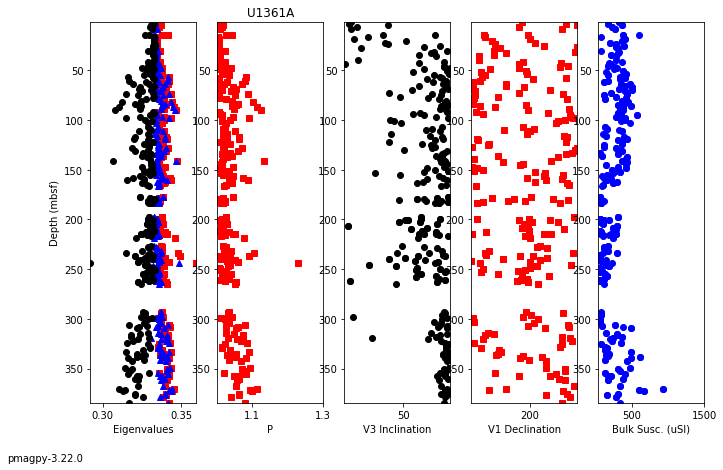

In [196]:
ipmag.ani_depthplot(dir_path='../../data_files/ani_depthplot');

## aniso_magic

In notebooks, we can use:  **ipmag.aniso_magic_nb()**.  There are two example files, one from some sediments, which we can compare the V3 direction with vertical, and a dike which we can compare directions with the plane of the dike.  

In [197]:
help(ipmag.aniso_magic_nb)

Help on function aniso_magic_nb in module pmagpy.ipmag:

aniso_magic_nb(infile='specimens.txt', samp_file='', site_file='', verbose=1, ipar=0, ihext=1, ivec=0, isite=0, iloc=0, iboot=0, vec=0, Dir=[], PDir=[], crd='s', num_bootstraps=1000, dir_path='.')
    Makes plots of anisotropy eigenvectors, eigenvalues and confidence bounds
    Inputs:
        verbose : if True, print messages to output
        Data Model 3.0 only formated files:
            infile : specimens formatted file with aniso_s data
            samp_file : samples formatted file with sample => site relationship
            site_file : sites formatted file with site => location relationship
        isite : if True plot by site, requires non-blank samp_file
        iloc : if True plot by location, requires non-blank samp_file, and site_file
        Dir : [Dec,Inc] list for comparison direction
        vec : eigenvector for comparison with Dir
        PDir : [Pole_dec, Pole_Inc] for pole to plane for comparison
        crd

-W- Couldn't read in samples data
-I- Make sure you've provided the correct file name
-W- Couldn't read in samples data
-I- Make sure you've provided the correct file name
desired coordinate system not available, using available:  g


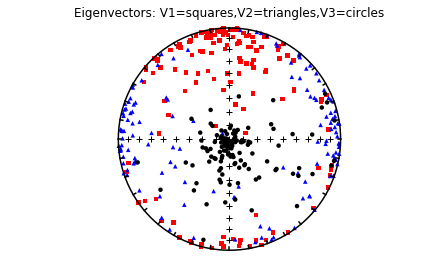

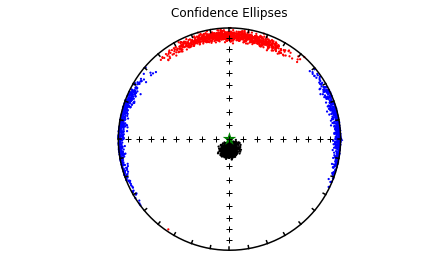

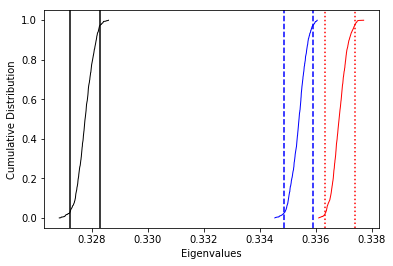

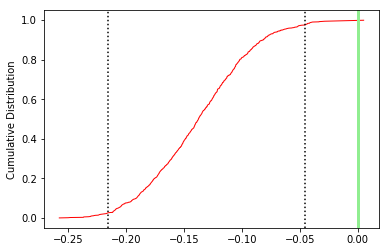

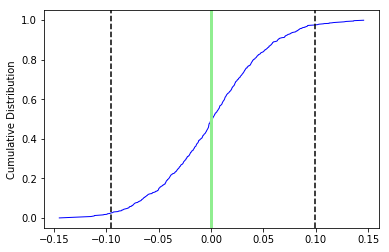

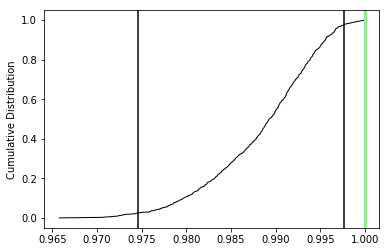

In [200]:
ipmag.aniso_magic_nb(infile='sed_specimens.txt',dir_path='../aniso_magic',\
       iboot=1,ihext=0,ivec=1,Dir=[0,90],vec=3,ipar=1) # parametric bootstrap and compare V3 with vertical

-W- Couldn't read in samples data
-I- Make sure you've provided the correct file name
-W- Couldn't read in samples data
-I- Make sure you've provided the correct file name
desired coordinate system not available, using available:  g


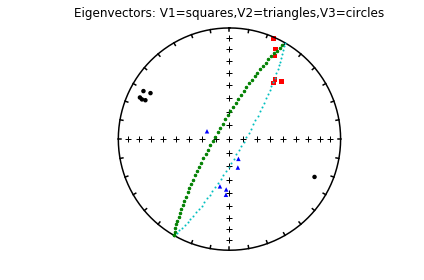

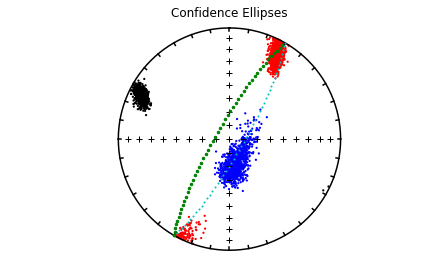

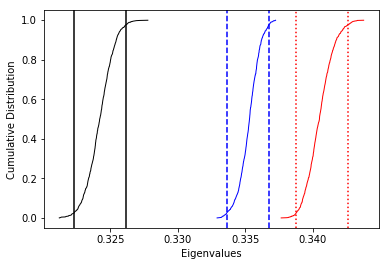

In [201]:
ipmag.aniso_magic_nb(infile='dike_specimens.txt',dir_path='../aniso_magic',\
       iboot=1,ihext=0,ivec=1,PDir=[120,10],ipar=1) # compare dike directions with plane of dike with pole of 120,10

NOTE TO SELF:  Add in 'by site' or 'by sample' as in dmag_magic.  

## apwp

This program calls the function **pmag.bc02** which returns the pole for the plate for that age.  

apwp.py then does the favor of calling **pmag.vgp_di** to calculate the direction at the desired location (**site_lat** and **site_lon**) and pmag.magnetic_lat() to get the paleolatitude.  

This can all be done directly from within the notebook.


In [202]:
help(pmag.bc02)

Help on function bc02 in module pmagpy.pmag:

bc02(data)
    get APWP from Besse and Courtillot 2002 paper
    
    Parameters
    ----------
    Takes input as [plate, site_lat, site_lon, age]
    plate : string (options: AF, ANT, AU, EU, GL, IN, NA, SA)
    site_lat : float
    site_lon : float
    age : float in Myr
    
    Returns
    ----------



In [203]:
data=['NA',33,-117,100]
pole_lat,pole_lon=pmag.bc02(data)
dec,inc=pmag.vgp_di(pole_lat,pole_lon,data[1],data[2])
paleo_lat=pmag.magnetic_lat(inc)
print (' Age   Paleolat.   Dec.   Inc.   Pole_lat.  Pole_Long.')
print ('%7.1f %7.1f %7.1f %7.1f %7.1f  %7.1f\n' \
       %(data[3],paleo_lat,dec,inc,pole_lat,pole_lon))


 Age   Paleolat.   Dec.   Inc.   Pole_lat.  Pole_Long.
  100.0    38.8   352.4    58.1    81.5    198.3



## b_vdm.py

b_vdm.py calls **pmag.b_vdm()** which we can do directly from within the notebook

In [204]:
help(pmag.b_vdm)

Help on function b_vdm in module pmagpy.pmag:

b_vdm(B, lat)
    Converts a magnetic field value (input in units of tesla) to a virtual
    dipole moment (VDM) or a virtual axial dipole moment (VADM; output
    in units of Am^2)
    
    Parameters
    ----------
    B: local magnetic field strength in tesla
    lat: latitude of site in degrees
    
    Returns
    ----------
    V(A)DM in units of Am^2



## biplot_magic 

We can reproduce the plots that biplot_magic make using Pandas.  The key to what measurements mean is in the method codes, so we can first get a unique list of method_codes, then plot one against the other.  Let's read in the data file in to a Pandas dataframe and exctract the method codes: 

In [205]:
b,lat=33e-6,22 # field (in tesla), and latitude
pmag.b_vdm(b,lat) # output in Am^2

7.1588159745117882e+22

In [206]:


meas=pd.read_csv('../biplot_magic/measurements.txt',sep='\t',header=1)
print(meas.method_codes.unique())
meas.head()

['LT-AF-Z' 'LT-AF-I' 'LT-IRM' 'LP-X']


,citations,dir_dec,dir_inc,experiment,magn_mass,meas_temp,measurement,method_codes,quality,specimen,standard,susc_chi_mass,treat_ac_field,treat_dc_field,treat_step_num,treat_temp
0,This study,268.5,-41.2,15-1-013:LP-AF-DIR,0.000003,300,15-1-013:LP-AF-DIR-1,LT-AF-Z,g,15-1-013,u,NaN,0.015,0.00000,1.0,300
1,This study,NaN,NaN,15-1-013:LP-ARM,0.000179,300,15-1-013:LP-ARM-2,LT-AF-I,g,15-1-013,u,NaN,0.080,0.00005,2.0,300
2,This study,NaN,NaN,15-1-013:LP-IRM,0.003600,300,15-1-013:LP-IRM-3,LT-IRM,g,15-1-013,u,NaN,0.000,1.00000,3.0,300
3,This study,NaN,NaN,15-1-013:LP-X,NaN,300,15-1-013:LP-X-4,LP-X,NaN,15-1-013,NaN,2.380000e-07,0.010,0.00000,4.0,300
4,This study,181.0,68.6,15-1-022:LP-AF-DIR,0.000011,300,15-1-022:LP-AF-DIR-5,LT-AF-Z,g,15-1-022,u,NaN,0.015,0.00000,5.0,300


These are an AF demag step, an ARM, an IRM and a susceptibility.  Now we can fish out data for each method, merge them by specimen, dropping any missing measurements and plot one against the other.  

In [207]:
IRM=meas[meas.method_codes.str.contains('LT-IRM')]
IRM=IRM[['specimen','magn_mass']]
IRM.columns=['specimen','IRM']
ARM=meas[meas.method_codes.str.contains('LT-AF-I')]
ARM=ARM[['specimen','magn_mass']]
ARM.columns=['specimen','ARM']
CHI=meas[meas.method_codes.str.contains('LP-X')]
CHI=CHI[['specimen','susc_chi_mass']]  
CHI.columns=['specimen','CHI']
RMRMs=pd.merge(IRM,ARM,on='specimen')
RMRMs=pd.merge(RMRMs,CHI,on='specimen')

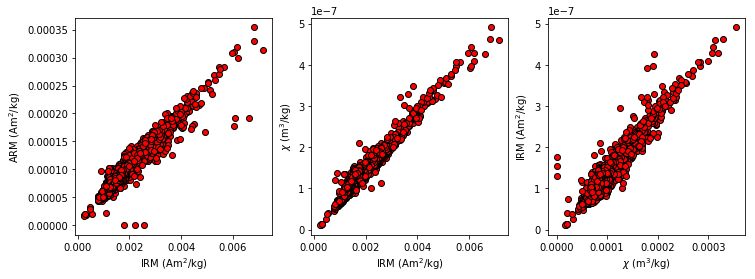

In [208]:
fig=plt.figure(1, (12,4))
fig.add_subplot(131)
plt.plot(RMRMs.IRM,RMRMs.ARM,'ro',markeredgecolor='black')
plt.xlabel('IRM (Am$^2$/kg)')
plt.ylabel('ARM (Am$^2$/kg)')
fig.add_subplot(132)
plt.plot(RMRMs.IRM,RMRMs.CHI,'ro',markeredgecolor='black')
plt.xlabel('IRM (Am$^2$/kg)')
plt.ylabel('$\chi$ (m$^3$/kg)')
fig.add_subplot(133)
plt.plot(RMRMs.ARM,RMRMs.CHI,'ro',markeredgecolor='black')
plt.xlabel('$\chi$ (m$^3$/kg)')
plt.ylabel('IRM (Am$^2$/kg)');

## bootams
This program reads in a file with data for the six tensor elements (x11 x22 x33 x12 x23 x13) for specimens, calls **pmag.s_boot()**  using a parametric or non-parametric bootstrap as desired. If all that is desired is the bootstrapped eigenparameters, **pmag.s_boot()** has all we need, but if the Kent ellipses are required, and we can call **pmag.sbootpars()** to calculated these more derived products and  print them out as **bootams.py** does.  

We can do all this from within the notebook as follows: 

In [209]:
help(pmag.s_boot)

Help on function s_boot in module pmagpy.pmag:

s_boot(Ss, ipar=0, nb=1000)
    Returns bootstrap parameters for S data
    
    Parameters
    __________
    Ss : nested array of [x11 x22 x33 x12 x23 x13,....] data
    ipar : if True, do a parametric bootstrap 
    nb : number of bootstraps
    
    Returns
    ________
    Tmean : aveage eigenvalues
    Vmean : average eigvectors
    Taus : bootstrapped eigenvalues
    Vs :  bootstrapped eigenvectors



In [210]:
Ss=np.loadtxt('../bootams/bootams_example.dat')
Tmean,Vmean,Taus,Vs=pmag.s_boot(Ss) # get the bootstrapped eigenparameters
bpars=pmag.sbootpars(Taus,Vs) # calculate kent parameters for bootstrap
print("""tau tau_sigma V_dec V_inc V_eta V_eta_dec V_eta_inc V_zeta V_zeta_dec V_zeta_inc
""")
outstring='%7.5f %7.5f %7.1f %7.1f %7.1f %7.1f %7.1f %7.1f %7.1f %7.1f'%(\
          Tmean[0],bpars["t1_sigma"],Vmean[0][0],Vmean[0][1],\
          bpars["v1_zeta"],bpars["v1_zeta_dec"],bpars["v1_zeta_inc"],\
          bpars["v1_eta"],bpars["v1_eta_dec"],bpars["v1_eta_inc"])
print(outstring)
outstring='%7.5f %7.5f %7.1f %7.1f %7.1f %7.1f %7.1f %7.1f %7.1f %7.1f'%(\
          Tmean[1],bpars["t2_sigma"],Vmean[1][0],Vmean[1][1],\
          bpars["v2_zeta"],bpars["v2_zeta_dec"],bpars["v2_zeta_inc"],\
          bpars["v2_eta"],bpars["v2_eta_dec"],bpars["v2_eta_inc"])
print(outstring)
outstring='%7.5f %7.5f %7.1f %7.1f %7.1f %7.1f %7.1f %7.1f %7.1f %7.1f'%(\
          Tmean[2],bpars["t3_sigma"],Vmean[2][0],Vmean[2][1],\
          bpars["v3_zeta"],bpars["v3_zeta_dec"],bpars["v3_zeta_inc"],\
          bpars["v3_eta"],bpars["v3_eta_dec"],bpars["v3_eta_inc"])
print(outstring)

tau tau_sigma V_dec V_inc V_eta V_eta_dec V_eta_inc V_zeta V_zeta_dec V_zeta_inc

0.33505 0.00021     5.3    14.7    10.5   259.8    40.2    14.0   110.6    45.4
0.33334 0.00021   124.5    61.7     6.1   225.5     6.1    17.5   318.9    28.5
0.33161 0.00014   268.8    23.6    10.9   176.0     0.3    12.6    85.4    66.2


In [211]:
# with parametric bootstrap: 
Ss=np.loadtxt('../bootams/bootams_example.dat')
Tmean,Vmean,Taus,Vs=pmag.s_boot(Ss,ipar=1,nb=5000) # get the bootstrapped eigenparameters
bpars=pmag.sbootpars(Taus,Vs) # calculate kent parameters for bootstrap
print("""tau tau_sigma V_dec V_inc V_eta V_eta_dec V_eta_inc V_zeta V_zeta_dec V_zeta_inc
""")
outstring='%7.5f %7.5f %7.1f %7.1f %7.1f %7.1f %7.1f %7.1f %7.1f %7.1f'%(\
          Tmean[0],bpars["t1_sigma"],Vmean[0][0],Vmean[0][1],\
          bpars["v1_zeta"],bpars["v1_zeta_dec"],bpars["v1_zeta_inc"],\
          bpars["v1_eta"],bpars["v1_eta_dec"],bpars["v1_eta_inc"])
print(outstring)
outstring='%7.5f %7.5f %7.1f %7.1f %7.1f %7.1f %7.1f %7.1f %7.1f %7.1f'%(\
          Tmean[1],bpars["t2_sigma"],Vmean[1][0],Vmean[1][1],\
          bpars["v2_zeta"],bpars["v2_zeta_dec"],bpars["v2_zeta_inc"],\
          bpars["v2_eta"],bpars["v2_eta_dec"],bpars["v2_eta_inc"])
print(outstring)
outstring='%7.5f %7.5f %7.1f %7.1f %7.1f %7.1f %7.1f %7.1f %7.1f %7.1f'%(\
          Tmean[2],bpars["t3_sigma"],Vmean[2][0],Vmean[2][1],\
          bpars["v3_zeta"],bpars["v3_zeta_dec"],bpars["v3_zeta_inc"],\
          bpars["v3_eta"],bpars["v3_eta_dec"],bpars["v3_eta_inc"])
print(outstring)

tau tau_sigma V_dec V_inc V_eta V_eta_dec V_eta_inc V_zeta V_zeta_dec V_zeta_inc

0.33505 0.00021     5.3    14.7    11.4   266.9    28.2    26.0   122.3    56.6
0.33334 0.00023   124.5    61.7    19.4   236.1    10.7    23.6   331.0    24.4
0.33161 0.00026   268.8    23.6    10.6     7.6    19.9    21.0   134.2    58.7


## cart_dir
cart_dir.py calls pmag.cart2dir()  which we can call directly from the notebook

In [212]:
help(pmag.cart2dir)

Help on function cart2dir in module pmagpy.pmag:

cart2dir(cart)
    Converts a direction in cartesian coordinates into declination, inclinations
    
    Parameters
    ----------
    cart : input list of [x,y,z]
    
    Returns
    -------
    direction_array : returns an array of [declination, inclination, intensity]
    
    Examples
    --------
    >>> pmag.cart2dir([0,1,0])
    array([ 90.,   0.,   1.])



In [213]:
# read in data file from example file
cart=np.loadtxt('../cart_dir/cart_dir_example.dat')
print ('Input: \n',cart)
print ('Output: \n',pmag.cart2dir(cart))

Input: 
 [[ 0.3971 -0.1445  0.9063]
 [-0.5722  0.04   -0.8192]]
Output: 
 [[ 340.00415104   65.00211761    0.99997417]
 [ 176.00120788  -55.00063858    1.00005074]]


## chi_magic
chi_magic.py reads in a MagIC data model 2.5 file, and makes various plots.  ../chi_magic/measurements.txt has bee upgraded to  We can reproduce these with Pandas...  

In [214]:
# read in data from data model 3 example file
chi_data=pd.read_csv('../chi_magic/measurements.txt',sep='\t',header=1)
print (chi_data.columns)
# get arrays of available temps, frequencies and fields
Ts=np.sort(chi_data.meas_temp.unique())
Fs=np.sort(chi_data.meas_freq.unique())
Bs=np.sort(chi_data.meas_field_ac.unique())


Index(['citations', 'experiment', 'instrument_codes', 'meas_field_ac',
       'meas_freq', 'meas_temp', 'method_codes', 'specimen',
       'susc_chi_qdr_volume', 'susc_chi_volume', 'timestamp'],
      dtype='object')


Text(0.5,1,'B = 3.00e-04 T')

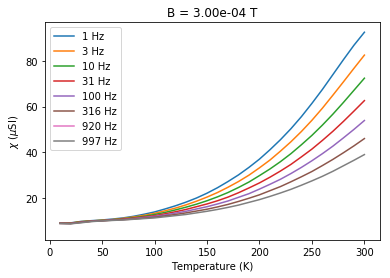

In [215]:
# plot chi versus temperature at constant field
b=Bs.max()
for f in Fs:
    this_f=chi_data[chi_data.meas_freq==f]
    this_f=this_f[this_f.meas_field_ac==b]
    plt.plot(this_f.meas_temp,1e6*this_f.susc_chi_volume,label='%i'%(f)+' Hz')
plt.legend()
plt.xlabel('Temperature (K)')
plt.ylabel('$\chi$ ($\mu$SI)')
plt.title('B = '+'%7.2e'%(b)+ ' T')

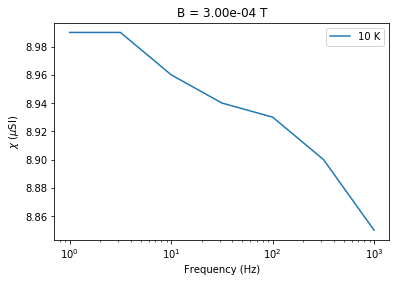

In [216]:
# plot chi versus frequency at constant B
b=Bs.max()
t=Ts.min()
this_t=chi_data[chi_data.meas_temp==t]
this_t=this_t[this_t.meas_field_ac==b]
plt.semilogx(this_t.meas_freq,1e6*this_t.susc_chi_volume,label='%i'%(t)+' K')
plt.legend()
plt.xlabel('Frequency (Hz)')
plt.ylabel('$\chi$ ($\mu$SI)')
plt.title('B = '+'%7.2e'%(b)+ ' T');

## combine_magic
This program reads in MagIC formatted files of a common type (e.g., sites.txt) and combines them into a single file, taking care that all the columns are preserved. For example, if there are both AF and thermal data from a study and we created a measurements.txt formatted file for each, but wanted to combine them together into a single measurements.txt file.    This kind of activity is taylor made for Pandas.  We can read in the two files, combine them with **pd.concat()** and write them back out to a magic format file. To do that, we use **pmag.magic_write()**.  



In [217]:
help(pmag.magic_write)

Help on function magic_write in module pmagpy.pmag:

magic_write(ofile, Recs, file_type)
    Parameters
    _________
    ofile : path to output file
    Recs : list of dictionaries in MagIC format
    file_type : MagIC table type (e.g., specimens)
    
    Return :
    [True,False] : True if successful
    ofile : same as input 
    
    Effects :
        writes a MagIC formatted file from Recs



**pmag.magic_write()** takes a list of dictionaries, which we can get from the pandas data frame with the 
**df.to_dict('records')** function.  

In [218]:
# read in the first file:
af_data=pd.read_csv('../combine_magic/af_measurements.txt',sep='\t',header=1)
# read in the second file
therm_data=pd.read_csv('../combine_magic/therm_measurements.txt',sep='\t',header=1)
# combine the two with pandas.concat function
all_data=pd.concat([af_data,therm_data])

pmag.magic_write('../combine_magic/measurements.txt',all_data.to_dict('records'),'measurements')


58  records written to file  ../combine_magic/measurements.txt


(True, '../combine_magic/measurements.txt')

## common_mean
ipmag.common_mean_bootrap does the same job as the command line program common_mean.py 

In [219]:
help(ipmag.common_mean_bootstrap)

Help on function common_mean_bootstrap in module pmagpy.ipmag:

common_mean_bootstrap(Data1, Data2, NumSims=1000, save=False, save_folder='.', fmt='svg', figsize=(7, 2.3), x_tick_bins=4)
    Conduct a bootstrap test (Tauxe, 2010) for a common mean on two declination,
    inclination data sets. Plots are generated of the cumulative distributions
    of the Cartesian coordinates of the means of the pseudo-samples (one for x,
    one for y and one for z). If the 95 percent confidence bounds for each
    component overlap, the two directions are not significantly different.
    
    Parameters
    ----------
    Data1 : a nested list of directional data [dec,inc] (a di_block)
    Data2 : a nested list of directional data [dec,inc] (a di_block)
    NumSims : number of bootstrap samples (default is 1000)
    save : optional save of plots (default is False)
    save_folder : path to directory where plots should be saved
    fmt : format of figures to be saved (default is 'svg')
    figsize : 

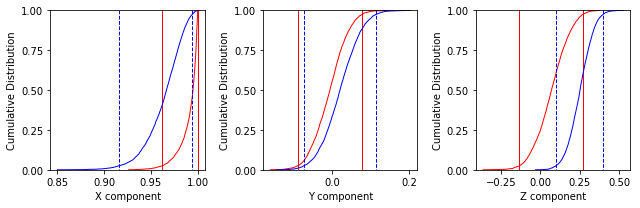

In [220]:
directions_A=np.loadtxt('../common_mean/common_mean_ex_file1.dat')
directions_B=np.loadtxt('../common_mean/common_mean_ex_file2.dat') 
ipmag.common_mean_bootstrap(directions_A,directions_B,figsize=(9,3))

## cont_rot 
This program reads in the outlines of continents from **continents.get_cont()**, rotates around a rotation pole and angle as specified by the age  and continent in question (from **frp.get_pole()** using **pmag.ptROT()**.  It then plots them using basemap in **pmagplotlib.plotMAP()** (or **pmagplotlib.plot_map** for cartopy version.  Here will will reproduce it more directly through the notebook.  

In [221]:
# load in the continents module
import pmagpy.continents as continents
import pmagpy.frp as frp
help(continents.get_continent)

Help on function get_continent in module pmagpy.continents:

get_continent(continent)
    get_continent(continent)
    returns the outlines of specified continent.
    
    Parameters:
    ____________________
    continent:
        af : Africa
        congo : Congo
        kala : Kalahari
        aus : Australia
        balt : Baltica
        eur : Eurasia
        ind : India
        sam : South America
        ant : Antarctica
        grn : Greenland
        lau : Laurentia
        nam : North America
        gond : Gondawanaland
    Returns : 
        array of [lat/long] points defining continent



In [222]:
help(pmagplotlib.plotMAP)

Help on function plotMAP in module pmagpy.pmagplotlib:

plotMAP(fignum, lats, lons, Opts)
    plotMAP(fignum, lats,lons,Opts)
    makes a basemap with lats/lons
        Windows 10 users, see plot_map
    Parameters:
    _______________
    fignum : matplotlib figure number
    lats : array or list of latitudes
    lons : array or list of longitudes
    Opts : dictionary of plotting options:
        Opts.keys=
            latmin : minimum latitude for plot
            latmax : maximum latitude for plot
            lonmin : minimum longitude for plot
            lonmax : maximum longitude
            lat_0 : central latitude
            lon_0 : central longitude
            proj : projection [basemap projections, e.g., moll=Mollweide, merc=Mercator, ortho=orthorhombic,
                lcc=Lambert Conformal]
            sym : matplotlib symbol
            symsize : symbol size in pts
            edge : markeredgecolor
            pltgrid : plot the grid [1,0]
            res :  resolution

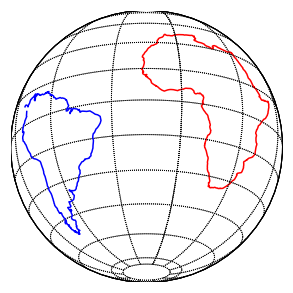

In [223]:
# retrieve continental outline
af=continents.get_continent('af').transpose()
sam=continents.get_continent('sam').transpose()


#define options for pmagplotlib.plotMAP
plt.figure(1,(5,5))
Opts = {'latmin': -90, 'latmax': 90, 'lonmin': 0., 'lonmax': 360., 'lat_0': -20, \
            'lon_0': 345,'proj': 'ortho', 'sym': 'r-', 'symsize': 3,\
            'pltgrid': 0, 'res': 'c', 'boundinglat': 0.}
pmagplotlib.plotMAP(1,af[0],af[1],Opts)
Opts['sym']='b-'
pmagplotlib.plotMAP(1,sam[0],sam[1],Opts)

Now for the rotation part.  These are in a function called frp.get_pole()

In [224]:
help(frp.get_pole)

Help on function get_pole in module pmagpy.frp:

get_pole(continent, age)
    returns rotation poles and angles for specified continents and ages
    assumes fixed Africa.  
    Parameters
    __________
        continent : 
            aus : Australia
            eur : Eurasia
            mad : Madacascar
            [nwaf,congo] : NW Africa  [choose one]
            col :  Colombia
            grn : Greenland
            nam : North America
            par : Paraguay
            eant :  East Antarctica
            ind : India
            [neaf,kala] : NE Africa [choose one]
            [sac,sam] :  South America [choose one]
            ib : Iberia
            saf : South Africa
      Returns
      _______
          [pole longitude, pole latitude, rotation angle] : for the continent at specified age



In [225]:
# get the rotation pole for south america relative to South Africa at 180 Ma
sam_pole=frp.get_pole('sam',180)
# NB: for african rotations, first rotate other continents to fixed Africa, then 
# rotate with South African pole (saf)


The rotation is done by pmag.PTrot.

In [226]:
help(pmag.PTrot)

Help on function PTrot in module pmagpy.pmag:

PTrot(EP, Lats, Lons)
    Rotates points on a globe by an Euler pole rotation using method of
    Cox and Hart 1986, box 7-3.
    
    Parameters
    ----------
    EP : Euler pole list [lat,lon,angle]
    Lats : list of latitudes of points to be rotated
    Lons : list of longitudes of points to be rotated
    
    Returns
    _________
    RLats : rotated latitudes
    RLons : rotated longitudes



so here we go...  

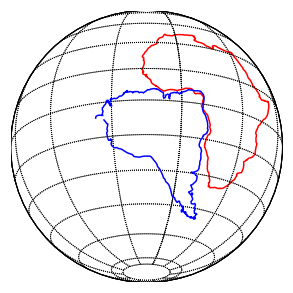

In [227]:
plt.figure(1,(5,5))
sam_rot=pmag.PTrot(sam_pole,sam[0],sam[1]) # same for south america
# and plot 'em
Opts['sym']='r-'
pmagplotlib.plotMAP(1,af[0],af[1],Opts)
Opts['sym']='b-'
pmagplotlib.plotMAP(1,sam_rot[0],sam_rot[1],Opts)

## core_depthplot

This can be done using the wonders of Pandas data frames using the data_model 3 data in the example data file folder.  


Let's do things this way:
- read in the data from the sites and specimens files.
- Drop the records with NaN for analysts, keeping one of the three lines available for each specimen. 
- Make a new column named **site** in the specdimens table that is the same as the **specimen** column.
- (this makes sense because these are core data, so the specimen=sample=site. )
- Merge the two DataFrames on the **site** column.
- filter the data for depths between 50 and 150.
- Plot **dir_inc** versus **core_depth**.  
- Put on GAD field inclination
- plot the time scale

In [228]:
sites=pd.read_csv('../core_depthplot/sites.txt',sep='\t',header=1)
specimens=pd.read_csv('../core_depthplot/specimens.txt',sep='\t',header=1)
specimens=specimens.dropna(subset=['dir_dec']) # kill unwanted lines with duplicate or irrelevent info
specimens['site']=specimens['specimen'] # make a column with site name
data=pd.merge(specimens,sites,on='site') # merge the two data frames on site
data=data[data.core_depth>50] # all levels > 50
data=data[data.core_depth<150] # and < 150
lat=sites.lat.unique()[0] # we need this for the GAD INC


Plot versus core_depth

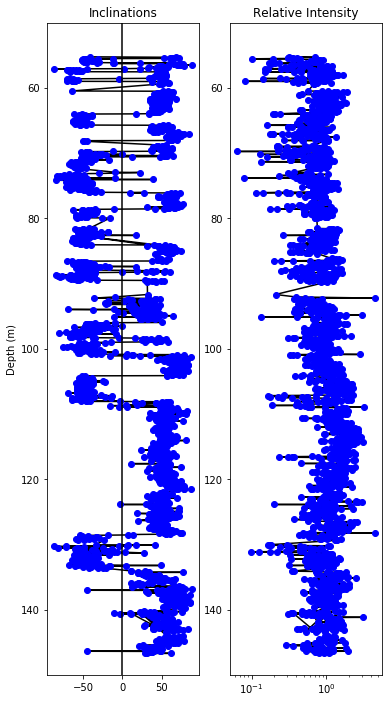

In [229]:
fig=plt.figure(1,(6,12))
ax=fig.add_subplot(121)
plt.ylabel('Depth (m)')
plt.plot(data.dir_inc,data.core_depth,'k-')
plt.plot(data.dir_inc,data.core_depth,'bo')
plt.title('Inclinations')
plt.axvline(0,color='black')
plt.ylim(150,50)
fig.add_subplot(122)
plt.semilogx(data.int_rel/data.int_rel.mean(),data.core_depth,'k-')
plt.semilogx(data.int_rel/data.int_rel.mean(),data.core_depth,'bo')
plt.ylim(150,50)
plt.title('Relative Intensity');


And now versus age:

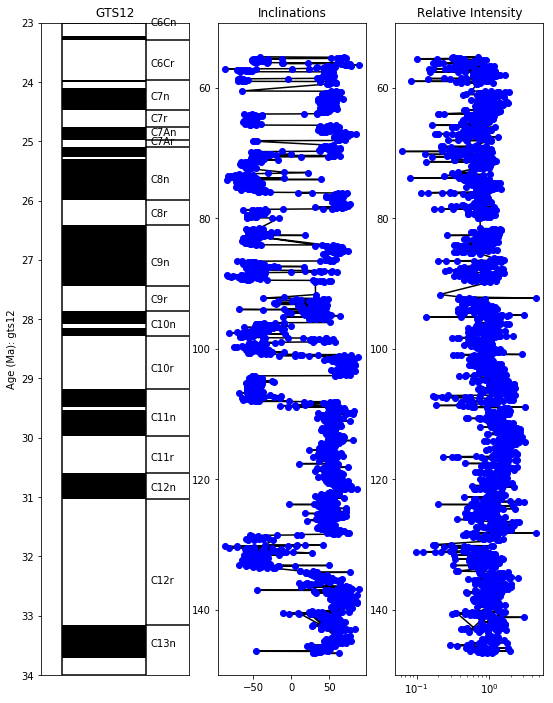

In [230]:
fig=plt.figure(1,(9,12))
ax=fig.add_subplot(131)
pmagplotlib.plot_ts(ax,23,34,timescale='gts12')
fig.add_subplot(132)
plt.plot(data.dir_inc,data.core_depth,'k-')
plt.plot(data.dir_inc,data.core_depth,'bo')
plt.ylim(35,23)
#plt.ylabel('Age (Ma)')
gad=np.degrees(np.arctan(2.*np.tan(np.radians(lat)))) # tan (I) = 2 tan (lat)
plt.axvline(gad,color='green',linestyle='dashed',linewidth=2)
plt.axvline(-gad,color='green',linestyle='dashed',linewidth=2)
plt.title('Inclinations')
plt.ylim(150,50)
fig.add_subplot(133)
plt.semilogx(data.int_rel/data.int_rel.mean(),data.core_depth,'k-')
plt.semilogx(data.int_rel/data.int_rel.mean(),data.core_depth,'bo')
plt.ylim(150,50)
plt.title('Relative Intensity');


## curie 

This can be done through **ipmag.curie()**.

In [231]:
help(ipmag.curie)

Help on function curie in module pmagpy.ipmag:

curie(path_to_file='.', file_name='magic_measurements.txt', window_length=3, save=False, save_folder='.', fmt='svg', t_begin='', t_end='')
    Plots and interprets curie temperature data.
    ***
    The 1st derivative is calculated from smoothed M-T curve (convolution
    with trianfular window with width= <-w> degrees)
    ***
    The 2nd derivative is calculated from smoothed 1st derivative curve
    (using the same sliding window width)
    ***
    The estimated curie temp. is the maximum of the 2nd derivative.
    Temperature steps should be in multiples of 1.0 degrees.
    
    Optional Parameters (defaults are used if not specified)
    ----------
    path_to_file : path to directory that contains file (default is current directory, '.')
    file_name : name of file to be opened (default is 'magic_measurements.txt')
    window_length : dimension of smoothing window (input to smooth() function)
    save : boolean argument to save pl

second derivative maximum is at T=552


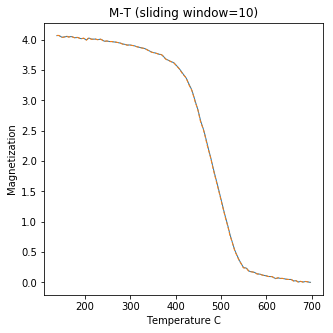

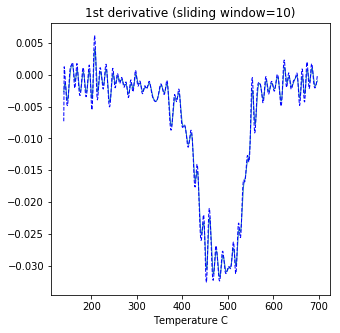

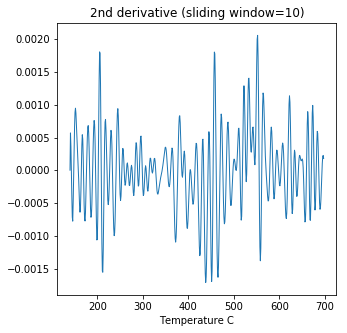

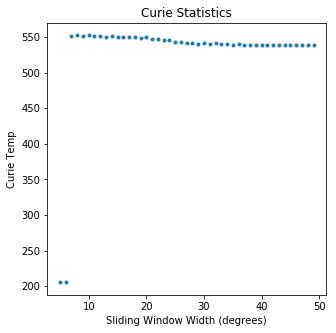

In [232]:
ipmag.curie(path_to_file='../curie',file_name='curie_example.dat',\
           window_length=10)

## dayplot_magic

This program can be replicated with **ipmag.dayplot**.

In [233]:
help(ipmag.dayplot)

Help on function dayplot in module pmagpy.ipmag:

dayplot(path_to_file='.', hyst_file='specimens.txt', rem_file='', save=False, save_folder='.', fmt='pdf', data_model=3)
    Makes 'day plots' (Day et al. 1977) and squareness/coercivity plots
    (Neel, 1955; plots after Tauxe et al., 2002); plots 'linear mixing'
    curve from Dunlop and Carter-Stiglitz (2006).
    
    Optional Parameters (defaults are used if not specified)
    ----------
    path_to_file : path to directory that contains files (default is current directory, '.')
    the default input file is 'specimens.txt' (data_model=3
    if data_model = 2, then must these are the defaults:
        hyst_file : hysteresis file (default is 'rmag_hysteresis.txt')
        rem_file : remanence file (default is 'rmag_remanence.txt')
    save : boolean argument to save plots (default is False)
    save_folder : relative directory where plots will be saved (default is current directory, '.')
    fmt : format of saved figures (default is 

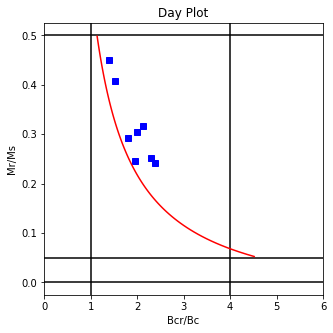

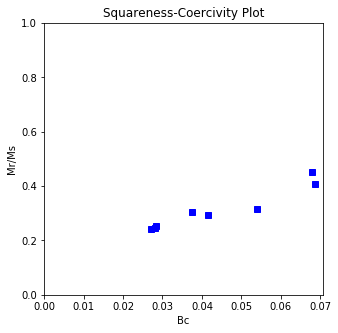

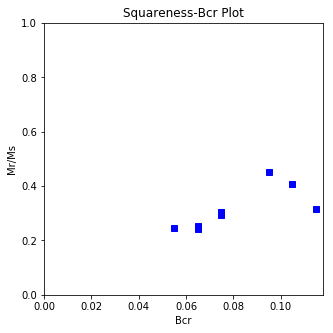

In [234]:
ipmag.dayplot(path_to_file='../dayplot_magic',hyst_file='dayplot_magic_example.dat',\
             data_model=2)

## di_eq

This program calls **pmag.dimap()** which we can do from within a Jupyter notebook.

In [235]:
help(pmag.dimap)

Help on function dimap in module pmagpy.pmag:

dimap(D, I)
    Function to map directions  to x,y pairs in equal area projection
    
    Parameters
    ----------
    D : declination (as float)
    I : inclination (as float)
    
    Returns
    -------
    XY : x, y values of directions for equal area projection [x,y]



In [236]:
DIs=np.loadtxt('../di_eq/di_eq_example.dat').transpose()
print (pmag.dimap(DIs[0],DIs[1]))

[[-0.23941025 -0.8934912 ]
 [ 0.43641303  0.71216134]
 [ 0.06384422  0.76030049]
 [ 0.32144709  0.68621606]
 [ 0.32271993  0.67056248]
 [ 0.40741223  0.54065429]
 [ 0.5801562   0.34037562]
 [ 0.10535089  0.65772758]
 [ 0.24717308  0.59968683]
 [ 0.18234908  0.61560016]
 [ 0.17481507  0.60171742]
 [ 0.282746    0.54547233]
 [ 0.26486315  0.53827299]
 [ 0.23575838  0.5345358 ]
 [ 0.29066509  0.50548208]
 [ 0.26062905  0.51151332]
 [ 0.23208983  0.51642328]
 [ 0.24444839  0.50566578]
 [ 0.27792652  0.46438138]
 [ 0.2505103   0.47715181]
 [ 0.29177004  0.44081644]
 [ 0.10876949  0.51614821]
 [ 0.19670646  0.48201446]
 [ 0.34938995  0.38129223]
 [ 0.1684068   0.47556614]
 [ 0.20628586  0.44644351]
 [ 0.17570082  0.45064929]
 [ 0.30110381  0.37853937]
 [ 0.20495497  0.42396971]
 [ 0.19975473  0.4225844 ]
 [ 0.34691999  0.30800998]
 [ 0.11902989  0.44114437]
 [ 0.23984794  0.37648585]
 [ 0.26952843  0.34250954]
 [ 0.08545091  0.42378931]
 [ 0.19222399  0.38723272]
 [ 0.17260777  0.39508358]
 

## di_geo
This program calls **pmag.dogeo()**. There is also **pmag.dogeo_V** for arrays of data. 
So start with **pmag.dogeo()**.

In [237]:
help(pmag.dogeo)

Help on function dogeo in module pmagpy.pmag:

dogeo(dec, inc, az, pl)
    Rotates declination and inclination into geographic coordinates using the
    azimuth and plunge of the X direction (lab arrow) of a specimen.
    
    Parameters
    ----------
    dec : declination in specimen coordinates
    inc : inclination in specimen coordinates
    
    Returns
    -------
    rotated_direction : tuple of declination, inclination in geographic coordinates
    
    Examples
    --------
    >>> pmag.dogeo(0.0,90.0,0.0,45.5)
    (180.0, 44.5)



In [238]:
pmag.dogeo(dec=81,inc=45.2,az=347,pl=27)

(94.835485413375622, 43.021684901096322)

In [239]:
help(pmag.dogeo_V)

Help on function dogeo_V in module pmagpy.pmag:

dogeo_V(indat)
    Rotates declination and inclination into geographic coordinates using the
    azimuth and plunge of the X direction (lab arrow) of a specimen.
    
    Parameters
    ----------
    indat: nested list of [dec, inc, az, pl] data
    
    Returns
    -------
    rotated_directions : arrays of Declinations and Inclinations



In [240]:
indata=np.loadtxt('../di_geo/di_geo_example.dat')
print (indata)

[[ 288.1   35.8   67.   -36. ]
 [ 256.8   22.5   84.   -81. ]
 [ 262.4   19.1   91.   -48. ]
 [ 258.6   19.6   89.   -61. ]
 [ 259.9   54.7   49.   -76. ]
 [ 279.1   27.9   62.   -41. ]
 [ 228.3  -47.5  141.   -84. ]
 [ 249.8   25.    60.   -82. ]
 [ 239.8  -33.9  108.   -91. ]
 [ 271.7   50.8   28.   -52. ]
 [ 266.8   67.1   16.   -67. ]
 [ 238.9   51.9   27.   -76. ]
 [ 238.9   55.3   17.   -90. ]
 [ 252.6   41.    43.   -73. ]
 [ 112.7   17.1  282.6  -78. ]
 [ 134.9   -8.9  234.   -56. ]
 [ 138.6   -1.1  244.6  -73. ]
 [  83.5   31.1  292.   -28. ]
 [ 151.1  -35.2  196.6  -69. ]
 [ 146.8  -14.5  217.   -51. ]
 [  13.8   35.   332.6  -44. ]
 [ 293.1    3.9   53.5  -25.5]
 [  99.5  -11.   243.6  -30. ]
 [ 267.8  -12.7   91.5  -49. ]
 [  47.    12.8  298.6  -28. ]
 [  45.8   -9.   297.   -33.5]
 [  81.7  -26.8  254.6  -51. ]
 [  79.7  -25.7  256.   -60. ]
 [  84.7  -20.9  256.6  -60. ]
 [ 303.3   66.7    3.6  -71.5]
 [ 104.6   32.2  297.  -100.5]
 [ 262.8   77.9  357.1  -87. ]
 [  63.3

In [241]:
decs,incs=pmag.dogeo_V(indata)
print (decs,incs)

[  1.23907966e+01   1.49830732e+01   1.06667819e+01   1.14047553e+01
   1.24483163e+01   3.57299071e+02   3.53883281e+02   3.53789196e+02
   3.40503777e+02   3.42563974e+02   3.51164668e+02   3.49415385e+02
   3.46335983e+02   3.50937970e+02   3.59146910e+02   5.20812064e-01
   3.54368265e+02   9.11626301e-01   3.50170459e+02   3.54249362e-02
   3.43981389e+02   3.46130907e+02   3.47283278e+02   3.50443170e+02
   3.44495997e+02   3.52433892e+02   1.55709734e+00   4.40491709e+00
   2.54671945e+00   3.44221055e+02   3.52498530e+02   3.45060173e+02
   3.48635524e+02   3.49534584e+02   3.51173216e+02   3.57092897e+02
   3.56384865e+02] [ 18.97354242  15.5593373   18.16933424  18.99516324  17.20362035
  15.15615798  21.70912081  21.63657272  25.28892753  27.53745185
  22.32938052  29.97546268  17.1006907   24.05670149  24.95589898
  29.44812112  45.36441334  24.24032931  27.47045636  28.16456055
  -8.04836591  -6.14959601  -4.8321985   -6.65953274  -6.6962926
 -30.69729144 -22.57434594 -20.

## note to self: fix cookbook page.

In [242]:
help(pmag.dodirot_V)

Help on function dodirot_V in module pmagpy.pmag:

dodirot_V(di_block, Dbar, Ibar)
    Rotate an array of dec/inc pairs to coordinate system with Dec,Inc as 0,90
    
    Parameters
    ___________________
    di_block : array of [[Dec1,Inc1],[Dec2,Inc2],....]
    Dbar : declination of desired center
    Ibar : inclination of desired center
    
    Returns
    __________
    array of rotated decs and incs: [[rot_Dec1,rot_Inc1],[rot_Dec2,rot_Inc2],....]



We do it like this: 
- read in a data set with dec inc pairs
- make an equal area projection of the data to see what they look like
- calculate the principal component with **pmag.doprinc())**
- rotate the data to the principal direction
- plot the rotated data in an equal area projection. 

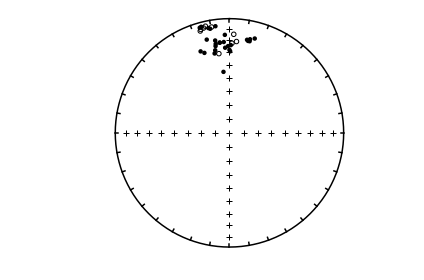

In [243]:
di_block=np.loadtxt('../di_geo/di_geo.out') # read in some data
ipmag.plot_net(1) # make the plot
ipmag.plot_di(di_block=di_block)

In [244]:
help(pmag.doprinc)
princ=pmag.doprinc(di_block)

Help on function doprinc in module pmagpy.pmag:

doprinc(data)
    Gets principal components from data in form of a list of [dec,inc] data.
    
    Parameters
    ----------
    data : nested list of dec, inc directions
    
    Returns
    -------
    ppars : dictionary with the principal components
        dec : principal directiion declination
        inc : principal direction inclination
        V2dec : intermediate eigenvector declination
        V2inc : intermediate eigenvector inclination
        V3dec : minor eigenvector declination
        V3inc : minor eigenvector inclination
        tau1 : major eigenvalue
        tau2 : intermediate eigenvalue
        tau3 : minor eigenvalue
        N  : number of points
        Edir : elongation direction [dec, inc, length]



In [245]:
rot_block=pmag.dodirot_V(di_block,princ['dec'],princ['inc'])
rot_block

array([[ 286.02435815,   72.05782519],
       [ 274.276049  ,   70.22090543],
       [ 284.92806468,   73.82778982],
       [ 286.94202373,   72.96225397],
       [ 280.27771216,   72.4822522 ],
       [ 304.30563895,   86.77972247],
       [ 359.89769098,   81.42521644],
       [   0.58903633,   81.51535203],
       [  40.46282285,   71.92239829],
       [  31.19590744,   71.72663361],
       [  14.40686098,   80.26484683],
       [  10.20158431,   72.45523677],
       [  57.84145159,   80.96290455],
       [  12.49485429,   78.47807897],
       [ 336.16857481,   77.4647786 ],
       [ 337.39083333,   72.90257789],
       [ 355.16071457,   57.76042705],
       [ 327.75482493,   77.51477712],
       [  10.48079578,   75.05056353],
       [ 337.45006938,   74.17995153],
       [ 147.42200844,   66.30691474],
       [ 150.22723796,   68.91756089],
       [ 151.92784861,   70.58221251],
       [ 162.26381172,   69.67831156],
       [ 147.04519212,   67.69047388],
       [ 171.84161835,   

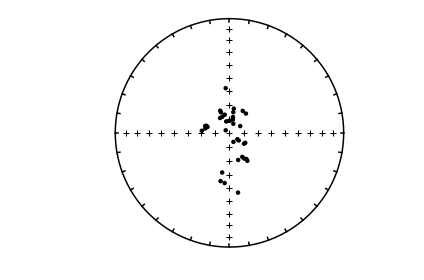

In [246]:
ipmag.plot_net(1) # make the plot
ipmag.plot_di(di_block=rot_block)

## di_tilt
We can perform the same thing as this program by calling  **pmag.dotilt** or **pmag.dotilt_V()** depending on if we have a single point or an array to rotate.

In [247]:
help(pmag.dotilt)

Help on function dotilt in module pmagpy.pmag:

dotilt(dec, inc, bed_az, bed_dip)
    Does a tilt correction on a direction (dec,inc) using bedding dip direction
    and bedding dip.
    
    Parameters
    ----------
    dec : declination directions in degrees
    inc : inclination direction in degrees
    bed_az : bedding dip direction
    bed_dip : bedding dip
    
    Returns
    -------
    dec,inc : a tuple of rotated dec, inc values
    
    Examples
    -------
    >>> pmag.dotilt(91.2,43.1,90.0,20.0)
    (90.952568837153436, 23.103411670066617)



In [248]:
help(pmag.dotilt_V)

Help on function dotilt_V in module pmagpy.pmag:

dotilt_V(indat)
    Does a tilt correction on an array with rows of dec,inc bedding dip direction and dip.
    
    Parameters
    ----------
    input : declination, inclination, bedding dip direction and bedding dip
    nested array of [[dec1, inc1, bed_az1, bed_dip1],[dec2,inc2,bed_az2,bed_dip2]...]
    
    Returns
    -------
    dec,inc : arrays of rotated declination, inclination



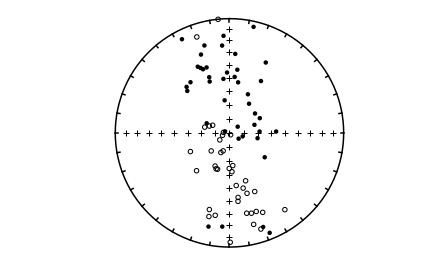

In [249]:
data=np.loadtxt('../di_tilt/di_tilt_example.dat') # load up the data
di_block=data[:,[0,1]] # let's plot the dec,inc data first
ipmag.plot_net(1)
ipmag.plot_di(di_block=di_block)

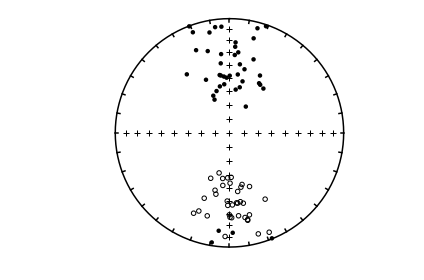

In [250]:
Dt,It=pmag.dotilt_V(data) # rotate them
ipmag.plot_net(1) # and take a look
ipmag.plot_di(dec=Dt,inc=It)

In [251]:
np.column_stack((Dt,It)) # if you want to see the output: 

array([[  3.74524673e+01,   4.95794971e+01],
       [  3.36467520e+02,   6.09447203e+01],
       [  3.38016562e+02,   2.29922937e+01],
       [  3.55656248e+02,   7.51556739e+00],
       [  8.17695697e+00,   5.86079487e+01],
       [  6.24312543e+00,   2.98149642e+01],
       [  3.57033733e+02,   5.00073921e+01],
       [  3.42811107e+02,   5.85702274e+01],
       [  3.39284414e+02,   3.48942163e-01],
       [  3.85757431e+00,   2.17049062e+01],
       [  3.54347623e+02,   4.89864710e+01],
       [  2.83925013e-01,   4.85556186e+01],
       [  3.35776430e+02,   6.39503873e+01],
       [  1.81481921e+01,   3.27972491e+01],
       [  3.53945383e+02,   3.12870301e+01],
       [  3.08201120e+01,   4.80808730e+01],
       [  2.80340193e+01,   4.25855265e+01],
       [  3.52849360e+02,   3.85903328e+01],
       [  3.51431548e+02,   4.79200709e+01],
       [  1.49895755e+01,   5.82971278e+00],
       [  2.01405693e+02,  -2.73644346e+01],
       [  1.94529222e+02,  -6.03000930e+01],
       [  

## di_vgp
This program calls **pmag.dia_vgp()** which we can do directly from within the notebook.

In [252]:
help(pmag.dia_vgp)

Help on function dia_vgp in module pmagpy.pmag:

dia_vgp(*args)
    Converts directional data (declination, inclination, alpha95) at a given
    location (Site latitude, Site longitude) to pole position (pole longitude,
    pole latitude, dp, dm)
    
    Parameters
    ----------
    Takes input as (Dec, Inc, a95, Site latitude, Site longitude)
    Input can be as individual values (5 parameters)
    or
    as a list of lists: [[Dec, Inc, a95, lat, lon],[Dec, Inc, a95, lat, lon]]
    
    Returns
    ----------
    if input is individual values for one pole the return is:
    pole longitude, pole latitude, dp, dm
    
    if input is list of lists the return is:
    list of pole longitudes, list of pole latitude, list of dp, list of dm



In [253]:
data=np.loadtxt('../di_vgp/di_vgp_example.dat')
print (data)

[[  11.    63.    55.    13. ]
 [ 154.   -58.    45.5  -73. ]]


The data are almost in the correct format, but there is no a95 field, so that will have to be inserted (as zeros). 

In [254]:
a95=np.zeros(len(data))
a95

array([ 0.,  0.])

In [255]:
DIs=data.transpose()[0:2].transpose() # get the DIs
LatLons=data.transpose()[2:].transpose() # get the Lat Lons
newdata=np.column_stack((DIs,a95,LatLons)) # stitch them back together
print (newdata)

[[  11.    63.     0.    55.    13. ]
 [ 154.   -58.     0.    45.5  -73. ]]


In [256]:
vgps=np.array(pmag.dia_vgp(newdata)) # get a tuple with lat,lon,dp,dm, convert to array
print (vgps.transpose()) #  print out the vgps

[[ 154.65869784   77.3180885     0.            0.        ]
 [   6.62978666  -69.63701906    0.            0.        ]]


## dipole_pinc
This calls **pmag.pinc()** and so will we! 


In [257]:
help(pmag.pinc)

Help on function pinc in module pmagpy.pmag:

pinc(lat)
    calculate paleoinclination from latitude using dipole formula: tan(I) = 2tan(lat)
    Parameters
    ________________
    
    lat : either a single value or an array of latitudes
    
    Returns
    -------
    
    array of inclinations



In [258]:
lat=np.loadtxt('../dipole_pinc/dipole_pinc_example.dat')
lat

array(-24.0)

In [259]:
pmag.pinc(lat)

-41.683702035032219

## dipole_plat
This calls **pmag.plat()** and so will we: 

In [260]:
help(pmag.plat)

Help on function plat in module pmagpy.pmag:

plat(inc)
    calculate paleolatitude from inclination using dipole formula: tan(I) = 2tan(lat)
    Parameters
    ________________
    
    inc : either a single value or an array of inclinations
    
    Returns
    -------
    
    array of latitudes



In [261]:
inc=np.loadtxt('../dipole_plat/dipole_plat_example.dat')
inc

array(23.0)

In [262]:
pmag.plat(inc)

11.982503173060421

## dmag_magic
This program calls **pmagplotlib.plotMT()** to plot the demagnetization curve for a sample, site, or entire data file interactively.  There is a version that will prepare dataframes for plotting with this function called **ipmag.plot_dmag()**. So let's try that: 

In [263]:
help(ipmag.plot_dmag)

Help on function plot_dmag in module pmagpy.ipmag:

plot_dmag(data='', title='', fignum=1, norm=1)
    plots demagenetization data versus step for all specimens in pandas dataframe datablock
    
    Parameters
    ______________
    data : Pandas dataframe with MagIC data model 3 columns:
        fignum : figure number
        specimen : specimen name
        demag_key : one of these: ['treat_temp','treat_ac_field','treat_mw_energy']
            selected using method_codes : ['LT_T-Z','LT-AF-Z','LT-M-Z'] respectively
        intensity  : one of these: ['magn_moment', 'magn_volume', 'magn_mass']
        quality : the quality column of the DataFrame
     title : title for plot
     norm : if True, normalize data to first step
    Output :
      matptlotlib plot



Read in data from a MagIC data model 3 file:

In [264]:
data=pd.read_csv('../dmag_magic/measurements.txt',sep='\t',header=1)
data.columns

Index(['experiment', 'specimen', 'measurement', 'dir_csd', 'dir_dec',
       'dir_inc', 'hyst_charging_mode', 'hyst_loop', 'hyst_sweep_rate',
       'treat_ac_field', 'treat_ac_field_dc_off', 'treat_ac_field_dc_on',
       'treat_ac_field_decay_rate', 'treat_dc_field', 'treat_dc_field_ac_off',
       'treat_dc_field_ac_on', 'treat_dc_field_decay_rate',
       'treat_dc_field_phi', 'treat_dc_field_theta', 'treat_mw_energy',
       'treat_mw_integral', 'treat_mw_power', 'treat_mw_time',
       'treat_step_num', 'treat_temp', 'treat_temp_dc_off', 'treat_temp_dc_on',
       'treat_temp_decay_rate', 'magn_mass', 'magn_moment', 'magn_volume',
       'citations', 'instrument_codes', 'method_codes', 'quality', 'standard',
       'meas_field_ac', 'meas_field_dc', 'meas_freq', 'meas_n_orient',
       'meas_orient_phi', 'meas_orient_theta', 'meas_pos_x', 'meas_pos_y',
       'meas_pos_z', 'meas_temp', 'meas_temp_change', 'analysts',
       'description', 'software_packages', 'timestamp', 'magn_r2

We could hunt through the magn_* columns to see what is non-blank, but this data file has magn_moment data in it. 
We can make the plots in this way: 
- select the AF demagnetization data with method_codes = 'LT-AF-Z'
- make a dataframe with these columns:
     'specimen','treat_ac_field','magn_moment',and 'quality'
- call ipmag.plot_dmag() to view the plot: 

In [265]:
df=data[data.method_codes.str.contains('LT-AF-Z')] # select the thermal demag data
df=df[['specimen','treat_ac_field','magn_moment','quality']]
#df=df[df.specimen.str.contains('mc01')]
df=df.dropna(subset=['treat_ac_field','magn_moment'])
df.head()

,specimen,treat_ac_field,magn_moment,quality
1,mc01f,0.0050,0.000028,g
2,mc01f,0.0075,0.000028,g
3,mc01f,0.0100,0.000027,g
4,mc01f,0.0125,0.000026,g
5,mc01f,0.0150,0.000025,g


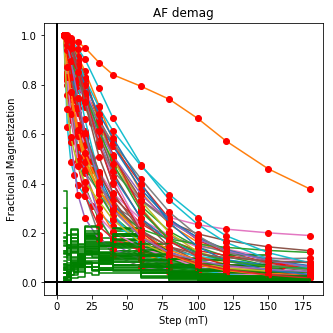

In [266]:
ipmag.plot_dmag(data=df,title="AF demag",fignum=1)

This plotted all the data in the file.  we could also plot the data by site:
- read in the specimens table to relate specimen to sample
- read in the sample table to relate sample to site
- merge the sample and site columns into the measurement table on the specimen column
- get a unique list of site names and walk through them one by one

In [267]:
spec_df=pd.read_csv('../dmag_magic/specimens.txt',sep='\t',header=1) # read in specimen table
samp_df=pd.read_csv('../dmag_magic/samples.txt',sep='\t',header=1) # read in sample table
spec_df=spec_df[['specimen','sample']] # trim specimen table to required columns
samp_df=samp_df[['sample','site']] # ditto sample table
df_ext=pd.merge(df,spec_df,how='inner',on='specimen') # merge sample to specimen name
df_ext=pd.merge(df_ext,samp_df,how='inner',on='sample') # merge site to sample name
df_ext.head() # see how we did

,specimen,treat_ac_field,magn_moment,quality,sample,site
0,mc01f,0.0050,0.000028,g,mc01f,mc01
1,mc01f,0.0075,0.000028,g,mc01f,mc01
2,mc01f,0.0100,0.000027,g,mc01f,mc01
3,mc01f,0.0125,0.000026,g,mc01f,mc01
4,mc01f,0.0150,0.000025,g,mc01f,mc01


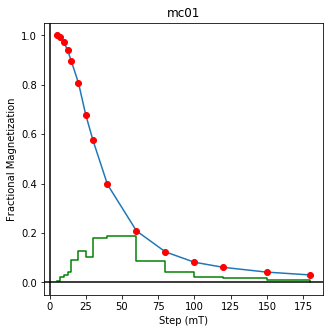

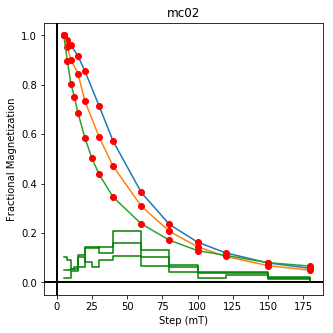

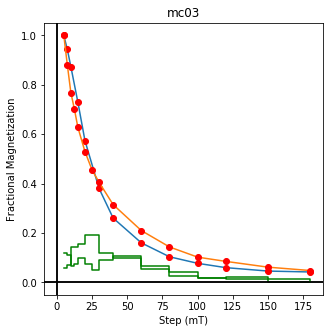

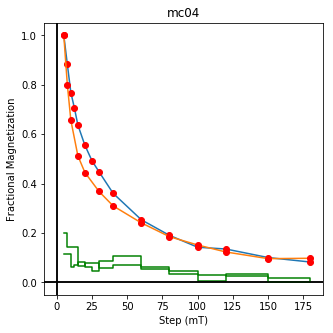

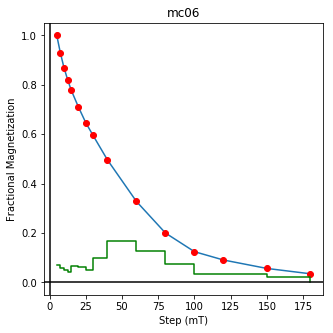

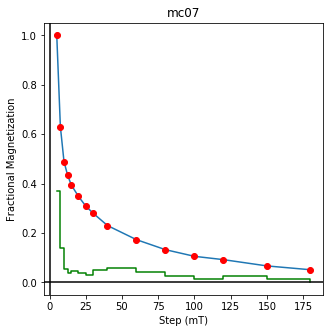

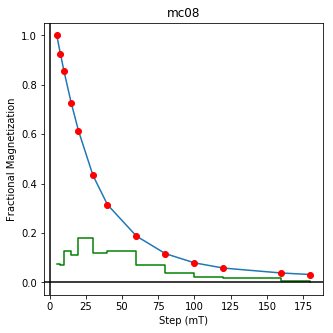

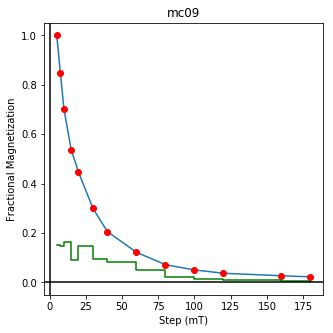

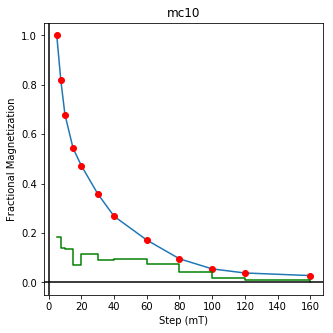

In [268]:
sites=df_ext.site.unique()
cnt=1
for site in sites:
    site_df=df_ext[df_ext.site==site] # fish out this site
    site_df=site_df[['specimen','treat_ac_field','magn_moment','quality']] # trim to essentials
    ipmag.plot_dmag(data=site_df,title=site,fignum=cnt)
    cnt+=1

We could repeat for thermal data if we felt like it using 'LT-T-Z' as the method_code key
and treat_temp as the step.  We could also save the plots using plt.savefig('FIGNAME.FMT') where FIGNAME could be the site, location, demag type as you wish.  

## download_magic
We can use the function **ipmag.download_magic()** for within the notebook use. 

In [269]:
help(ipmag.download_magic)

Help on function download_magic in module pmagpy.ipmag:

download_magic(infile, dir_path='.', input_dir_path='.', overwrite=False, print_progress=True, data_model=3.0, separate_locs=False)
    takes the name of a text file downloaded from the MagIC database and
    unpacks it into magic-formatted files. by default, download_magic assumes
    that you are doing everything in your current directory. if not, you may
    provide optional arguments dir_path (where you want the results to go) and
    input_dir_path (where the downloaded file is).
    
    Parameters
    ----------
    infile : str
        MagIC-format file to unpack
    dir_path : str
        output directory (default ".")
    input_dir : str
        input directory (default ".")
    overwrite: bool
        overwrite current directory (default False)
    print_progress: bool
        verbose output (default True)
    data_model : float
        MagIC data model 2.5 or 3 (default 3)
    separate_locs : bool
        create a sep

In [270]:
ipmag.download_magic(infile='Upgraded Contribution v3.0.txt',\
                     input_dir_path='../download_magic')

working on:  'contribution'
1  records written to file  ./contribution.txt
contribution  data put in  ./contribution.txt
working on:  'locations'
3  records written to file  ./locations.txt
locations  data put in  ./locations.txt
working on:  'sites'
52  records written to file  ./sites.txt
sites  data put in  ./sites.txt
working on:  'samples'
437  records written to file  ./samples.txt
samples  data put in  ./samples.txt
working on:  'specimens'
226  records written to file  ./specimens.txt
specimens  data put in  ./specimens.txt
working on:  'measurements'
3072  records written to file  ./measurements.txt
measurements  data put in  ./measurements.txt
working on:  'criteria'
20  records written to file  ./criteria.txt
criteria  data put in  ./criteria.txt
working on:  'ages'
20  records written to file  ./ages.txt
ages  data put in  ./ages.txt


True

## eigs_s
There is a function **ipmag.eigs_s()** which will do this in a notebook:

In [271]:
help(ipmag.eigs_s)

Help on function eigs_s in module pmagpy.ipmag:

eigs_s(infile='', dir_path='.')
    Converts eigenparamters format data to s format
    
    Parameters
    ___________________
    Input:
        file : input file name with eigenvalues (tau) and eigenvectors (V) with  format:
            tau_1 V1_dec V1_inc tau_2 V2_dec V2_inc tau_3 V3_dec V3_inc
    Output
         the six tensor elements as a nested array
          [[x11,x22,x33,x12,x23,x13],....]



In [272]:
Ss=ipmag.eigs_s(infile="eigs_s_example.dat", dir_path='../eigs_s')
for s in Ss:
    print (s)

[0.33416328, 0.33280227, 0.33303446, -0.00016631071, 0.0012316267, 0.0013552071]
[0.33416328, 0.33280227, 0.33303446, -0.00016631071, 0.0012316267, 0.0013552071]
[0.33416328, 0.33280227, 0.33303446, -0.00016631071, 0.0012316267, 0.0013552071]
[0.33416328, 0.33280227, 0.33303446, -0.00016631071, 0.0012316267, 0.0013552071]
[0.33416328, 0.33280227, 0.33303446, -0.00016631071, 0.0012316267, 0.0013552071]
[0.33416328, 0.33280227, 0.33303446, -0.00016631071, 0.0012316267, 0.0013552071]
[0.33416328, 0.33280227, 0.33303446, -0.00016631071, 0.0012316267, 0.0013552071]
[0.33416328, 0.33280227, 0.33303446, -0.00016631071, 0.0012316267, 0.0013552071]


## eq_di

In [273]:
help(pmag.doeqdi)

Help on function doeqdi in module pmagpy.pmag:

doeqdi(x, y, UP=0)
    Takes digitized x,y, data and returns the dec,inc, assuming an
    equal area projection
    Parameters
    __________________
        x : array of digitized x from point on equal area projection
        y : array of  igitized y from point on equal area projection
        UP : if True, is an upper hemisphere projection
    Output :
        dec : declination
        inc : inclination



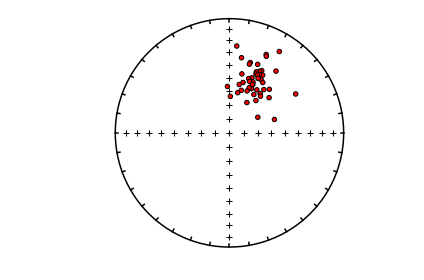

In [274]:
# read in the data into an array
# x is assumed first column, y, second
xy=np.loadtxt('../eq_di/eq_di_example.dat').transpose()
decs,incs=pmag.doeqdi(xy[0],xy[1])
ipmag.plot_net(1)
ipmag.plot_di(dec=decs,inc=incs,color='r',edge='black')

## eqarea
This problem was solved by Nick Swanson-Hysell who started the **ipmag** module just for this purpose!  We use **ipmag.plot_net()** to plot the net, then **ipmag.plot_di()** to plot the directions.  

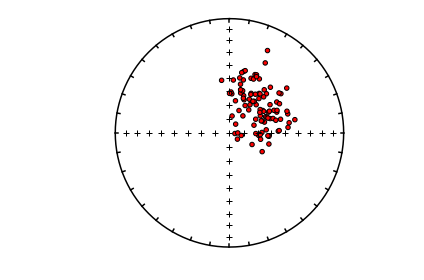

In [275]:
di_block=np.loadtxt('../eqarea/fishrot.out')
ipmag.plot_net(1)
ipmag.plot_di(di_block=di_block,color='red',edge='black')

## eqarea_ell
Makes plots of eqarea area projections and confidence ellipses for dec,inc pairs
We make the equal area projects with the **ipmag.plot_net()** and **ipmag.plot_di()** functions.  The options in eqarea_ell are: 
    Fisher mean(s) and alpha_95(s)
    Bingham mean and ellipse(s)
    Kent mean(s) - same as Fisher - and Kent ellipse(s)
    Bootstrapped mean(s)  - same as Fisher - and ellipse(s) 
    Bootstrapped eigenvectors
For Bingham mean, the N/R data are assumed antipodal and the procedure would be:
    - plot the data
    - calculate the bingham ellipse with **pmag.dobingham()**
    - plot the ellipse using **pmag.plot_di_mean_ellipse()**
All others, the data are not assumed antipodal, and must be separated into normal and reverse modes. To do that use **pmag.separate_directions()**. then:
    - calculate the ellipses for each mode:
        - Kent: use **pmag.dokent()**, setting NN to the number of data points
        - Bootstrap : use **pmag.di_boot()** to generate the bootstrapped means
            - either just plot the eigenvectors (ipmag.plot_di()) OR
            - calcualate the bootstrapped ellipses with **pmag.dokent()** setting NN to 1
    - plot the ellipses if desired. 
    

In [276]:
#read in the data into an array
vectors=np.loadtxt('../eqarea_ell/tk03.out').transpose()
di_block=vectors[0:2].transpose() # decs are di_block[0], incs are di_block[1]
di_block

array([[ 182.7,  -64.7],
       [ 354.7,   62.8],
       [ 198.1,  -68.1],
       [ 344.8,   61.8],
       [ 194. ,  -56.5],
       [ 350. ,   56.1],
       [ 214.2,  -55.3],
       [ 344.9,   56.5],
       [ 172.6,  -70.7],
       [   3. ,   60.9],
       [ 155.2,  -60.2],
       [   8.4,   65.1],
       [ 183.5,  -56.5],
       [ 342.5,   56.1],
       [ 175.5,  -53.4],
       [ 338.9,   73.3],
       [ 169.8,  -56.9],
       [ 347.1,   45.9],
       [ 183.2,  -52.5],
       [  12.5,   57.5]])

### Bingham ellipses

In [277]:
help(pmag.dobingham)

Help on function dobingham in module pmagpy.pmag:

dobingham(di_block)
    Calculates the Bingham mean and associated statistical parameters from
    directions that are input as a di_block
    
    Parameters
    ----------
    di_block : a nested list of [dec,inc] or [dec,inc,intensity]
    
    Returns
    -------
    bpars : dictionary containing the Bingham mean and associated statistics
    dictionary keys
        dec : mean declination
        inc : mean inclination
        n : number of datapoints
        Eta : major ellipse
        Edec : declination of major ellipse axis
        Einc : inclination of major ellipse axis
        Zeta : minor ellipse
        Zdec : declination of minor ellipse axis
        Zinc : inclination of minor ellipse axis



In [278]:
help(ipmag.plot_di_mean_ellipse)

Help on function plot_di_mean_ellipse in module pmagpy.ipmag:

plot_di_mean_ellipse(dictionary, fignum=1, color='k', marker='o', markersize=20, label='', legend='no')
    Plot a mean direction (declination, inclination)  confidence ellipse.
    
    Parameters
    -----------
    dictionary : a dictionary generated by the pmag.dobingham or pmag.dokent funcitons



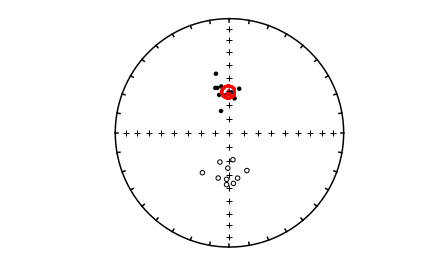

In [279]:
ipmag.plot_net(1)
ipmag.plot_di(di_block=di_block)
bpars=pmag.dobingham(di_block)
ipmag.plot_di_mean_ellipse(bpars,color='red',marker='^',markersize=50)

### Fisher mean, a95

In [280]:
help(pmag.separate_directions)

Help on function separate_directions in module pmagpy.pmag:

separate_directions(di_block)
    Separates set of directions into two modes based on principal direction
    
    Parameters
    _______________
    di_block : block of nested dec,inc pairs
    
    Return
    mode_1_block,mode_2_block :  two lists of nested dec,inc pairs



In [2]:
vectors=np.loadtxt('../eqarea_ell/tk03.out').transpose()
di_block=vectors[0:2].transpose() # decs are di_block[0], incs are di_block[1]
mode_1,mode_2=pmag.separate_directions(di_block)

In [3]:
help(ipmag.fisher_mean)

Help on function fisher_mean in module pmagpy.ipmag:

fisher_mean(dec=None, inc=None, di_block=None)
    Calculates the Fisher mean and associated parameters from either a list of
    declination values and a separate list of inclination values or from a
    di_block (a nested list a nested list of [dec,inc,1.0]). Returns a
    dictionary with the Fisher mean and statistical parameters.
    
    Parameters
    ----------
    dec : list of declinations or longitudes
    inc : list of inclinations or latitudes
    di_block : a nested list of [dec,inc,1.0]
        A di_block can be provided instead of dec, inc lists in which case it
        will be used. Either dec, inc lists or a di_block need to be provided.
    
    Returns
    -------
    fisher_mean : dictionary containing the Fisher mean parameters
    
    Examples
    --------
    Use lists of declination and inclination to calculate a Fisher mean:
    
    >>> ipmag.fisher_mean(dec=[140,127,142,136],inc=[21,23,19,22])
    {'alpha

In [4]:
mode_1_fpars=ipmag.fisher_mean(di_block=mode_1)
mode_2_fpars=ipmag.fisher_mean(di_block=mode_2)

In [5]:
help(ipmag.plot_di_mean)

Help on function plot_di_mean in module pmagpy.ipmag:

plot_di_mean(dec, inc, a95, color='k', marker='o', markersize=20, label='', legend='no')
    Plot a mean direction (declination, inclination) with alpha_95 ellipse on
    an equal area plot.
    
    Before this function is called, a plot needs to be initialized with code
    that looks something like:
    >fignum = 1
    >plt.figure(num=fignum,figsize=(10,10),dpi=160)
    >ipmag.plot_net(fignum)
    
    Required Parameters
    -----------
    dec : declination of mean being plotted
    inc : inclination of mean being plotted
    a95 : a95 confidence ellipse of mean being plotted
    
    Optional Parameters (defaults are used if not specified)
    -----------
    color : the default color is black. Other colors can be chosen (e.g. 'r').
    marker : the default is a circle. Other symbols can be chosen (e.g. 's').
    markersize : the default is 20. Other sizes can be chosen.
    label : the default is no label. Labels can be assi

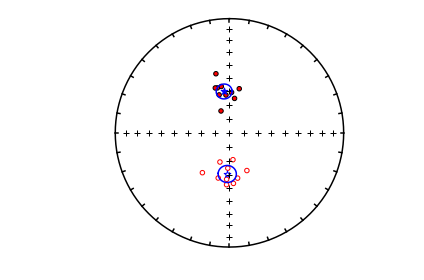

In [285]:
# plot the data
ipmag.plot_net(1)
ipmag.plot_di(di_block=di_block,color='red',edge='black')
# draw on the means and lpha95
ipmag.plot_di_mean(dec=mode_1_fpars['dec'],inc=mode_1_fpars['inc'],a95=mode_1_fpars['alpha95'],\
                  marker='*',color='blue',markersize=50)

ipmag.plot_di_mean(dec=mode_2_fpars['dec'],inc=mode_2_fpars['inc'],a95=mode_2_fpars['alpha95'],\
                  marker='*',color='blue',markersize=50)


### Kent mean and ellipse

In [286]:
help(pmag.dokent)

Help on function dokent in module pmagpy.pmag:

dokent(data, NN)
    gets Kent  parameters for data
    Parameters
    ___________________
    data :  nested pairs of [Dec,Inc]
    NN  : normalization
        NN is the number of data for Kent ellipse
        NN is 1 for Kent ellipses of bootstrapped mean directions
    
    Return 
    kpars dictionary keys
        dec : mean declination
        inc : mean inclination
        n : number of datapoints
        Eta : major ellipse
        Edec : declination of major ellipse axis
        Einc : inclination of major ellipse axis
        Zeta : minor ellipse
        Zdec : declination of minor ellipse axis
        Zinc : inclination of minor ellipse axis



In [287]:
mode_1_kpars=pmag.dokent(mode_1,len(mode_1))
mode_2_kpars=pmag.dokent(mode_2,len(mode_2))

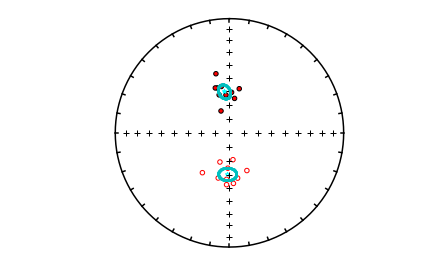

In [288]:
# plot the data
ipmag.plot_net(1)
ipmag.plot_di(di_block=di_block,color='red',edge='black')
# draw on the means and lpha95
ipmag.plot_di_mean_ellipse(mode_1_kpars,marker='*',color='cyan',markersize=20)
ipmag.plot_di_mean_ellipse(mode_2_kpars,marker='*',color='cyan',markersize=20)

### Bootstrap eigenvectors

In [289]:
help(pmag.di_boot)

Help on function di_boot in module pmagpy.pmag:

di_boot(DIs, nb=5000)
     returns bootstrap means  for Directional data
     Parameters
     _________________
     DIs : nested list of Dec,Inc pairs
     nb : number of bootstrap pseudosamples
    
     Returns 
    -------
        nested list of bootstrapped mean Dec,Inc pairs



In [290]:
mode_1_BDIs=pmag.di_boot(mode_1)
mode_2_BDIs=pmag.di_boot(mode_2)

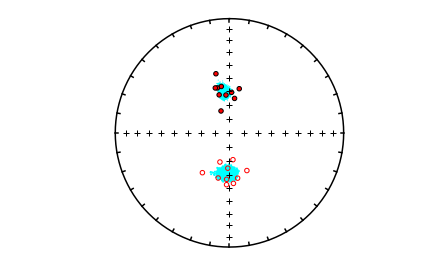

In [291]:
ipmag.plot_net(1)
ipmag.plot_di(di_block=mode_1_BDIs,color='cyan',markersize=1)
ipmag.plot_di(di_block=mode_2_BDIs,color='cyan',markersize=1)
ipmag.plot_di(di_block=di_block,color='red',edge='black')


### Boostrapped ellipses

In [292]:
mode_1_bpars=pmag.dokent(mode_1_BDIs,1)
mode_2_bpars=pmag.dokent(mode_2_BDIs,1)

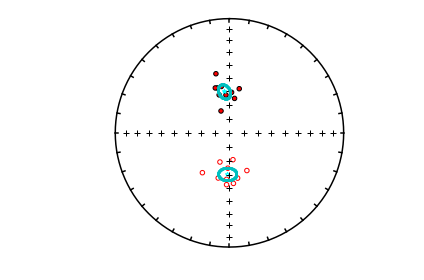

In [293]:
# plot the data
ipmag.plot_net(1)
ipmag.plot_di(di_block=di_block,color='red',edge='black')
# draw on the means and lpha95
ipmag.plot_di_mean_ellipse(mode_1_bpars,marker='*',color='cyan',markersize=20)
ipmag.plot_di_mean_ellipse(mode_2_bpars,marker='*',color='cyan',markersize=20)

## eqarea_magic
**eqarea_magic.py** takes MagIC data model 3 files and makes equal area projections of declination, inclination data for a variety of  selections, 
i.e. all the data, by site, by sample, or by specimen
It has the option to plot in different coordinate systems (if available) and various ellipses.  It will also make a color contour plot if desired.  
We can reproduce most of this functionality with **ipmag.plot_net()** and **ipmag_plot_di()** using **Pandas** filtering capability.  

Let's start with a simple plot of site mean directions, assuming that they were interpreted from measurements using **pmag_gui.py** or some such program and have all the required meta-data.  

We want data in geographic coordinates (dir_tilt_correction=0).  The keys for directions are dir_dec and dir_inc.     One could add the ellipses using **ipmag.plot_di_mean_ellipse()**.  

### whole study


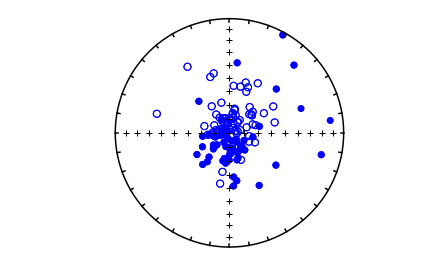

In [294]:
sites=pd.read_csv('../eqarea_magic/sites.txt',sep='\t',header=1)
site_dirs=sites[sites['dir_tilt_correction']==0]
ipmag.plot_net(1)
di_block=sites[['dir_dec','dir_inc']].values
#ipmag.plot_di(sites['dir_dec'].values,sites['dir_inc'].values,color='blue',markersize=50)
ipmag.plot_di(di_block=di_block,color='blue',markersize=50)

### whole study with color contour option
for this we can use the function **pmagplotlib.plotEQcont()** which makes a color contour of a dec, inc data

In [295]:
help(pmagplotlib.plotEQcont)

Help on function plotEQcont in module pmagpy.pmagplotlib:

plotEQcont(fignum, DIblock, color_map='coolwarm')
    plots dec inc block as a color contour
    Parameters
    __________________
    Input:
        fignum :  figure number
        DIblock : nested pairs of [Declination, Inclination]
        color_map : matplotlib color map [default is coolwarm]
    Output:
        figure



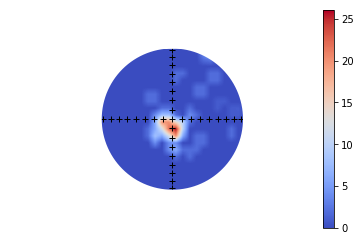

In [296]:
ipmag.plot_net(1)
pmagplotlib.plotEQcont(1,di_block)

### specimens by site
This study averaged specimens (not samples) by site, so we would like to make plots of all the specimen data for each site.   We can do things the in a similar way to what we did in the **dmag_magic** example.  
A few particulars:
- We will be plotting specimen interpetations in geographic coordinates (dir_tilt_correction=0)
- We need to look at the method codes as there might be fisher means, principal components, great circles, etc.  A complete list of method codes for Direction Estimation can be found here:  https://www2.earthref.org/MagIC/method-codes
- There might be 'bad' directions - 'result_quality'='b' as opposed to 'g'.  
- There are a lot of sites in this study, so let's just look at the first 10...   

In [297]:
# read in specimen table
spec_df=pd.read_csv('../eqarea_magic/specimens.txt',sep='\t',header=1) 
# read in sample table
samp_df=pd.read_csv('../eqarea_magic/samples.txt',sep='\t',header=1) 
# get only what we need from samples (sample to site mapping)
samp_df=samp_df[['sample','site']] 
# merge site to specimen name in the specimen data frame
df_ext=pd.merge(spec_df,samp_df,how='inner',on='sample') 
# truncate to the first 10 sites
sites=df_ext.site.unique()[0:11]

We need to filter specimen data for dir_tilt_correction=0
and separate into DE-BFP (best fit planes) and not.

In [298]:
# get the geographic coordinates
spec_df=df_ext[spec_df.dir_tilt_correction==0]
# filter to exclude planes
spec_lines=spec_df[spec_df.method_codes.str.contains('DE-BFP')==False]
# filter for planes
spec_df_gc=spec_df[spec_df.method_codes.str.contains('DE-BFP')==True]

In [299]:
# here's a new one:
help(ipmag.plot_gc)

Help on function plot_gc in module pmagpy.ipmag:

plot_gc(poles, color='g', fignum=1)
    plots a great circle on an equal area projection
    Parameters
    ____________________
    Input
       fignum : number of matplotlib object
       poles : nested list of [Dec,Inc] pairs of poles
       color : color of lower hemisphere dots for great circle - must be in form: 'g','r','y','k',etc.
               upper hemisphere is always cyan



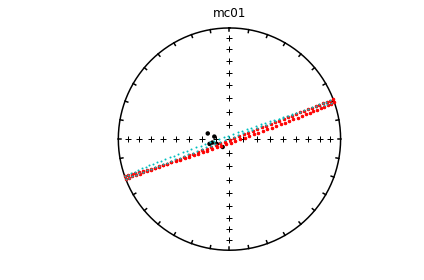

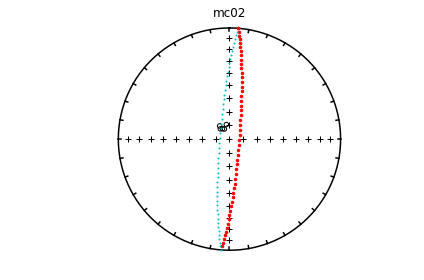

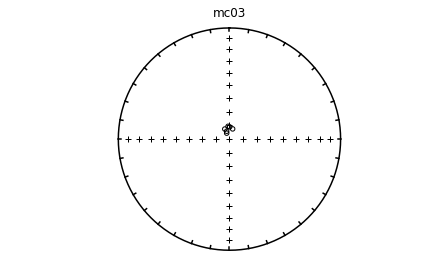

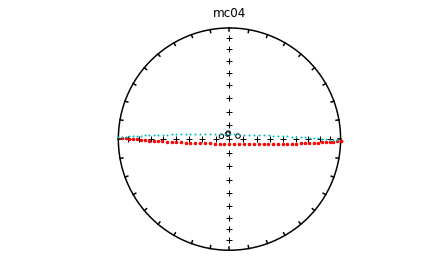

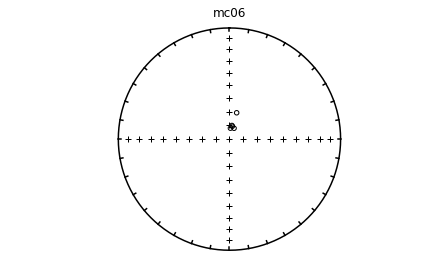

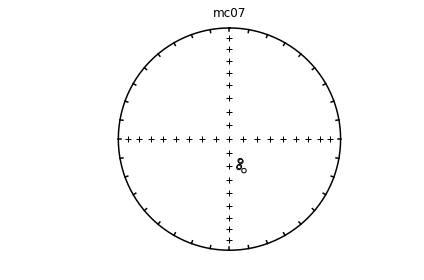

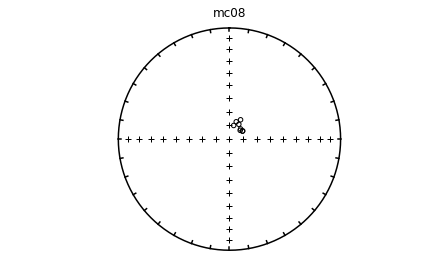

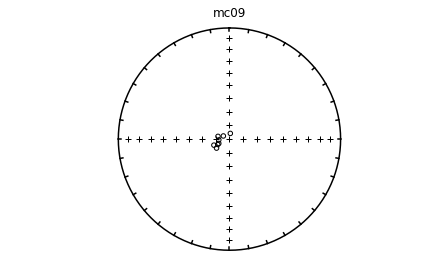

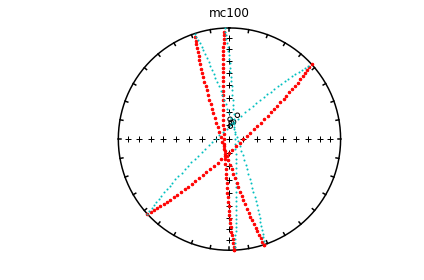

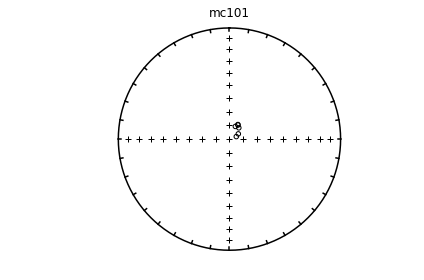

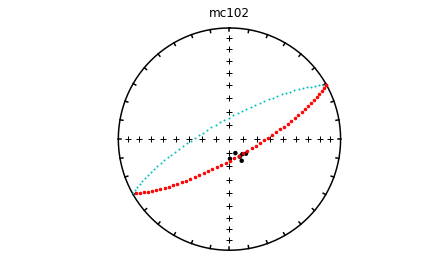

In [300]:
cnt=1
for site in sites:
    plt.figure(cnt)
    ipmag.plot_net(cnt)
    plt.title(site)
    site_lines=spec_lines[spec_lines.site==site] # fish out this site
    ipmag.plot_di(site_lines.dir_dec.values,site_lines.dir_inc.values)
    site_planes=spec_df_gc[spec_df_gc.site==site]
    poles=site_planes[['dir_dec','dir_inc']].values
    if poles.shape[0]>0:
        ipmag.plot_gc(poles,fignum=cnt,color='r')
    cnt+=1

### measurements by specimen

We can do this like this:

- read in the MagIC data model 3 measurements table into a **Pandas** data frame
- get a list of unique specimen names
- truncate this to the first 10 for this purpose
- plot the dir_dec and dir_inc fields by specimen


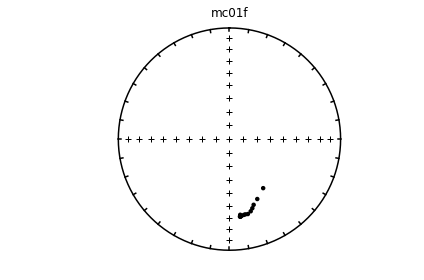

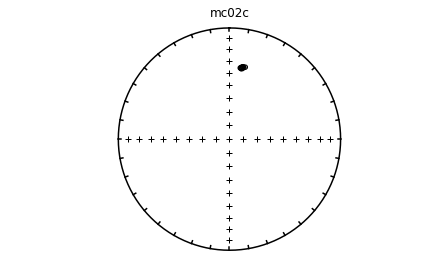

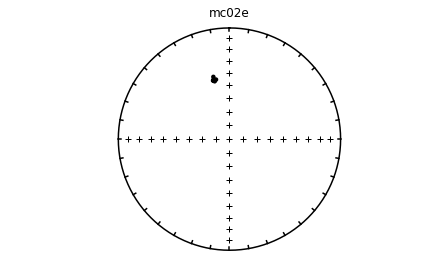

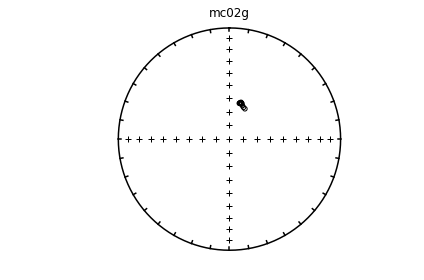

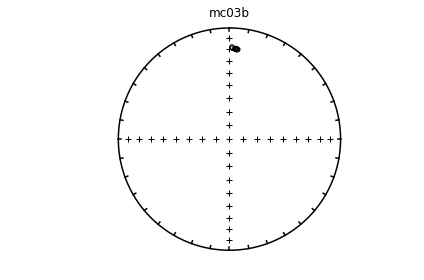

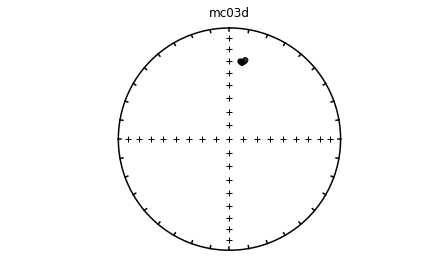

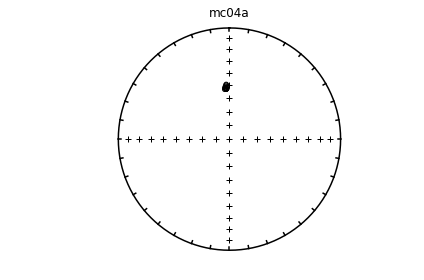

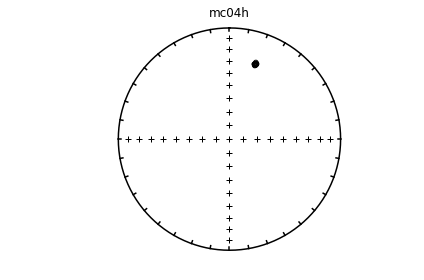

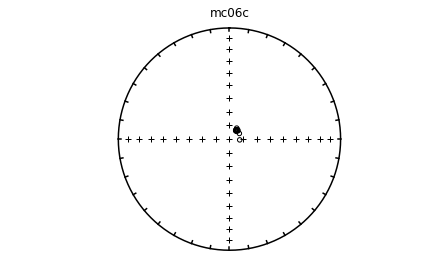

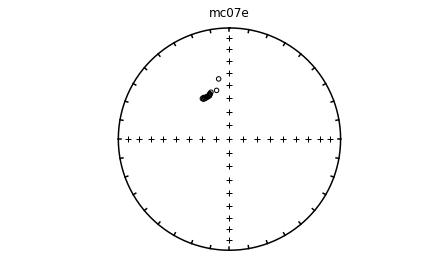

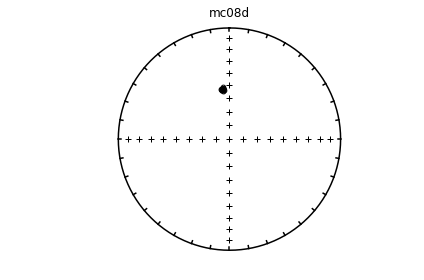

In [301]:
# read in measurements table
meas_df=pd.read_csv('../eqarea_magic/measurements.txt',sep='\t',header=1) 
specimens=meas_df.specimen.unique()[0:11]
cnt=1
for spec in specimens:
    meas_spc=meas_df[meas_df.specimen==spec]
    plt.figure(cnt)
    ipmag.plot_net(cnt)
    plt.title(spec)
    ipmag.plot_di(meas_spc.dir_dec.values,meas_spc.dir_inc.values)
    cnt+=1

## find_ei

This program has been implemented as **ipmag.find_ei()**.

In [302]:
help(ipmag.find_ei)

Help on function find_ei in module pmagpy.ipmag:

find_ei(data, nb=1000, save=False, save_folder='.', fmt='svg', site_correction=False, return_new_dirs=False)
    Applies series of assumed flattening factor and "unsquishes" inclinations assuming tangent function.
    Finds flattening factor that gives elongation/inclination pair consistent with TK03;
    or, if correcting by site instead of for study-level secular variation,
    finds flattening factor that minimizes elongation and most resembles a
    Fisherian distribution.
    Finds bootstrap confidence bounds
    
    Required Parameter
    -----------
    data: a nested list of dec/inc pairs
    
    Optional Parameters (defaults are used unless specified)
    -----------
    nb: number of bootstrapped pseudo-samples (default is 1000)
    save: Boolean argument to save plots (default is False)
    save_folder: path to folder in which plots should be saved (default is current directory)
    fmt: specify format of saved plots (defau

Bootstrapping.... be patient

The original inclination was: 38.9290449093

The corrected inclination is: 58.8324603221
with bootstrapped confidence bounds of: 48.166301591 to 66.6473634468
and elongation parameter of: 1.46786548594
The flattening factor is: 0.425


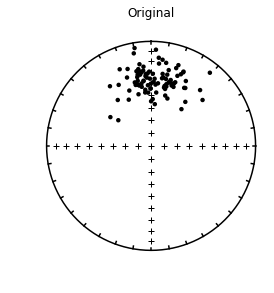

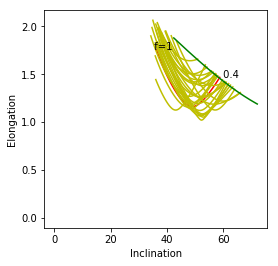

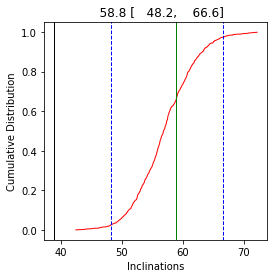

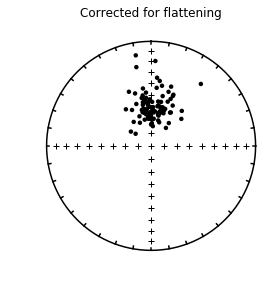

In [303]:
data=np.loadtxt('../find_EI/find_EI_example.dat')
ipmag.find_ei(data)

## fisher
**fisher.py** just calls the function **pmag.fshdev()** N times.

In [6]:
help(pmag.fshdev)

Help on function fshdev in module pmagpy.pmag:

fshdev(k)
    Generate a random draw from a Fisher distribution with mean declination
    of 0 and inclination of 90 with a specified kappa.
    
    Parameters
    ----------
    k : kappa (precision parameter) of the distribution
    
    Returns
    ----------
    dec, inc : declination and inclination of random Fisher distribution draw



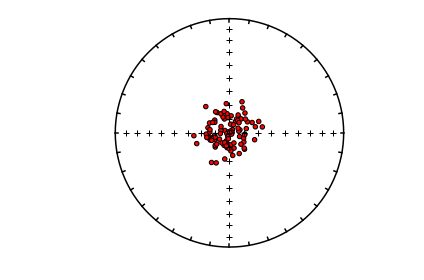

In [7]:
# set the number, N, and kappa
N,kappa=100,20
# a basket to put things in
fish=[]
# get the Fisherian deviates
for i in range(N):
    d,i=pmag.fshdev(kappa)
    fish.append([d,i])
ipmag.plot_net(1)
ipmag.plot_di(di_block=fish,color='r',edge='black')

## fishqq
Blessedly, this has been incorporated into **ipmag.fishqq()**.  

In [306]:
help(ipmag.fishqq)

Help on function fishqq in module pmagpy.ipmag:

fishqq(lon=None, lat=None, di_block=None)
    Test whether a distribution is Fisherian and make a corresponding Q-Q plot.
    The Q-Q plot shows the data plotted against the value expected from a
    Fisher distribution. The first plot is the uniform plot which is the
    Fisher model distribution in terms of longitude (declination). The second
    plot is the exponential plot which is the Fisher model distribution in terms
    of latitude (inclination). In addition to the plots, the test statistics Mu
    (uniform) and Me (exponential) are calculated and compared against the
    critical test values. If Mu or Me are too large in comparision to the test
    statistics, the hypothesis that the distribution is Fisherian is rejected
    (see Fisher et al., 1987).
    
    Parameters:
    -----------
    lon : longitude or declination of the data
    lat : latitude or inclination of the data
        or
    di_block: a nested list of [dec,inc

consistent with Fisherian model


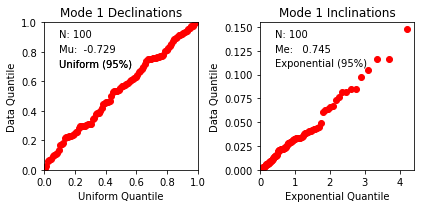

In [307]:
di_block=np.loadtxt('../fishqq/fishqq_example.txt')
fqpars=ipmag.fishqq(di_block=di_block)
print (fqpars['Test_result'])

## fishrot
This has been implemented as **ipmag.fishrot()**. 

In [308]:
help(ipmag.fishrot)

Help on function fishrot in module pmagpy.ipmag:

fishrot(k=20, n=100, dec=0, inc=90, di_block=True)
    Generates Fisher distributed unit vectors from a specified distribution
    using the pmag.py fshdev and dodirot functions.
    
    Parameters
    ----------
    k : kappa precision parameter (default is 20)
    n : number of vectors to determine (default is 100)
    dec : mean declination of distribution (default is 0)
    inc : mean inclination of distribution (default is 90)
    di_block : this function returns a nested list of [dec,inc,1.0] as the default
    if di_block = False it will return a list of dec and a list of inc
    
    Returns
    ---------
    di_block : a nested list of [dec,inc,1.0] (default)
    dec, inc : a list of dec and a list of inc (if di_block = False)
    
    Examples
    --------
    >>> ipmag.fishrot(k=20, n=5, dec=40, inc=60)
    [[44.766285502555775, 37.440866867657235, 1.0],
     [33.866315796883725, 64.732532250463436, 1.0],
     [47.0029127705

In [309]:
rotdi=ipmag.fishrot(k=50,n=5,dec=33,inc=41)
for di in rotdi:
    print ('%7.1f %7.1f'%(di[0],di[1]))

   53.2    41.8
   32.8    40.5
   23.5    28.8
   27.5    24.0
   57.4    50.8


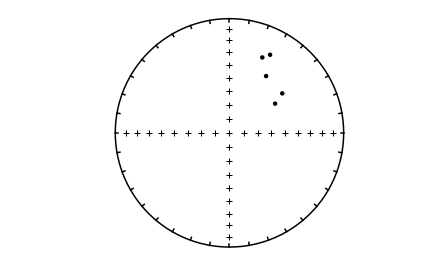

In [310]:
ipmag.plot_net(1)
ipmag.plot_di(di_block=rotdi)

## foldtest
This can be done via **pmag.bootstrap_fold_test()** in a notebook.

In [311]:
help(ipmag.bootstrap_fold_test)

Help on function bootstrap_fold_test in module pmagpy.ipmag:

bootstrap_fold_test(Data, num_sims=1000, min_untilt=-10, max_untilt=120, bedding_error=0, save=False, save_folder='.', fmt='svg', ninety_nine=False)
    Conduct a bootstrap fold test (Tauxe and Watson, 1994)
    
    Three plots are generated: 1) equal area plot of uncorrected data;
    2) tilt-corrected equal area plot; 3) bootstrap results showing the trend
    of the largest eigenvalues for a selection of the pseudo-samples (red
    dashed lines), the cumulative distribution of the eigenvalue maximum (green
    line) and the confidence bounds that enclose 95% of the pseudo-sample
    maxima. If the confidence bounds enclose 100% unfolding, the data "pass"
    the fold test.
    
    Parameters
    ----------
    Data : a numpy array of directional data [dec, inc, dip_direction, dip]
    num_sims : number of bootstrap samples (default is 1000)
    min_untilt : minimum percent untilting applied to the data (default is -10%)

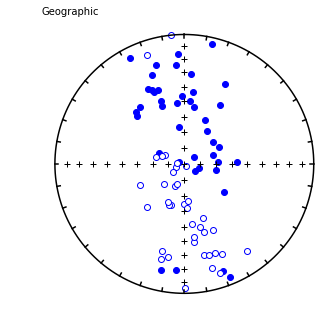

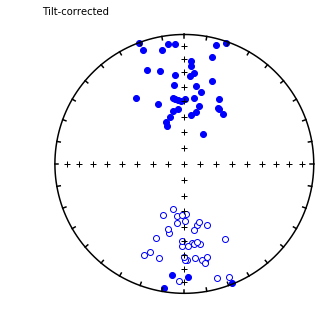

doing  1000  iterations...please be patient.....

tightest grouping of vectors obtained at (95% confidence bounds):
84 - 119 percent unfolding
range of all bootstrap samples: 
72  -  119 percent unfolding


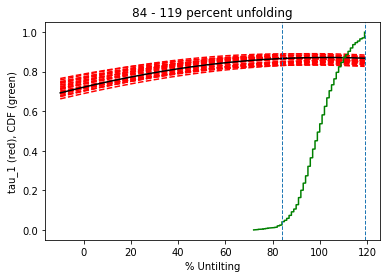

CPU times: user 1min 14s, sys: 271 ms, total: 1min 14s
Wall time: 1min 14s


In [11]:
reload(ipmag)
data=np.loadtxt('../foldtest/foldtest_example.dat')
%time ipmag.bootstrap_fold_test(data)

In [ ]:
%timeit

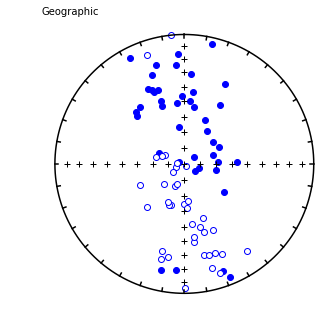

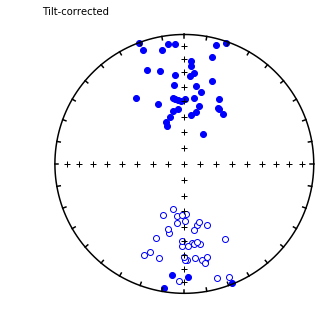

doing  1000  iterations...please be patient.....

tightest grouping of vectors obtained at (95% confidence bounds):
83 - 119 percent unfolding
range of all bootstrap samples: 
74  -  119 percent unfolding


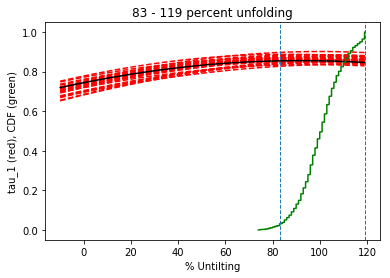

CPU times: user 1min 17s, sys: 335 ms, total: 1min 17s
Wall time: 1min 17s


In [10]:
reload(ipmag)
data=np.loadtxt('../foldtest/foldtest_example.dat')
%time ipmag.bootstrap_fold_test(data)

## foldtest_magic
This is just the MagIC formatted file version of **foldtest.py** and can be done using **ipmag.bootstrap_fold_test()** as above.  We just have to read in the MagIC formattest files and make a data matrix of the format expected by **ipmag.bootstrap_fold_test()**.  Here, **Pandas** is our friend.  We will: 
- Read in the MagIC (data model 3) formatted file
- Make a **Numpy** array with the required fields
- call **ipmag.bootstrap_foldtest_magic()**


In [4]:
sites=pd.read_csv('../foldtest_magic/sites.txt',sep='\t',header=1)
sites.columns

Index(['bed_dip', 'bed_dip_direction', 'citations', 'conglomerate_test',
       'contact_test', 'description', 'dir_dec', 'dir_inc', 'dir_k',
       'dir_n_samples', 'dir_nrm_origin', 'dir_polarity',
       'dir_tilt_correction', 'geologic_classes', 'geologic_types', 'lat',
       'lithologies', 'location', 'lon', 'method_codes', 'result_quality',
       'result_type', 'site', 'vgp_lat', 'vgp_lon', 'vgp_n_samples'],
      dtype='object')

The columns we need are: dir_dec, dir_inc, bed_dip_direction, bed_dip
The dir_dec and dir_inc have to have a dir_tilt_correction of 0 (geographic coordinates).
A little looking through the sites data file shows that the bed_dip_direction are on a separate line (oh database conversion tool maestro, how clever!).  So we will have to pair the bedding orientations with the geographic directional info.  Thank goodness for **Pandas**!


In [314]:
# read in data file
sites=pd.read_csv('../foldtest_magic/sites.txt',sep='\t',header=1)
# get the records with bed_dip and bed_dip_direction
sites_bedding=sites.dropna(subset=['bed_dip','bed_dip_direction'])
# get rid of them out of the original data frame
sites.drop(['bed_dip','bed_dip_direction'],axis=1,inplace=True)
# just pick out what we want (bedding orientation of the sites)
sites_bedding=sites_bedding[['site','bed_dip','bed_dip_direction']]
# put them back into the original data frame
sites=pd.merge(sites,sites_bedding,how='inner',on='site')
# now we can pick out the desired coordinate system
sites_geo=sites[sites.dir_tilt_correction==0]
# and make our data array
data=sites_geo[['dir_dec','dir_inc','bed_dip_direction','bed_dip']].values


NB: One unfortunate thing about the MagIC data model is that bedding orientation information can be either in the samples.txt or the sites.txt file.  This example assumes the data are in the _sites.txt_ file.  If not, you can read in the _samples.txt_ file and merge the bedding information with the site directions.  

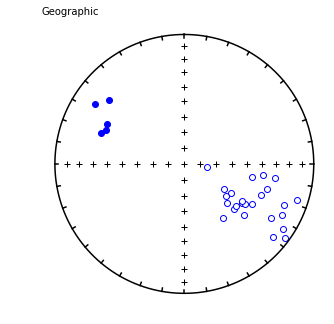

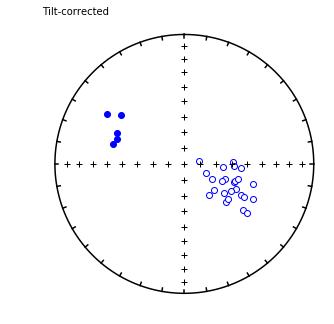

doing  1000  iterations...please be patient.....

tightest grouping of vectors obtained at (95% confidence bounds):
94 - 119 percent unfolding
range of all bootstrap samples: 
71  -  119 percent unfolding


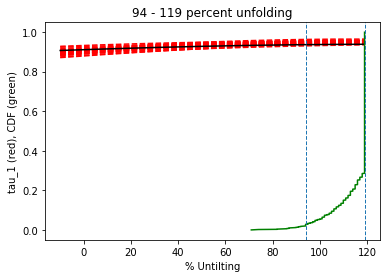

In [315]:
# and off we go! 
ipmag.bootstrap_fold_test(data)

## gaussian
So.. this program calls **pmag.gaussdev()** which just calls **numpy.random.normal()** which we could do, but we would have to import it, so it is easiest just to call the **pmag** version which we have already imported.  

In [316]:
help(pmag.gaussdev)

Help on function gaussdev in module pmagpy.pmag:

gaussdev(mean, sigma, N=1)
        returns a number randomly drawn from a gaussian distribution with the given mean, sigma
        Parmeters:
        _____________________________
        mean : mean of the gaussian distribution from which to draw deviates
        sigma : standard deviation of same
        N : number of deviates desired
    
        Returns
        -------
    
        N deviates from the normal distribution from
    .



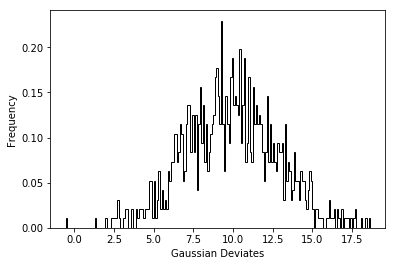

In [317]:
N=1000
bins=200
norm=pmag.gaussdev(10,3,N)
plt.hist(norm,bins=bins,histtype='step',color='black',normed=1,facecolor='white')
plt.xlabel('Gaussian Deviates')
plt.ylabel('Frequency');

## gobing
This just calls **pmag.dobingham()**, so we can do that

In [318]:
help(pmag.dobingham)

Help on function dobingham in module pmagpy.pmag:

dobingham(di_block)
    Calculates the Bingham mean and associated statistical parameters from
    directions that are input as a di_block
    
    Parameters
    ----------
    di_block : a nested list of [dec,inc] or [dec,inc,intensity]
    
    Returns
    -------
    bpars : dictionary containing the Bingham mean and associated statistics
    dictionary keys
        dec : mean declination
        inc : mean inclination
        n : number of datapoints
        Eta : major ellipse
        Edec : declination of major ellipse axis
        Einc : inclination of major ellipse axis
        Zeta : minor ellipse
        Zdec : declination of minor ellipse axis
        Zinc : inclination of minor ellipse axis



In [319]:
di_block=np.loadtxt('../gobing/gobing_example.txt')
pmag.dobingham(di_block)


{'Edec': 105.71735145158095,
 'Einc': 9.9569002682367849,
 'Eta': 4.4907543191720025,
 'Zdec': 20.993890657557721,
 'Zeta': 4.4800269078036408,
 'Zinc': -27.647853556651516,
 'dec': 357.77952733337463,
 'inc': 60.3168380083183,
 'n': 20}

## gofish
This can be done with **ipmag.fisher_mean()** which just calls **pmag.fisher_mean()**.  **ipmag.fisher_mean()** is a little more flexible with data formats, so let's use that.  


In [320]:
help(ipmag.fisher_mean)

Help on function fisher_mean in module pmagpy.ipmag:

fisher_mean(dec=None, inc=None, di_block=None)
    Calculates the Fisher mean and associated parameters from either a list of
    declination values and a separate list of inclination values or from a
    di_block (a nested list a nested list of [dec,inc,1.0]). Returns a
    dictionary with the Fisher mean and statistical parameters.
    
    Parameters
    ----------
    dec : list of declinations or longitudes
    inc : list of inclinations or latitudes
    di_block : a nested list of [dec,inc,1.0]
        A di_block can be provided instead of dec, inc lists in which case it
        will be used. Either dec, inc lists or a di_block need to be provided.
    
    Returns
    -------
    fisher_mean : dictionary containing the Fisher mean parameters
    
    Examples
    --------
    Use lists of declination and inclination to calculate a Fisher mean:
    
    >>> ipmag.fisher_mean(dec=[140,127,142,136],inc=[21,23,19,22])
    {'alpha

In [20]:
di_block=np.loadtxt('../gofish/fishrot.out')
ipmag.fisher_mean(di_block=di_block)

{'alpha95': 6.3204467300511391,
 'csd': 10.511525802823254,
 'dec': 10.783552984917437,
 'inc': 39.602582993520244,
 'k': 59.379770717798884,
 'n': 10,
 'r': 9.8484332308595075}

## fisher mean on pandas DataFrames
There is also a function **pmag.dir_df_fisher_mean()** that calculates Fisher statistics on a Pandas DataFrame with directional data

In [63]:
help(pmag.dir_df_fisher_mean)

Help on function dir_df_fisher_mean in module pmagpy.pmag:

dir_df_fisher_mean(dir_df)
    calculates fisher mean for Pandas data frame
    
    Parameters
    __________
    dir_df: pandas data frame with columns:
        dir_dec : declination
        dir_inc : inclination
    Returns
    -------
    fpars : dictionary containing the Fisher mean and statistics
        dec : mean declination
        inc : mean inclination
        r : resultant vector length
        n : number of data points
        k : Fisher k value
        csd : Fisher circular standard deviation
        alpha95 : Fisher circle of 95% confidence



In [37]:
# make the data frame
dir_df=pd.read_csv('../gofish/fishrot.out',delim_whitespace=True, header=None)
dir_df.columns=['dir_dec','dir_inc']
pmag.dir_df_fisher_mean(dir_df)

{'alpha95': 6.3204467300511391,
 'csd': 10.511525802823254,
 'dec': 10.78355298491744,
 'inc': 39.602582993520237,
 'k': 59.379770717798884,
 'n': 10,
 'r': 9.8484332308595075}

## gokent
This calls **pmag.dokent()** (see also **eqarea_ell** example)

In [322]:
help(pmag.dokent)

Help on function dokent in module pmagpy.pmag:

dokent(data, NN)
    gets Kent  parameters for data
    Parameters
    ___________________
    data :  nested pairs of [Dec,Inc]
    NN  : normalization
        NN is the number of data for Kent ellipse
        NN is 1 for Kent ellipses of bootstrapped mean directions
    
    Return 
    kpars dictionary keys
        dec : mean declination
        inc : mean inclination
        n : number of datapoints
        Eta : major ellipse
        Edec : declination of major ellipse axis
        Einc : inclination of major ellipse axis
        Zeta : minor ellipse
        Zdec : declination of minor ellipse axis
        Zinc : inclination of minor ellipse axis



In [323]:
di_block=np.loadtxt('../gokent/gokent_example.txt')
pmag.dokent(di_block,di_block.shape[0])

{'Edec': 147.69921287231705,
 'Einc': 30.819395154843157,
 'Eta': 9.3046593032996263,
 'Zdec': 246.82080930796928,
 'Zeta': 7.8051512371850489,
 'Zinc': 14.881429411175574,
 'dec': 359.15304567103982,
 'inc': 55.033415542547942,
 'n': 20}

## goprinc
This calls **pmag.doprinc()**, so why not us?

In [324]:
help(pmag.doprinc)

Help on function doprinc in module pmagpy.pmag:

doprinc(data)
    Gets principal components from data in form of a list of [dec,inc] data.
    
    Parameters
    ----------
    data : nested list of dec, inc directions
    
    Returns
    -------
    ppars : dictionary with the principal components
        dec : principal directiion declination
        inc : principal direction inclination
        V2dec : intermediate eigenvector declination
        V2inc : intermediate eigenvector inclination
        V3dec : minor eigenvector declination
        V3inc : minor eigenvector inclination
        tau1 : major eigenvalue
        tau2 : intermediate eigenvalue
        tau3 : minor eigenvalue
        N  : number of points
        Edir : elongation direction [dec, inc, length]



In [325]:
di_block=np.loadtxt('../goprinc/goprinc_example.txt')
pmag.doprinc(di_block)

{'Edir': array([ 151.85261736,   29.07891169,    1.        ]),
 'N': 20,
 'V2dec': 151.85261735984162,
 'V2inc': 29.078911691227447,
 'V3dec': 250.25426093396385,
 'V3inc': 14.721055437689328,
 'dec': 3.8694438466644669,
 'inc': 56.740159941913355,
 'tau1': 0.87783141428962386,
 'tau2': 0.071245400428762526,
 'tau3': 0.050923185281613582}

## grab_magic_key
This program was written before the marvelous **Pandas** made life easy.  It reads in a MagIC formatted data file and prints out the desired key.  We can do that!

In [326]:
sites=pd.read_csv('../download_magic/sites.txt',sep='\t',header=1)
print (sites.lat)

0     42.60264
1     42.60264
2     42.60260
3     42.60264
4     42.60352
5     42.60350
6     42.60104
7     42.60100
8     42.73656
9     42.73660
10    42.84180
11    42.84180
12    42.86570
13    42.86570
14    42.92031
15    42.92030
16    42.56857
17    42.49964
18    42.49962
19    42.49960
20    42.50001
21    42.50000
22    42.52872
23    42.52870
24    42.45559
25    42.45560
26    42.48923
27    42.48920
28    42.46186
29    42.46190
30    42.69156
31    42.65289
32    42.65290
33    43.30504
34    43.30500
35    43.36817
36    43.36817
37    43.36820
38    43.42133
39    43.42130
40    43.88590
41    43.88590
42    43.88590
43    43.84273
44    43.84270
45    43.53289
46    43.57494
47    43.57494
48    43.57490
49    44.15663
50    44.15660
51    44.18629
Name: lat, dtype: float64


## histplot
You should use the function **plt.hist()** for this - see **gaussian** example.  

## hysteresis_magic
Use **pmagplotlib.plotHDD()** for this.   

In [327]:
help(pmagplotlib.plotHDD)

Help on function plotHDD in module pmagpy.pmagplotlib:

plotHDD(HDD, B, M, s)
    Function to make hysteresis, deltaM and DdeltaM plots
    Parameters:
    _______________
    Input
        HDD :  dictionary with figure numbers for the keys:
            'hyst' : hysteresis plot  normalized to maximum value
            'deltaM' : Delta M plot
            'DdeltaM' : differential of Delta M plot
        B : list of field values in tesla
        M : list of magnetizations in arbitrary units
        s : specimen name string
    Ouput
      hpars : dictionary of hysteresis parameters with keys:
        'hysteresis_xhf', 'hysteresis_ms_moment', 'hysteresis_mr_moment', 'hysteresis_bc'



{'hysteresis_xhf': '2.48e-05', 'hysteresis_ms_moment': '3.983e+01', 'hysteresis_mr_moment': '9.812e+00', 'hysteresis_bc': '2.868e-02', 'hysteresis_bcr': '6.117e-02', 'magic_method_codes': 'LP-BCR-HDM', 'specimen': 'IS06a-1'}


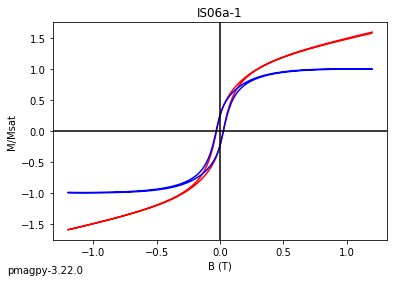

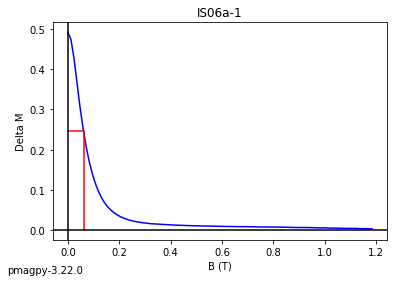

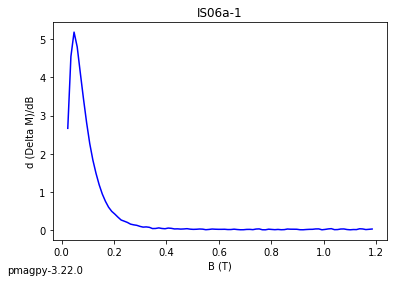

In [328]:
meas_data=pd.read_csv('../hysteresis_magic/measurements.txt',sep='\t',header=1)
hyst_data=meas_data[meas_data.method_codes.str.contains('LP-HYS')]
HDD={'hyst':1,'deltaM':2,'DdeltaM':3}
specimen='IS06a-1'
spec_data=hyst_data[hyst_data.specimen==specimen]
B=spec_data.meas_field_dc.tolist()
M=spec_data.magn_moment.tolist()
hpars=pmagplotlib.plotHDD(HDD,B,M,specimen)
hpars['specimen']=specimen
print (hpars)

## igrf
Use the function **ipmag.igrf()** for this

In [329]:
help(ipmag.igrf)

Help on function igrf in module pmagpy.ipmag:

igrf(input_list, mod='', ghfile='')
    Determine Declination, Inclination and Intensity from the IGRF model.
    (http://www.ngdc.noaa.gov/IAGA/vmod/igrf.html)
    
    Parameters
    ----------
    input_list : list with format [Date, Altitude, Latitude, Longitude]
        date must be in decimal year format XXXX.XXXX (A.D.)
    mod :  desired model
        "" : Use the IGRF
        custom : use values supplied in ghfile
        or choose from this list
        ['arch3k','cals3k','pfm9k','hfm10k','cals10k.2','cals10k.1b']
        where:
            arch3k (Korte et al., 2009)
            cals3k (Korte and Constable, 2011)
            cals10k.1b (Korte et al., 2011)
            pfm9k  (Nilsson et al., 2014)
            hfm10k is the hfm.OL1.A1 of Constable et al. (2016)
            cals10k.2 (Constable et al., 2016)
            the first four of these models, are constrained to agree
            with gufm1 (Jackson et al., 2000) for the p

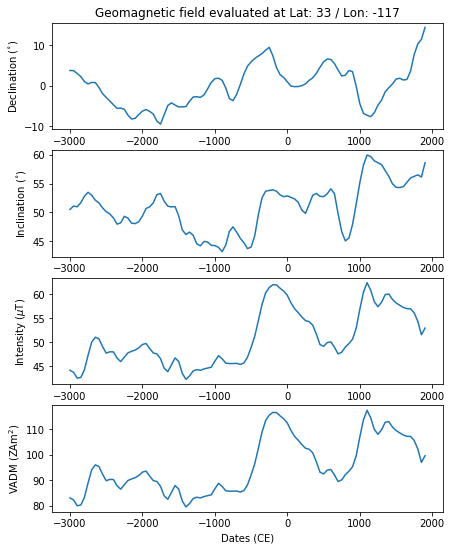

In [330]:
dates=range(-3000,1950,50) # list of dates in +/- Common Era
mod = 'hfm10k' # choose the desired model
lat,lon,alt=33,-117,0 # desired latitude, longitude and alitude
Vecs=[] # list for Dec,Inc,Int outputs
for date in dates: # step through the dates
    Vecs.append(ipmag.igrf([date,alt,lat,lon],mod=mod)) # append to list
vector_df = pd.DataFrame(Vecs)   # make it into a Pandas dataframe
vector_df.columns=['dec','inc','int']
vector_df['vadms']=pmag.b_vdm(vector_df.int.values*1e-9, lat) # calculate the VADMs
vector_df['dec_adj']=vector_df['dec'] 
vector_df.loc[vector_df.dec>180,['dec_adj']]=vector_df.dec-360 # adjust declinations to be -180 => 180
fig=plt.figure(1,figsize=(7,9)) # set up the figure
fig.add_subplot(411) # make 4 rows of plots, this is the first
plt.plot(dates,vector_df.dec_adj) # plot the adjusted declinations
plt.ylabel('Declination ($^{\circ}$)')
plt.title('Geomagnetic field evaluated at Lat: '+str(lat)+' / Lon: '+str(lon))
fig.add_subplot(412) # this is the second
plt.plot(dates,vector_df.inc) # plot  the inclinations
plt.ylabel('Inclination ($^{\circ}$)')
fig.add_subplot(413)
plt.plot(dates,vector_df.int*1e-3) # plot the intensites (in uT instead of nT)
plt.ylabel('Intensity ($\mu$T)')
fig.add_subplot(414) # plot the VADMs 
plt.plot(dates,vector_df.vadms*1e-21) # plot as ZAm^2
plt.ylabel('VADM (ZAm$^2$)')
plt.xlabel('Dates (CE)');



## incfish
Do this by calling **pmag.doincfish()** directly.   

In [331]:
help(pmag.doincfish)

Help on function doincfish in module pmagpy.pmag:

doincfish(inc)
    gets fisher mean inc from inc only data
    input: list of inclination values
    output: dictionary of
        'n' : number of inclination values supplied
        'ginc' : gaussian mean of inclinations
        'inc' : estimated Fisher mean
        'r' : estimated Fisher R value
        'k' : estimated Fisher kappa
        'alpha95' : estimated fisher alpha_95
        'csd' : estimated circular standard deviation



In [332]:
incs=np.loadtxt('../incfish/incfish_example_inc.dat')
pmag.doincfish(incs)

{'alpha95': 0.99662959629642445,
 'csd': 21.705877404696871,
 'ginc': 57.135000000000005,
 'inc': 61.024999999999764,
 'k': 13.925645849497057,
 'n': 100,
 'r': 92.890814467784594}

## irmaq_magic
This program reads in a MagIC data model 3 file with IRM acquisition data and plots it by calling **pmagplotlib.plotMT()** with options to plot by entire data file, site, sample or individual specimen.  We can do that too!  All we need to know is the method_code for IRM acquisition, and to propogate specimen => sample => site identities if any other plotting option besides "entire file" or by specimen is desired.  

In [333]:
help(pmagplotlib.plotMT)

Help on function plotMT in module pmagpy.pmagplotlib:

plotMT(fignum, datablock, s, num, units, norm)
    plots magnetization against (de)magnetizing temperature or field
    
    Parameters
    _________________
    Input
        fignum : matplotlib figure number for plotting
        datablock : nested list of [step, 0, 0, magnetization, 1,quality]
        s : string for title
        num : no idea - set it to zero
        units : [T,K,U] for tesla, kelvin or arbitrary
        norm : [1,0] if 1, normalize, otherwise don't
    Output
        figure



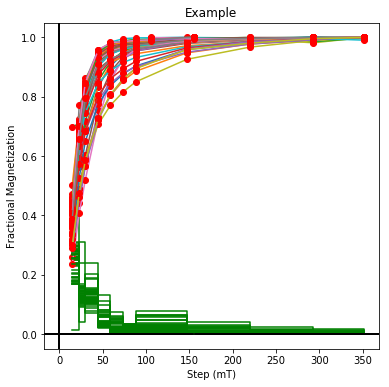

In [3]:
# make the figure
plt.figure(1,(6,6))
#read in the data
data=pd.read_csv('../irmaq_magic/measurements.txt',sep='\t',header=1)
# fish out the IRM data
data=data[data.method_codes.str.contains('LP-IRM')] # 
data['zero']=0 # make a dummy field initialized with zero
data['one']=1 # make a dummy field initialized with one
# make the required list
# possible intensity fields are:
#['magn_moment', 'magn_volume', 'magn_mass', 'magnitude']
# this data file has magn_moment data
# pmagplotlib.plotMT plots data by specimen, so get list of specimens
specimens=data.specimen.unique()
for specimen in specimens: # step through one by one
    spec_df=data[data.specimen==specimen] # get data for this specimen
    # make the data block required
    datablock=np.array(spec_df[['treat_dc_field','zero','zero','magn_moment','one','quality']]).tolist()
    pmagplotlib.plotMT(1,datablock,'Example',0,'T',1)

## lnp_magic

This program makes equal area projections site by site along with the 
Fisher confidence ellipses using the McFadden and McElhinny (1988) 
method for combining lines and planes.  Options are to plot in specimen, geographic or tilt corrected coordinate systems (although the specimen coordinate system is a bit silly if the specimens were not mutually oriented and the geographic and tilt correctioed would presumably be identical except for a coherent rotation of the site.)
It also builds in filters for MAD or $\alpha_{95}$ cutoffs at the specimen level.

After filtering, the site level data are processed by **pmag.dolnp()** which calculates the MM88 statistics.  These, along with the data are then plotted by **pmagplotlib.plotLNP()**.  

We can do all that from within the notebook, using the wonders of Pandas.

In [335]:
help(pmagplotlib.plotLNP)

Help on function plotLNP in module pmagpy.pmagplotlib:

plotLNP(fignum, s, datablock, fpars, direction_type_key)
    plots lines and planes on a great  circle with alpha 95 and mean
    
    Parameters
    Input
        fignum : number of plt.figure() object
        datablock : nested list of dictionaries with keys in 3.0 or 2.5 format
            3.0 keys: dir_dec, dir_inc, dir_tilt_correction = [-1,0,100], direction_type_key =['p','l']
            2.5 keys: dec, inc, tilt_correction = [-1,0,100],direction_type_key =['p','l']
        fpars : Fisher parameters calculated by, e.g., pmag.dolnp() or pmag.dolnp3_0()
        direction_type_key : key for dictionary direction_type ('specimen_direction_type')
    Effects
        plots the site level figure



In [336]:
# read in specimen data
spec_df=pd.read_csv('../lnp_magic/specimens.txt',sep='\t',header=1)
# filter for quality = 'g'
if 'quality'  in spec_df.columns:
    spec_df=spec_df[spec_df.quality=='g']
spec_df.head()


,specimen,sample,experiments,dir_dec,dir_inc,dir_n_measurements,dir_tilt_correction,dir_mad_free,geologic_classes,geologic_types,lithologies,meas_step_max,meas_step_min,meas_step_unit,description,int_corr,citations,method_codes,specimen_direction_type
0,sv01a1,sv01a,NaN,NaN,NaN,NaN,NaN,NaN,Igneous,Lava Flow,Basalt,NaN,NaN,NaN,NaN,NaN,This study,NaN,NaN
1,sv01a1,sv01a,sv01a1 : LP-DIR-AF,348.4,-34.7,12.0,0.0,5.1,NaN,NaN,NaN,0.14,0.005,T,Recalculated from original measurements; super...,u,This study,LP-DIR-AF : SO-CMD-NORTH : DE-BFP : DA-DIR-GEO,p
2,sv01b1,sv01b,NaN,NaN,NaN,NaN,NaN,NaN,Igneous,Lava Flow,Basalt,NaN,NaN,NaN,NaN,NaN,This study,NaN,NaN
3,sv01b1,sv01b,sv01b1 : LP-DIR-AF,122.7,25.5,15.0,0.0,3.8,NaN,NaN,NaN,0.18,0.000,T,Recalculated from original measurements; super...,u,This study,LP-DIR-AF : SO-CMD-NORTH : DE-BFP : DA-DIR-GEO,p
4,sv01g1,sv01g,NaN,NaN,NaN,NaN,NaN,NaN,Igneous,Lava Flow,Basalt,NaN,NaN,NaN,NaN,NaN,This study,NaN,NaN


Of course, this being a data file conerted from data model 2.5 there are several lines per specimen. we want the non-blank dir_dec info with the desired (0) tilt correction

In [337]:
spec_df=spec_df.dropna(subset=['dir_dec','dir_inc','dir_tilt_correction'])
spec_df=spec_df[spec_df.dir_tilt_correction==0]
spec_df.head()

,specimen,sample,experiments,dir_dec,dir_inc,dir_n_measurements,dir_tilt_correction,dir_mad_free,geologic_classes,geologic_types,lithologies,meas_step_max,meas_step_min,meas_step_unit,description,int_corr,citations,method_codes,specimen_direction_type
1,sv01a1,sv01a,sv01a1 : LP-DIR-AF,348.4,-34.7,12.0,0.0,5.1,NaN,NaN,NaN,0.14,0.005,T,Recalculated from original measurements; super...,u,This study,LP-DIR-AF : SO-CMD-NORTH : DE-BFP : DA-DIR-GEO,p
3,sv01b1,sv01b,sv01b1 : LP-DIR-AF,122.7,25.5,15.0,0.0,3.8,NaN,NaN,NaN,0.18,0.000,T,Recalculated from original measurements; super...,u,This study,LP-DIR-AF : SO-CMD-NORTH : DE-BFP : DA-DIR-GEO,p
5,sv01g1,sv01g,sv01g1 : LP-DIR-AF,162.4,36.6,13.0,0.0,3.0,NaN,NaN,NaN,0.18,0.010,T,Recalculated from original measurements; super...,u,This study,LP-DIR-AF : SO-CMD-NORTH : DE-BFP : DA-DIR-GEO,p
7,sv01h1,sv01h,sv01h1 : LP-DIR-AF,190.4,34.6,13.0,0.0,5.0,NaN,NaN,NaN,0.18,0.010,T,Recalculated from original measurements; super...,u,This study,LP-DIR-AF : SO-CMD-NORTH : DE-BFP : DA-DIR-GEO,p
9,sv01j1,sv01j,sv01j1 : LP-DIR-AF,133.4,21.9,8.0,0.0,5.4,NaN,NaN,NaN,0.18,0.060,T,Recalculated from original measurements; super...,u,This study,LP-DIR-AF : SO-CMD-NORTH : DE-BFP : DA-DIR-GEO,p


Let's proceed this way:
- get a list of all the site names. for this we will have to pair the sample with the site name from the samples.txt file.
- look at the data (only quality = 'g'), site by site, sending it to first **pmag.dolnp3_0()**, then to **pmagplotlib.plotLNP()**.

In [338]:
# read in samples table in order to pair site name to specimen data
samp_df=pd.read_csv('../lnp_magic/samples.txt',sep='\t',header=1)
samp_df.head()

,sample,site,specimens,dir_dec,dir_inc,dir_n_specimens,dir_n_specimens_lines,dir_n_specimens_planes,dir_tilt_correction,lat,...,description,azimuth,dip,citations,method_codes,location,sample_direction_type,age,sample_inferred_age_sigma,sample_inferred_age_unit
0,sv01a,sv01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.3432,...,NaN,-19.0,-45.0,This study,SO-MAG : FS-FD : SO-POM : SO-CMD-NORTH,San Francisco Volcanics,NaN,NaN,NaN,NaN
1,sv01a,sv01,sv01a1,348.4,-34.7,1.0,0.0,1.0,0.0,NaN,...,sample direction.,NaN,NaN,This study,LP-DIR-AF : SO-CMD-NORTH : DE-BFP : DA-DIR-GEO,San Francisco Volcanics,p,2.5,2.5,Ma
2,sv01b,sv01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.3432,...,NaN,-51.0,-23.0,This study,SO-MAG : FS-FD : SO-POM : SO-CMD-NORTH,San Francisco Volcanics,NaN,NaN,NaN,NaN
3,sv01b,sv01,sv01b1,122.7,25.5,1.0,0.0,1.0,0.0,NaN,...,sample direction.,NaN,NaN,This study,LP-DIR-AF : SO-CMD-NORTH : DE-BFP : DA-DIR-GEO,San Francisco Volcanics,p,2.5,2.5,Ma
4,sv01c,sv01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.3432,...,NaN,284.0,-51.0,This study,SO-MAG : FS-FD : SO-POM,San Francisco Volcanics,NaN,NaN,NaN,NaN


Of course there are duplicate sample records, so let's drop the blank lat rows (to make sure we have all the blank specimens rows, then make the data frame with just 'sample' and site' columns. Then we can merge it with the spec_df dataframe. 

In [339]:
samp_df=samp_df.dropna(subset=['specimens'])
samp_df=samp_df[['sample','site']]
spec_df=pd.merge(spec_df,samp_df,on='sample')
spec_df

,specimen,sample,experiments,dir_dec,dir_inc,dir_n_measurements,dir_tilt_correction,dir_mad_free,geologic_classes,geologic_types,lithologies,meas_step_max,meas_step_min,meas_step_unit,description,int_corr,citations,method_codes,specimen_direction_type,site
0,sv01a1,sv01a,sv01a1 : LP-DIR-AF,348.4,-34.7,12.0,0.0,5.1,NaN,NaN,NaN,0.14,0.005,T,Recalculated from original measurements; super...,u,This study,LP-DIR-AF : SO-CMD-NORTH : DE-BFP : DA-DIR-GEO,p,sv01
1,sv01b1,sv01b,sv01b1 : LP-DIR-AF,122.7,25.5,15.0,0.0,3.8,NaN,NaN,NaN,0.18,0.000,T,Recalculated from original measurements; super...,u,This study,LP-DIR-AF : SO-CMD-NORTH : DE-BFP : DA-DIR-GEO,p,sv01
2,sv01g1,sv01g,sv01g1 : LP-DIR-AF,162.4,36.6,13.0,0.0,3.0,NaN,NaN,NaN,0.18,0.010,T,Recalculated from original measurements; super...,u,This study,LP-DIR-AF : SO-CMD-NORTH : DE-BFP : DA-DIR-GEO,p,sv01
3,sv01h1,sv01h,sv01h1 : LP-DIR-AF,190.4,34.6,13.0,0.0,5.0,NaN,NaN,NaN,0.18,0.010,T,Recalculated from original measurements; super...,u,This study,LP-DIR-AF : SO-CMD-NORTH : DE-BFP : DA-DIR-GEO,p,sv01
4,sv01j1,sv01j,sv01j1 : LP-DIR-AF,133.4,21.9,8.0,0.0,5.4,NaN,NaN,NaN,0.18,0.060,T,Recalculated from original measurements; super...,u,This study,LP-DIR-AF : SO-CMD-NORTH : DE-BFP : DA-DIR-GEO,p,sv01
5,sv02a1,sv02a,sv02a1 : LP-DIR-AF,330.3,30.4,6.0,0.0,2.5,NaN,NaN,NaN,0.18,0.080,T,Recalculated from original measurements; super...,u,This study,LP-DIR-AF : SO-SUN : DE-BFL : DA-DIR-GEO,l,sv02
6,sv02b1,sv02b,sv02b1 : LP-DIR-AF,225.7,37.0,14.0,0.0,3.7,NaN,NaN,NaN,0.18,0.000,T,Recalculated from original measurements; super...,u,This study,LP-DIR-AF : SO-SUN : DE-BFP : DA-DIR-GEO,p,sv02
7,sv02c1,sv02c,sv02c1 : LP-DIR-AF,103.1,32.3,11.0,0.0,3.8,NaN,NaN,NaN,0.18,0.030,T,Recalculated from original measurements; super...,u,This study,LP-DIR-AF : SO-SUN : DE-BFP : DA-DIR-GEO,p,sv02
8,sv02d1,sv02d,sv02d1 : LP-DIR-AF,338.6,44.5,11.0,0.0,1.3,NaN,NaN,NaN,0.18,0.030,T,Recalculated from original measurements; super...,u,This study,LP-DIR-AF : SO-CMD-NORTH : DE-BFL : DA-DIR-GEO,l,sv02
9,sv02e1,sv02e,sv02e1 : LP-DIR-AF,340.6,42.4,10.0,0.0,0.9,NaN,NaN,NaN,0.18,0.040,T,Recalculated from original measurements; super...,u,This study,LP-DIR-AF : SO-CMD-NORTH : DE-BFL : DA-DIR-GEO,l,sv02


In [340]:
# get the site names
sites=spec_df.site.unique()
sites

array(['sv01', 'sv02', 'sv03', 'sv04', 'sv05', 'sv06', 'sv07', 'sv08',
       'sv09', 'sv10', 'sv11', 'sv12', 'sv15', 'sv16', 'sv17', 'sv18',
       'sv19', 'sv20', 'sv21', 'sv22', 'sv23', 'sv24', 'sv25', 'sv26',
       'sv27', 'sv28', 'sv30', 'sv31', 'sv32', 'sv50', 'sv51', 'sv52',
       'sv53', 'sv54', 'sv55', 'sv56', 'sv57', 'sv58', 'sv59', 'sv60',
       'sv61', 'sv62', 'sv63', 'sv64', 'sv65'], dtype=object)

Let's plot up the first 10 or so.

In [341]:
help(pmag.dolnp)

Help on function dolnp in module pmagpy.pmag:

dolnp(data, direction_type_key)
    Returns fisher mean, a95 for data  using method of Mcfadden and Mcelhinny '88 for lines and planes
    
    Parameters
    __________
    Data : nested list of dictionaries with keys
        Data model 3.0:
            dir_dec
            dir_inc
            dir_tilt_correction
            method_codes
        Data model 2.5:
            dec
            inc
            tilt_correction
            magic_method_codes
         direction_type_key :  ['specimen_direction_type']
    Returns
    -------
        ReturnData : dictionary with keys
            dec : fisher mean dec of data in Data
            inc : fisher mean inc of data in Data
            n_lines : number of directed lines [method_code = DE-BFL or DE-FM]
            n_planes : number of best fit planes [method_code = DE-BFP]
            alpha95  : fisher confidence circle from Data
            R : fisher R value of Data
            K : fisher k 

In [342]:
help(pmagplotlib.plotLNP)

Help on function plotLNP in module pmagpy.pmagplotlib:

plotLNP(fignum, s, datablock, fpars, direction_type_key)
    plots lines and planes on a great  circle with alpha 95 and mean
    
    Parameters
    Input
        fignum : number of plt.figure() object
        datablock : nested list of dictionaries with keys in 3.0 or 2.5 format
            3.0 keys: dir_dec, dir_inc, dir_tilt_correction = [-1,0,100], direction_type_key =['p','l']
            2.5 keys: dec, inc, tilt_correction = [-1,0,100],direction_type_key =['p','l']
        fpars : Fisher parameters calculated by, e.g., pmag.dolnp() or pmag.dolnp3_0()
        direction_type_key : key for dictionary direction_type ('specimen_direction_type')
    Effects
        plots the site level figure



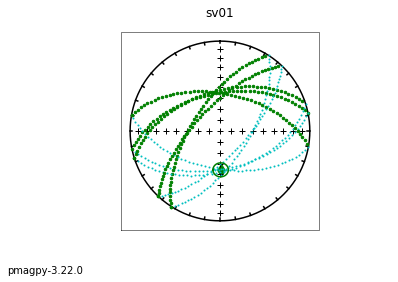

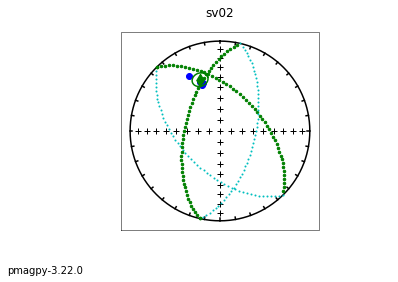

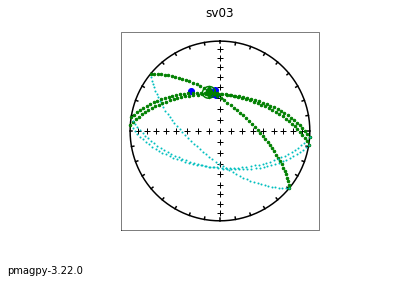

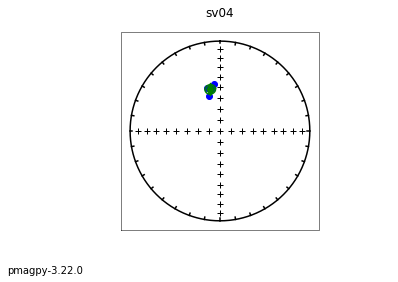

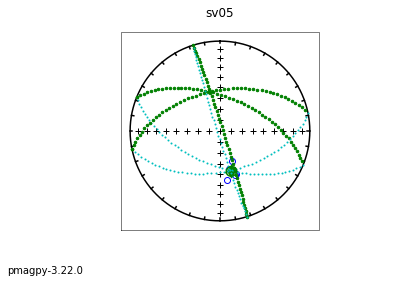

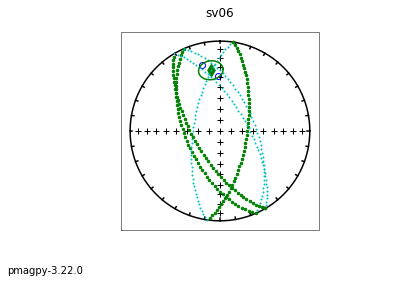

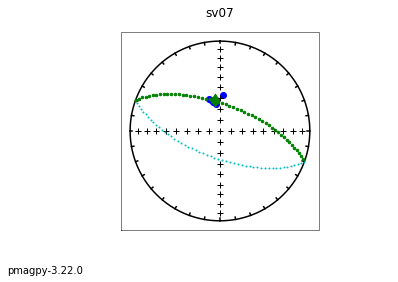

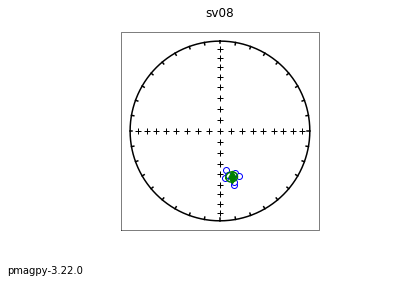

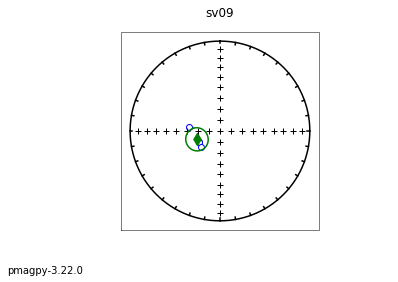

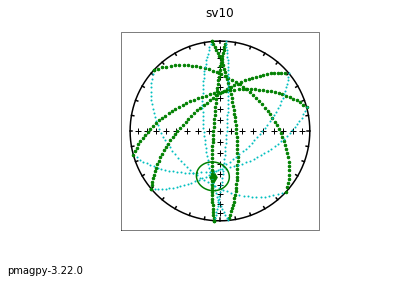

In [343]:
cnt=1
for site in sites[0:10]:
    site_data=spec_df[spec_df.site==site].to_dict('records')
    fpars=pmag.dolnp(site_data,'specimen_direction_type')
    pmagplotlib.plotLNP(cnt,site,site_data,fpars,'specimen_direction_type')
    cnt+=1


## lowes
This program generates a Lowes spectrum from igrf-like field models.  It will take a specified date, get the gauss coefficients from **pmag.doigrf()**, unpack them into a usable format with **pmag.unpack()** and calculate the spectrum with **pmag.lowes()**.  

In [344]:
help(pmag.doigrf)

Help on function doigrf in module pmagpy.pmag:

doigrf(lon, lat, alt, date, **kwargs)
    Calculates the interpolated (<2015) or extrapolated (>2015) main field and
    secular variation coefficients and passes them to the Malin and Barraclough
    routine (function pmag.magsyn) to calculate the field from the coefficients.
    
    Parameters:
    -----------
    lon  : east longitude in degrees (0 to 360 or -180 to 180)
    lat   : latitude in degrees (-90 to 90)
    alt   : height above mean sea level in km (itype = 1 assumed)
    date  : Required date in years and decimals of a year (A.D.)
    
    Optional Parameters:
    -----------
    coeffs : if True, then return the gh coefficients
    mod  : model to use ('arch3k','cals3k','pfm9k','hfm10k','cals10k.2','cals10k.1b)
        arch3k (Korte et al., 2009)
        cals3k (Korte and Constable, 2011)
        cals10k.1b (Korte et al., 2011)
        pfm9k  (Nilsson et al., 2014)
        hfm.OL1.A1 (Constable et al., 2016)
        cals1

In [345]:
help(pmag.unpack)

Help on function unpack in module pmagpy.pmag:

unpack(gh)
     unpacks gh list into l m g h type list
     
     Parameters
     _________
     gh : list of gauss coefficients (as returned by, e.g., doigrf)
    
     Returns
    data : nested list of [[l,m,g,h],...]



In [346]:
help(pmag.lowes)

Help on function lowes in module pmagpy.pmag:

lowes(data)
    gets Lowe's power spectrum  from gauss coefficients
    
    Parameters
    _________
    data : nested list of [[l,m,g,h],...] as from pmag.unpack()
    
    Returns
    _______
    Ls : list of degrees (l) 
    Rs : power at  degree l



So let's do it!

In [347]:
date=1956
coeffs=pmag.doigrf(0,0,0,date,coeffs=1)
data=pmag.unpack(coeffs)
Ls,Rs=pmag.lowes(data)


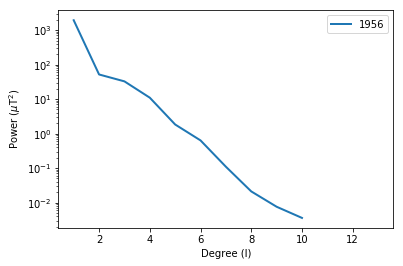

In [348]:
plt.plot(Ls,Rs,linewidth=2,label=str(date))
plt.semilogy()
plt.xlabel('Degree (l)')
plt.ylabel('Power ($\mu$T$^2$)')
plt.legend();



## lowrie and lowrie_magic
Both of these just take specimen level 3D-IRM data, break them into cartesian coordinates and plot the different components versus demagnetizing temperature.  We can just do this with our powerful Pandas and matplotlib.  
The relevent MagIC database method code is 'LP-IRM-3D', magnetization code is one of the usual, but in this example it is 'magn_moment' and the temperature step is the usual data model 3.0 ('treat_temp') in kelvin.
We will use **pmag.dir2cart()** for the heavy lifting.  I also happen to know (because I wrote the original paper), that X was the 1.0 tesla step, Y was 0.5 tesla and Z was .1 tesla, so we can put these in the legend. 

In [349]:
help(pmag.dir2cart)

Help on function dir2cart in module pmagpy.pmag:

dir2cart(d)
    Converts a list or array of vector directions in degrees (declination,
    inclination) to an array of the direction in cartesian coordinates (x,y,z)
    
    Parameters
    ----------
    d : list or array of [dec,inc] or [dec,inc,intensity]
    
    Returns
    -------
    cart : array of [x,y,z]
    
    Examples
    --------
    >>> pmag.dir2cart([200,40,1])
    array([-0.71984631, -0.26200263,  0.64278761])



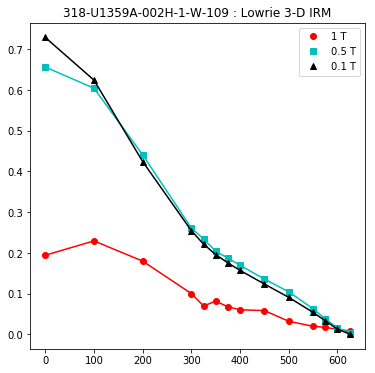

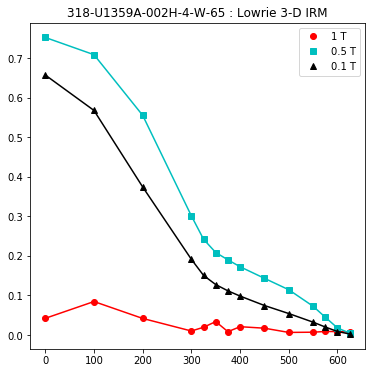

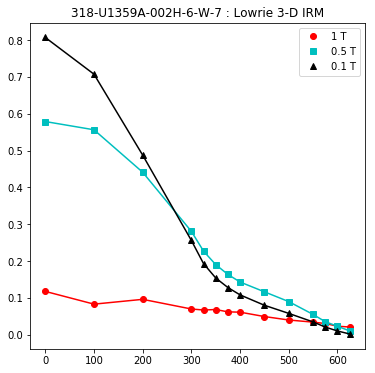

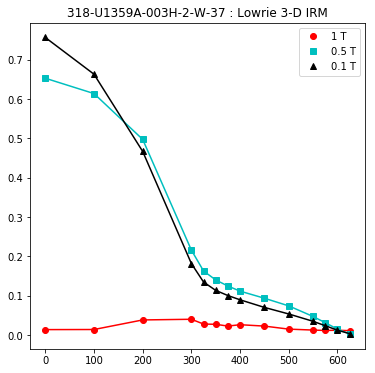

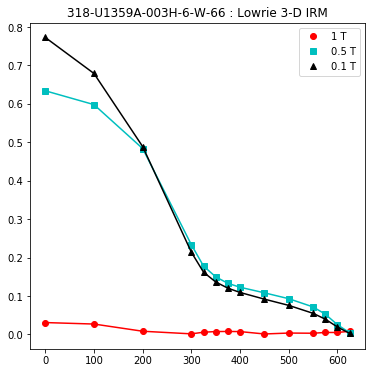

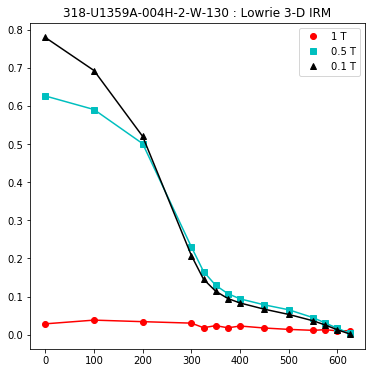

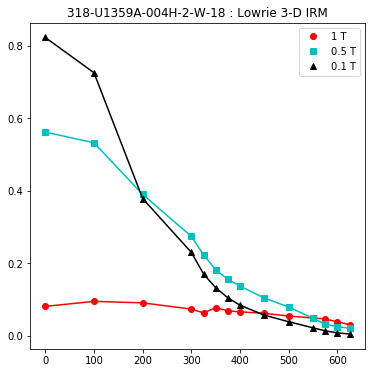

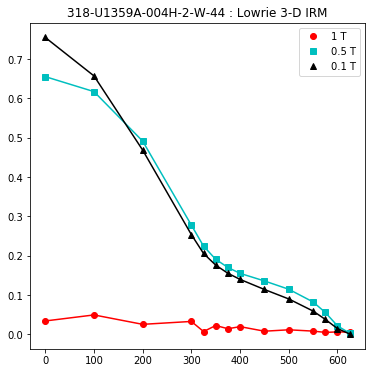

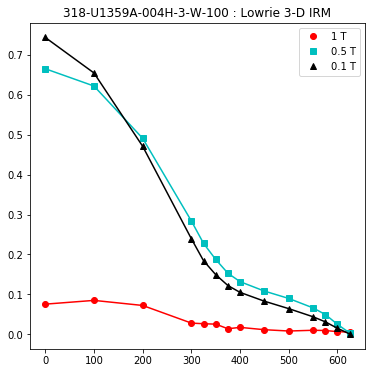

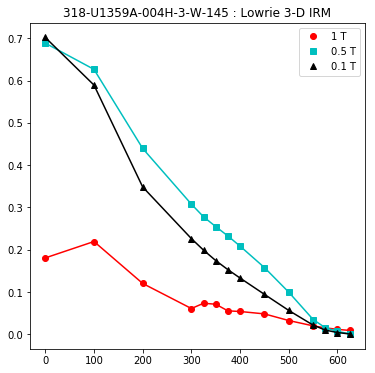

In [350]:
# read in the data file
meas_df=pd.read_csv('../lowrie_magic/measurements.txt',sep='\t',header=1)
# pick out the 3d-IRM data
meas_df=meas_df[meas_df.method_codes.str.contains('LP-IRM-3D')]
# get a list of specimen names
specimens=meas_df.specimen.unique()
cnt=1 # set figure counter
for specimen in specimens[0:10]: # step through first 10
    spec_df=meas_df[meas_df.specimen==specimen] # collect this specimen's data    
    dirs=np.array(spec_df[['dir_dec','dir_inc','magn_moment']])
    norm=dirs[0][2] # let's normalize to the initial intensity
    carts=np.absolute((pmag.dir2cart(dirs)/norm)).transpose() # get the X,Y,Z data
    temps=spec_df['treat_temp']-273 # convert to Celcius
    plt.figure(cnt,(6,6))
    plt.plot(temps,carts[0],'ro',label='1 T')
    plt.plot(temps,carts[0],'r-')
    plt.plot(temps,carts[1],'cs',label='0.5 T')
    plt.plot(temps,carts[1],'c-')
    plt.plot(temps,carts[2],'k^',label='0.1 T')
    plt.plot(temps,carts[2],'k-')
    plt.title(specimen+' : Lowrie 3-D IRM')
    plt.legend();
    cnt+=1

        

## magic_select
This program is a relect from the dark ages before Pandas.  So, to do this is easy-peasy.

Note to output into a MagIC formatted file, we can change the DataFrame to a list of dictionaries and
use **pmag.magic_write()**.. 

In [351]:
help(pmag.magic_write)

Help on function magic_write in module pmagpy.pmag:

magic_write(ofile, Recs, file_type)
    Parameters
    _________
    ofile : path to output file
    Recs : list of dictionaries in MagIC format
    file_type : MagIC table type (e.g., specimens)
    
    Return :
    [True,False] : True if successful
    ofile : same as input 
    
    Effects :
        writes a MagIC formatted file from Recs



In [352]:
# read in the data file
spec_df=pd.read_csv('../magic_select/specimens.txt',sep='\t',header=1)
# pick out the desired data 
method_key='method_codes' # change to method_codes for data model 3
spec_df=spec_df[spec_df.method_codes.str.contains('LP-DIR-AF')]
specs=spec_df.to_dict('records') # export to list of dictionaries
success,ofile=pmag.magic_write('../magic_select/AF_specimens.txt',specs,'pmag_specimens') # specimens for data model 3.0


76  records written to file  ../magic_select/AF_specimens.txt


## orientation_magic
This program calls **ipmag.orientation_magic()** which we can do here as well. 

In [353]:
help(ipmag.orientation_magic)

Help on function orientation_magic in module pmagpy.ipmag:

orientation_magic(or_con=1, dec_correction_con=1, dec_correction=0, bed_correction=True, samp_con='1', hours_from_gmt=0, method_codes='', average_bedding=False, orient_file='orient.txt', samp_file='er_samples.txt', site_file='er_sites.txt', output_dir_path='.', input_dir_path='.', append=False, data_model=2)
        use this function to convert tab delimited field notebook information to MagIC formatted tables (er_samples and er_sites)
    
        INPUT FORMAT
            Input files must be tab delimited and have in the first line:
    tab  location_name
            Note: The "location_name" will facilitate searching in the MagIC database. Data from different
                "locations" should be put in separate files.  The definition of a "location" is rather loose.
                 Also this is the word 'tab' not a tab, which will be indicated by '        '.
            The second line has the names of the columns (tab del

 We need to know which orientation convention was used to take the samples (it was with a Pomeroy, so, the default).  We want to use the igrf calculated magnetic declination at each site (so dec_correction_con=1, the default).  These samples were collected in Antarctica with a local time of GMT+13, so we need to subtract 13 hours so hours_from_gmt should be 13.  we are using data model 3.0 for this notebook, so data_model=3.  Also, input_dir_path and output_dir_path are both ../orientation_magic.  

In [2]:
ipmag.orientation_magic(input_dir_path='../orientation_magic',orient_file='orient_example.txt',\
                        hours_from_gmt=13,data_model=3,output_dir_path='../orientation_magic')

setting location name to ""
setting location name to ""
saving data...
24  records written to file  ../orientation_magic/samples.txt
2  records written to file  ../orientation_magic/sites.txt
Data saved in  ../orientation_magic/samples.txt  and  ../orientation_magic/sites.txt


(True, None)

## pca
This program reads in a typical measurement file with fields:

specimen treatment_step intensity dec inc

as  a space delimited file and calculates the principal components and Kirschvink MAD values for either a best-fit line or plane calculation.  It calls **pmag.domean()**, so that is what we will do here. 

In [355]:
help(pmag.domean)

Help on function domean in module pmagpy.pmag:

domean(data, start, end, calculation_type)
    Gets average direction using Fisher or principal component analysis (line
    or plane) methods
    
    Parameters
    ----------
    data : nest list of data: [[treatment,dec,inc,int,quality],...]
    start : step being used as start of fit (often temperature minimum)
    end : step being used as end of fit (often temperature maximum)
    calculation_type : string describing type of calculation to be made
    'DE-BFL' (line), 'DE-BFL-A' (line-anchored), 'DE-BFL-O' (line-with-origin),
    'DE-BFP' (plane), 'DE-FM' (Fisher mean)
    
    Returns
    -------
    mpars : dictionary with the keys "specimen_n","measurement_step_min",
    "measurement_step_max","specimen_mad","specimen_dec","specimen_inc"



In [356]:
# read in data as space delimited file
data=pd.read_csv('../pca/pca_example.txt',\
                 delim_whitespace=True,header=None)
# we need to add a column for quality
data['quality']='g'
# strip off the specimen name and reorder records 
#  from:  int,dec,inc to: dec,inc,int 
data=data[[1,3,4,2,'quality']].values.tolist()
pmag.domean(data,1,10,'DE-BFL')

{'calculation_type': 'DE-BFL',
 'center_of_mass': [1.9347888195464598e-05,
  -2.1736620227095438e-05,
  2.5042313896882542e-05],
 'measurement_step_max': 70.0,
 'measurement_step_min': 2.5,
 'specimen_dang': 19.257783100769142,
 'specimen_dec': 334.90583361559271,
 'specimen_direction_type': 'l',
 'specimen_inc': 51.509732357905229,
 'specimen_mad': 8.7537005016001199,
 'specimen_n': 10}

## plotXY
This can be done directly with matplotlib.

## plot_cdf and plot_2cdfs

This program reads in a data file, sorts it and plots it (using **pmagplotlib.plotCDF()**.  But we can do this directly from within the notebook without much fuss. And for plot_2cdfs, just do this twice.  


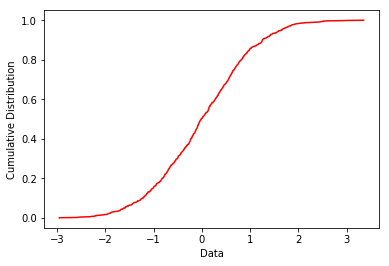

In [357]:
# read the data in
data=np.loadtxt('../plot_cdf/gaussian.out')
# sort the data
x=np.sort(data)
# create a y array
y=np.linspace(0,1,data.shape[0])
plt.plot(x,y,'r-')
# label
plt.xlabel('Data')
plt.ylabel('Cumulative Distribution');

## plot_geomagia

This program was meant to plot data from files downloaded from the geomagia website.  We can do this within the notebook.  This particular data set was for Sicily so if we felt like it, we could combine it with the **ipmag.igrf()**.  

In [358]:
geomagia=pd.read_csv('../geomagia/geomagia_sel.txt',header=1)
geomagia.head()

,Age[yr.AD],Sigma-ve[yr.],Sigma+ve[yr.],SigmaAgeID,N_Ba,n_Ba[meas.],n_Ba[acc.],Ba[microT],SigmaBa[microT],VDM[E22_AmE2],...,SpecTypeID,RefID,CompilationID,UploadMonth,UploadYear,Uploader,Editor,LastEditDate,C14ID,UID
0,1607,-9999,-9999,1,-999,-999,-999,-999.0,-999.0,-999.00,...,3,36,1005,-999,2009,Fabio Donadini,Maxwell Brown,24/07/2017,-1,857
1,1610,10,10,1,-999,-999,-999,-999.0,-999.0,-999.00,...,0,259,1001,-999,2009,Fabio Donadini,-999,-999,-1,5666
2,1610,-9999,-9999,1,1,-999,5,42.1,3.2,6.74,...,3,36,1001;1006;1010,-999,2007,Fabio Donadini,Maxwell Brown,24/07/2017,-1,858
3,1610,5,5,1,1,-999,4,40.5,8.1,-999.00,...,1,57,1001;1006;1010;1011,-999,2007,Fabio Donadini,-999,-999,-1,1403
4,1614,-9999,-9999,1,1,-999,5,40.8,3.2,-999.00,...,3,36,1001;1006;1010,-999,2007,Fabio Donadini,Maxwell Brown,24/07/2017,-1,836


We have to 'clean' the dataset by getting rid of the records with no inclinations (-999)  We can use Panda's filtering power for that: 

In [359]:
geomagia_incs=geomagia[geomagia['Inc[deg.]']>-90]
geomagia_incs['Inc[deg.]']

0     62.8
1     60.0
2     65.1
5     65.0
6     61.5
7     61.6
9     61.4
10    57.5
11    62.2
12    57.3
13    60.7
14    62.5
15    60.4
17    61.8
18    63.3
19    64.0
20    65.4
21    64.1
22    57.7
23    54.2
24    54.2
25    56.6
26    58.3
28    56.1
29    57.9
31    53.2
32    54.8
35    55.7
37    51.5
38    52.0
42    50.5
43    49.8
44    49.8
46    51.7
48    51.3
50    50.7
51    49.0
52    51.6
53    52.3
56    50.9
59    49.0
Name: Inc[deg.], dtype: float64

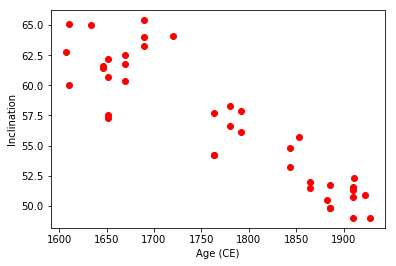

In [360]:
plt.plot(geomagia_incs['Age[yr.AD]'],geomagia_incs['Inc[deg.]'],'ro')
plt.xlabel('Age (CE)')
plt.ylabel('Inclination');

## plot_magmap
This program calls **pmag.do_mag_map())** to generate arrays for plotting the **pmagplotlib.plot_mag_map()** function.   We can do that from within this notebook.  You must have Basemap installed for this application.  

In [361]:
help(pmag.do_mag_map)

Help on function do_mag_map in module pmagpy.pmag:

do_mag_map(date, **kwargs)
    returns lists of declination, inclination and intensities for lat/lon grid for
    desired model and date.
    
    Parameters:
    _________________
    date = Required date in decimal years (Common Era, negative for Before Common Era)
    
    Optional Parameters:
    ______________
    mod  = model to use ('arch3k','cals3k','pfm9k','hfm10k','cals10k.2','cals10k.1b','custom')
    file = l m g h formatted filefor custom model
    lon_0 : central longitude for Hammer projection
    
    alt  = altitude
    
    Returns:
    ______________
    Bdec=list of declinations
    Binc=list of inclinations
    B = list of total field intensities in nT
    Br = list of radial field intensities
    lons = list of longitudes evaluated
    lats = list of latitudes evaluated



In [362]:
# define some useful parameters
date,mod,lon_0,alt,ghfile=1956.0725,'cals10k',0,0,"" # only date is required
Ds,Is,Bs,Brs,lons,lats=pmag.do_mag_map(date,mod=mod,lon_0=lon_0,alt=alt,file=ghfile)

In [363]:
if basemap_present:
    help(pmagplotlib.plot_mag_map)

Help on function plot_mag_map in module pmagpy.pmagplotlib:

plot_mag_map(fignum, element, lons, lats, element_type, cmap='RdYlBu', lon_0=0, date='')
    makes a color contour map of geomagnetic field element
    
    Parameters
    ____________
    fignum : matplotlib figure number
    element : field element array from pmag.do_mag_map for plotting
    lons : longitude array from pmag.do_mag_map for plotting
    lats : latitude array from pmag.do_mag_map for plotting
    element_type : [B,Br,I,D] geomagnetic element type
        B : field intensity
        Br : radial field intensity
        I : inclinations
        D : declinations
    Optional
    _________
        cmap : matplotlib color map
        lon_0 : central longitude of the Hammer projection
        date : date used for field evaluation,
               if custom ghfile was used, supply filename
    
    Effects
    ______________
    plots a Hammer projection color contour with  the desired field element



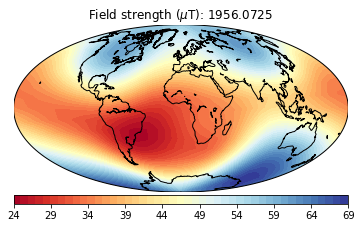

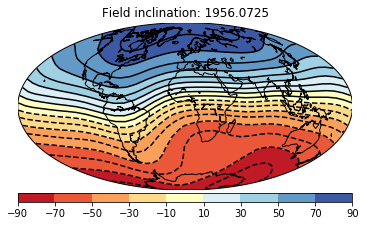

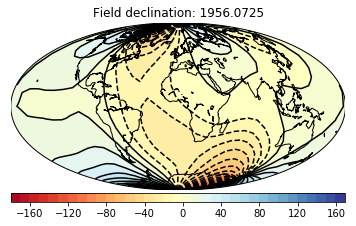

In [364]:
cmap='RdYlBu' # nice color map for contourf
if basemap_present:
    pmagplotlib.plot_mag_map(1,Bs,lons,lats,'B',date=date)
    pmagplotlib.plot_mag_map(2,Is,lons,lats,'I',date=date)
    pmagplotlib.plot_mag_map(3,Ds,lons,lats,'D',date=date)

## plot_map_pts
This program sets  a bunch of options and calls **pmagplotlib.plotMAP()**.  Note, if Basemap is not installed, you can use **pmagplotlib.plot_map()** instead which uses the newer (and buggier and slower) **cartopy** plotting package.   


In [365]:
help(pmagplotlib.plotMAP)

Help on function plotMAP in module pmagpy.pmagplotlib:

plotMAP(fignum, lats, lons, Opts)
    plotMAP(fignum, lats,lons,Opts)
    makes a basemap with lats/lons
        Windows 10 users, see plot_map
    Parameters:
    _______________
    fignum : matplotlib figure number
    lats : array or list of latitudes
    lons : array or list of longitudes
    Opts : dictionary of plotting options:
        Opts.keys=
            latmin : minimum latitude for plot
            latmax : maximum latitude for plot
            lonmin : minimum longitude for plot
            lonmax : maximum longitude
            lat_0 : central latitude
            lon_0 : central longitude
            proj : projection [basemap projections, e.g., moll=Mollweide, merc=Mercator, ortho=orthorhombic,
                lcc=Lambert Conformal]
            sym : matplotlib symbol
            symsize : symbol size in pts
            edge : markeredgecolor
            pltgrid : plot the grid [1,0]
            res :  resolution

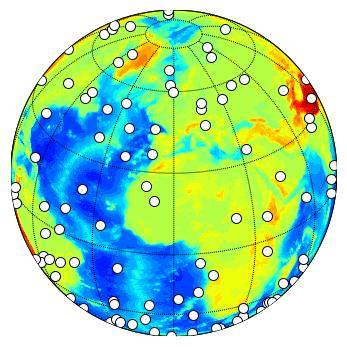

In [366]:
# read in some data: 
data=np.loadtxt('../plot_mapPTS/uniform.out').transpose()
lons=data[0]
lats=data[1]
# set some options 
Opts={}
Opts['sym']='wo' # sets the symbol
Opts['symsize']=10
Opts['proj']='ortho'
Opts['lat_0']=30
Opts['details']={}
Opts['details']['fancy']=True # requires etopo to be installed
if basemap_present:
    plt.figure(1,(6,6)) # optional - make a map
    pmagplotlib.plotMAP(1, lats, lons, Opts)
    

## plotdi_a
We can use the function **ipmag.plot_di_mean()** for this.  


In [367]:
help(ipmag.plot_di_mean)

Help on function plot_di_mean in module pmagpy.ipmag:

plot_di_mean(dec, inc, a95, color='k', marker='o', markersize=20, label='', legend='no')
    Plot a mean direction (declination, inclination) with alpha_95 ellipse on
    an equal area plot.
    
    Before this function is called, a plot needs to be initialized with code
    that looks something like:
    >fignum = 1
    >plt.figure(num=fignum,figsize=(10,10),dpi=160)
    >ipmag.plot_net(fignum)
    
    Required Parameters
    -----------
    dec : declination of mean being plotted
    inc : inclination of mean being plotted
    a95 : a95 confidence ellipse of mean being plotted
    
    Optional Parameters (defaults are used if not specified)
    -----------
    color : the default color is black. Other colors can be chosen (e.g. 'r').
    marker : the default is a circle. Other symbols can be chosen (e.g. 's').
    markersize : the default is 20. Other sizes can be chosen.
    label : the default is no label. Labels can be assi

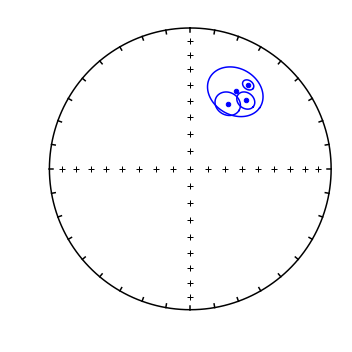

In [368]:
# read in some data
data=np.loadtxt('../plotdi_a/plotdi_a_example.dat').transpose()
decs=data[0] # array of declinations
incs=data[1] # array of inclinations
a95s=data[2] # array of alpha95s
# make the plots
fignum=1
plt.figure(num=fignum,figsize=(5,5))
ipmag.plot_net(fignum)
for pt in range(decs.shape[0]): # step through the data
    ipmag.plot_di_mean(dec=decs[pt],inc=incs[pt],a95=a95s[pt],color='blue')


## polemap_magic
We can use **ipmag.plot_vgp()** for this, but substituting paleomagnetic poles for VGPs (the math is the same).  We'll try this out on a set of poles downloaded from the MagIC database for the Cretaceous of Europe.   


In [369]:
help(ipmag.plot_vgp)

Help on function plot_vgp in module pmagpy.ipmag:

plot_vgp(mapname, vgp_lon=None, vgp_lat=None, di_block=None, label='', color='k', marker='o', markersize=20, legend='no')
    This function plots a paleomagnetic pole on whatever current map projection
    has been set using the basemap plotting library.
    
    Before this function is called, a plot needs to be initialized with code
    that looks something like:
    >from mpl_toolkits.basemap import Basemap
    >mapname = Basemap(projection='ortho',lat_0=35,lon_0=200)
    >plt.figure(figsize=(6, 6))
    >mapname.drawcoastlines(linewidth=0.25)
    >mapname.fillcontinents(color='bisque',lake_color='white',zorder=1)
    >mapname.drawmapboundary(fill_color='white')
    >mapname.drawmeridians(np.arange(0,360,30))
    >mapname.drawparallels(np.arange(-90,90,30))
    
    Required Parameters
    -----------
    mapname : the name of the current map that has been developed using basemap
    plon : the longitude of the paleomagnetic pole bei

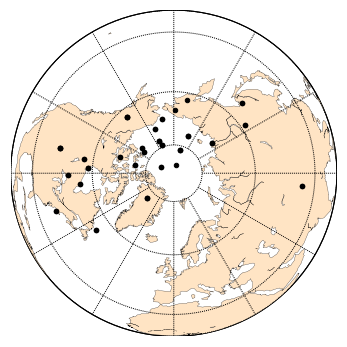

In [370]:
data=pd.read_csv('../polemap_magic/locations.txt',sep='\t',header=1)
lats=data['pole_lat'].values
lons=data['pole_lon'].values
if basemap_present:
    m = Basemap(projection='ortho',lat_0=90,lon_0=0)
    plt.figure(figsize=(6, 6))
    m.drawcoastlines(linewidth=0.25)
    m.fillcontinents(color='bisque',lake_color='white',zorder=1)
    m.drawmapboundary(fill_color='white')
    m.drawmeridians(np.arange(0,360,30))
    m.drawparallels(np.arange(-90,90,30))
    ipmag.plot_vgp(m, vgp_lon=lons, vgp_lat=lats, color='k', marker='o', \
                   markersize=20, legend='no')

## pt_rot
This program finds rotation poles for you using the function **frp.get_pole()** in the finite rotation pole module called **pmagpy.frp** and then calls **pmag.PTrot()** to do the rotation.  Let's do this for to rotate the Cretaceous poles from Europe (sane data as in the polemap_magic example) and rotate them to South African coordinates.  


In [371]:
# need to load this special module
import pmagpy.frp as frp
help(frp.get_pole)

Help on function get_pole in module pmagpy.frp:

get_pole(continent, age)
    returns rotation poles and angles for specified continents and ages
    assumes fixed Africa.  
    Parameters
    __________
        continent : 
            aus : Australia
            eur : Eurasia
            mad : Madacascar
            [nwaf,congo] : NW Africa  [choose one]
            col :  Colombia
            grn : Greenland
            nam : North America
            par : Paraguay
            eant :  East Antarctica
            ind : India
            [neaf,kala] : NE Africa [choose one]
            [sac,sam] :  South America [choose one]
            ib : Iberia
            saf : South Africa
      Returns
      _______
          [pole longitude, pole latitude, rotation angle] : for the continent at specified age



In [372]:
Prot=frp.get_pole('eur',100)
Prot

[40.2, -12.5, 28.5]

In [373]:
help(pmag.PTrot)

Help on function PTrot in module pmagpy.pmag:

PTrot(EP, Lats, Lons)
    Rotates points on a globe by an Euler pole rotation using method of
    Cox and Hart 1986, box 7-3.
    
    Parameters
    ----------
    EP : Euler pole list [lat,lon,angle]
    Lats : list of latitudes of points to be rotated
    Lons : list of longitudes of points to be rotated
    
    Returns
    _________
    RLats : rotated latitudes
    RLons : rotated longitudes



In [374]:
data=pd.read_csv('../polemap_magic/locations.txt',sep='\t',header=1)
lats=data['pole_lat'].values
lons=data['pole_lon'].values
RLats,RLons=rot_pts=pmag.PTrot(Prot,lats,lons)

And now we can plot them using **pmagplotlib.plotMAP()**

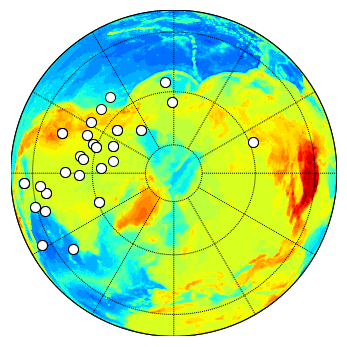

In [375]:
Opts={}
Opts['sym']='wo' # sets the symbol
Opts['symsize']=10
Opts['proj']='ortho'
Opts['lat_0']=90
Opts['details']={}
Opts['details']['fancy']=True # requires etopo to be installed
if basemap_present:
    plt.figure(1,(6,6)) # optional - make a map
    pmagplotlib.plotMAP(1, RLats, RLons, Opts)
    

## qqplot
This program reads in a data file and calls **pmagplotlib.plotQQnorm()**. Let's reprise the **gaussian.py** example from before and test if the data are in fact likely to be gaussian.    


In [376]:
data=list(pmag.gaussdev(10,3,100))

In [377]:
help(pmagplotlib.plotQQnorm)

Help on function plotQQnorm in module pmagpy.pmagplotlib:

plotQQnorm(fignum, Y, title)
    makes a Quantile-Quantile plot for data
    Parameters
    _________
    fignum : matplotlib figure number
    Y : list or array of data
    title : title string for plot
    
    Returns
    ___________
    d,dc : the values for D and Dc (the critical value)
       if d>dc, likely to be normally distributed (95\% confidence)



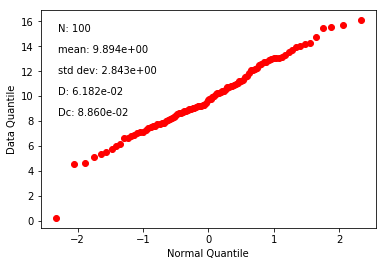

In [378]:
D,Dd=pmagplotlib.plotQQnorm(1,data,'')

## qqunf
This program is very much like **qqplot** and **fishqq** which plot data against a normal and fisherian distributions respectively.  In fact **fishqq** plots the declination values against a uniform distribution just like **qqunf**.  **qqunf** calls **pmagplotlib.plotQQunf()**.  To demonstrate the functionality of **qqplot**, we can generate a simulated data set with **random.uniform()**, inspect it with a histogram and then test whether it is likely to actually have been drawn from a uniform distribution (95% confidence) using **pmagplotlib.plotQQunf()**.

(array([ 0.00614487,  0.00512073,  0.01228974,  0.01433803,  0.01024145,
         0.01024145,  0.00716902,  0.01228974,  0.00921731,  0.01536218]),
 array([  1.99108476,  11.75532592,  21.51956709,  31.28380825,
         41.04804941,  50.81229057,  60.57653174,  70.3407729 ,
         80.10501406,  89.86925522,  99.63349638]),
 <a list of 1 Patch objects>)

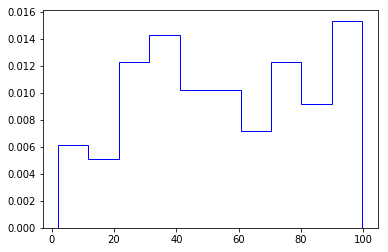

In [379]:
import numpy.random as random
uniform=random.uniform(0,100,size=100)
plt.hist(uniform,histtype='step',color='blue',normed=1,facecolor='white')

In [380]:
help(pmagplotlib.plotQQunf_test)

Help on function plotQQunf_test in module pmagpy.pmagplotlib:

plotQQunf_test(fignum, D, title, subplot=False, degrees=True)
    plots data against a uniform distribution in 0=>360.
    Parameters
    _________
    fignum : matplotlib figure number
    D : data
    title : title for plot
    subplot : if True, make this number one of two subplots
    degrees : if True, assume that these are degrees
    
    Return
    Mu : Mu statistic (Fisher et al., 1987)
    Mu_crit : critical value of Mu for uniform distribution 
    
    Effect
    ______
    makes a Quantile Quantile plot of data



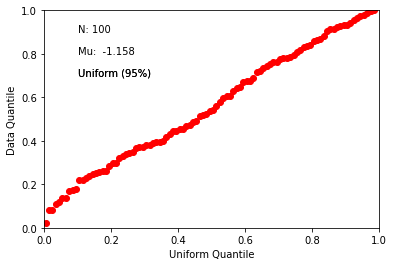

In [381]:
Mu,Mu_0=pmagplotlib.plotQQunf(1,uniform,"",degrees=False)

## revtest
This has been implemented for notebooks as **ipmag.reversal_test_bootstrap())**.  

In [382]:
help(ipmag.reversal_test_bootstrap)

Help on function reversal_test_bootstrap in module pmagpy.ipmag:

reversal_test_bootstrap(dec=None, inc=None, di_block=None, plot_stereo=False, save=False, save_folder='.', fmt='svg')
    Conduct a reversal test using bootstrap statistics (Tauxe, 2010) to
    determine whether two populations of directions could be from an antipodal
    common mean.
    
    Parameters
    ----------
    dec: list of declinations
    inc: list of inclinations
        or
    di_block: a nested list of [dec,inc]
        A di_block can be provided in which case it will be used instead of
        dec, inc lists.
    
    plot_stereo : before plotting the CDFs, plot stereonet with the
        bidirectionally separated data (default is False)
    save : boolean argument to save plots (default is False)
    save_folder : directory where plots will be saved (default is current directory, '.')
    fmt : format of saved figures (default is 'svg')
    
    Returns
    -------
    plots : Plots of the cumulative d

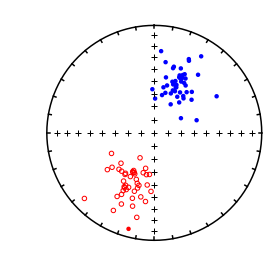

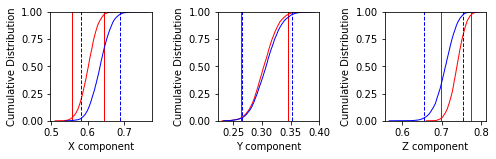

In [383]:
di_block=np.loadtxt('../revtest/revtest_example.txt')
ipmag.reversal_test_bootstrap(di_block=di_block,plot_stereo=True)

## revtest_magic
This is the same idea as **revtest.py** but reads in MagIC formatted data files.  

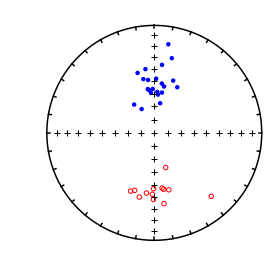

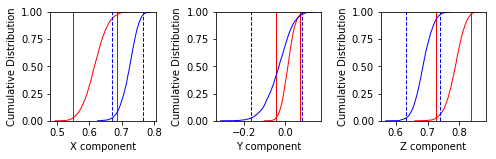

In [384]:
data=pd.read_csv('../revtest_magic/sites.txt',sep='\t',header=1)
decs=data.dir_dec.values
incs=data.dir_inc.values
ipmag.reversal_test_bootstrap(dec=decs,inc=incs,plot_stereo=True)

## revtest_mm1990
this is the same as watsons_v - check that one out. 

## s_eigs
We can call the function **pmag.doseigs()** from the notebook.  


In [385]:
help(pmag.doseigs)

Help on function doseigs in module pmagpy.pmag:

doseigs(s)
    convert s format for eigenvalues and eigenvectors
    
    Parameters
    __________
    s=[x11,x22,x33,x12,x23,x13] : the six tensor elements
    
    Return
    __________
        tau : [t1,t2,t3]
           tau is an list of eigenvalues in decreasing order:
        V : [[V1_dec,V1_inc],[V2_dec,V2_inc],[V3_dec,V3_inc]]
            is an list of the eigenvector directions



In [386]:
Ss=np.loadtxt('../s_eigs/s_eigs_example.dat')
for s in Ss:
    tau,V=pmag.doseigs(s)
    print ('%f %8.2f %8.2f %f %8.2f %8.2f %f %8.2f %8.2f'%\
           (tau[2],V[2][0],V[2][1],tau[1],V[1][0],V[1][1],tau[0],V[0][0],V[0][1]))

0.331272   239.53    44.70 0.333513   126.62    21.47 0.335215    19.03    37.54
0.331779   281.12     6.18 0.332183   169.79    73.43 0.336039    12.82    15.32
0.330470   283.57    27.30 0.333283   118.37    61.91 0.336247    16.75     6.13
0.331238   261.36    12.07 0.333776   141.40    66.82 0.334986   355.70    19.48
0.330857   255.71     7.13 0.333792   130.85    77.65 0.335352   346.97    10.03
0.331759   268.51    26.79 0.334050   169.66    16.95 0.334190    51.04    57.53
0.331950   261.59    20.68 0.333133    92.18    68.99 0.334917   352.93     3.54
0.331576   281.42    21.32 0.333121   117.04    67.94 0.335303    13.54     5.41


## s_geo
This program calls **pmag.dosgeo()**.   


In [387]:
help(pmag.dosgeo)

Help on function dosgeo in module pmagpy.pmag:

dosgeo(s, az, pl)
    rotates  matrix a to az,pl returns  s
    Parameters
    __________
    s : [x11,x22,x33,x12,x23,x13] - the six tensor elements
    az : the azimuth of the specimen X direction
    pl : the plunge (inclination) of the specimen X direction
    
    Return
    s_rot : [x11,x22,x33,x12,x23,x13] - after rotation



In [388]:
Ss=np.loadtxt('../s_geo/s_geo_example.dat')
for s in Ss:
    print(pmag.dosgeo(s[0:6],s[6],s[7]))


[  3.34126800e-01   3.32827330e-01   3.33045870e-01  -1.52887253e-04
   1.24843325e-03   1.35721150e-03]
[  3.35563004e-01   3.31982642e-01   3.32454324e-01   8.72589299e-04
   2.41408459e-04   9.61661863e-04]
[  3.35849077e-01   3.31406265e-01   3.32744688e-01   1.31844613e-03
   1.18815608e-03   2.98639006e-05]
[ 0.33479756  0.33142531  0.33377719 -0.00047493  0.00049539  0.00044303]
[  3.35056126e-01   3.31148475e-01   3.33795398e-01  -1.01374777e-03
   2.85357179e-04   3.48516536e-04]
[  3.34061563e-01   3.32269162e-01   3.33669245e-01  -2.26655957e-05
   9.85477469e-04   5.55310689e-05]
[  3.34865957e-01   3.32160324e-01   3.32973689e-01  -3.54920368e-04
   3.92535498e-04   1.54027060e-04]
[  3.35106462e-01   3.31964016e-01   3.32929581e-01   7.59652874e-04
   5.72424440e-04   1.01121412e-04]


## s_hext
This puppy calls **pmag.dohext()**.   


In [389]:
help(pmag.dohext)

Help on function dohext in module pmagpy.pmag:

dohext(nf, sigma, s)
    calculates hext parameters for nf, sigma and s
    
    Parameters
    __________
    nf :  number of degrees of freedom (measurements - 6)
    sigma : the sigma of the measurements
    s : [x11,x22,x33,x12,x23,x13] - the six tensor elements
    
    Return
    hpars : dictionary of Hext statistics with keys:
        'F_crit' : critical value for anisotropy
        'F12_crit' : critical value for tau1>tau2, tau2>3
        'F' : value of F
        'F12' : value of F12
        'F23' : value of F23
        'v1_dec': declination of principal vector
        'v1_inc': inclinatino of principal vector
        'v2_dec': declination of principal vector
        'v2_inc': declination of principal vector
        'v3_dec': declination of principal vector
        'v3_inc': declination of principal vector
        't1': declination of principal vector
        't2': declination of principal vector
        't3': declination of princ

We are working with data that have no sigmas attached to them and want to average all the values in the file together.  Let's look at the rotated data from the **s_geo.py** example.  

In [390]:
# read in the data
Ss=np.loadtxt('../s_geo/s_geo_example.dat')
# make a container for the rotated S values
SGeos=[]
for s in Ss:
    SGeos.append(pmag.dosgeo(s[0:6],s[6],s[7]))
nf,sigma,avs=pmag.sbar(SGeos)  # get the average over all the data
hpars=pmag.dohext(nf,sigma,avs)
print(hpars)

{'F_crit': '2.4377', 'F12_crit': '3.2199', 'F': 5.7521670646667191, 'F12': 3.5510601243464004, 'F23': 3.6635575668687972, 'v1_dec': 5.3308943453032516, 'v1_inc': 14.682483596068828, 'v2_dec': 124.47233106679136, 'v2_inc': 61.717008370180423, 'v3_dec': 268.75792759495505, 'v3_inc': 23.599173682479822, 't1': 0.3350527, 't2': 0.33334228, 't3': 0.33160499, 'e12': 25.459836196376742, 'e23': 25.114754046379378, 'e13': 13.289774374288619}


## s_tilt.py 
This one calls **pmag.dostilt()**.  But be careful!  s_tilt.py assumes that the bedding info is the strike, with the dip to the right of strike!  So we have to do that to get the same answers

In [391]:
help(pmag.dostilt)

Help on function dostilt in module pmagpy.pmag:

dostilt(s, bed_az, bed_dip)
    Rotates "s" tensor to stratigraphic coordinates
    
    Parameters
    __________
    s : [x11,x22,x33,x12,x23,x13] - the six tensor elements
    bed_az : bedding dip direction
    bed_dip :  bedding dip
    
    Return
    s_rot : [x11,x22,x33,x12,x23,x13] - after rotation



In [392]:
# but the data in this example are Ss and strike and dip (not bed_az,bed_pl)
Ss=np.loadtxt('../s_tilt/s_tilt_example.dat')
for s in Ss:
    print(pmag.dostilt(s[0:6],s[6]+90.,s[7]))


[ 0.33455709  0.33192658  0.3335163  -0.00043562  0.00092779  0.00105006]
[  3.35855007e-01   3.31915647e-01   3.32229346e-01   5.59599721e-04
  -5.31614169e-05   6.47317735e-04]
[  3.35866690e-01   3.30849230e-01   3.33284080e-01   1.42266101e-03
   1.32339148e-04   9.20287566e-05]
[  3.34886640e-01   3.31384927e-01   3.33728433e-01  -5.65970084e-04
  -3.90853733e-04   4.87293910e-05]
[  3.35066020e-01   3.31270188e-01   3.33663732e-01  -1.05193025e-03
  -5.72566001e-04  -2.99594947e-04]
[  3.34076881e-01   3.31775665e-01   3.34147483e-01   7.00738892e-05
   1.84469245e-04   5.07318255e-05]
[  3.34839255e-01   3.31978530e-01   3.33182216e-01  -2.84465350e-04
   3.51849012e-05  -2.92616518e-04]
[  3.35131437e-01   3.31750363e-01   3.33118230e-01   7.79144117e-04
  -6.40219878e-05   4.61159470e-05]


## scalc
This program reads in data files with vgp_lon, vgp_lat and optional kappa, N, and si te latitude.
It does some filtering based on the requirements of the study, such as:
- Fisher k cutoff
- VGP latitudinal cutoff
- Vandamme (1994) cutoff
- flipping the reverse mode to antipodes
- rotating principle direction to the spin axis
- bootstrap confidence bounds
- optionally calculates the scatter (Sp or Sf of McElhinny & McFadden, 1997) of VGPs
with  correction for within site scatter.  

To do all this, it calls **pmag.scalc_vgp_df()** which works on a suitably constructed  **Pandas** DataFrame.   


In [393]:
help(pmag.scalc_vgp_df)

Help on function scalc_vgp_df in module pmagpy.pmag:

scalc_vgp_df(vgp_df, anti=0, rev=0, cutoff=180.0, kappa=0, n=0, spin=0, v=0, boot=0, mm97=0, nb=1000)
    Calculates Sf for a dataframe with VGP Lat., and optional Fisher's k, site latitude and N information can be used to correct for within site scatter (McElhinny & McFadden, 1997)
    
    Parameters
    _________
    df : Pandas Dataframe with columns
        REQUIRED:
        vgp_lat :  VGP latitude
        ONLY REQUIRED for MM97 correction:
        dir_k : Fisher kappa estimate
        dir_n_samples : number of samples per site
        lat : latitude of the site
        mm97 : if True, will do the correction for within site scatter
        OPTIONAL:
        boot : if True. do bootstrap
        nb : number of bootstraps, default is 1000  
    
    Returns
    _____________
        N : number of VGPs used in calculation
        S : S
        low : 95% confidence lower bound [0 if boot=0]    
        high  95% confidence upper bou

To just calculate the value of S (without the within site scatter) we read in a data file and attach the correct headers to it depending on what is in it.

In [395]:
vgp_df=pd.read_csv('../scalc/scalc_example.txt',delim_whitespace=True,header=None)
if len(list(vgp_df.columns))==2:
    vgp_df.columns=['vgp_lon','vgp_lat']
    vgp_df['dir_k'],vgp_df['dir_n'],vgp_df['lat']=0,0,0
else:
    vgp_df.columns=['vgp_lon','vgp_lat','dir_k','dir_n_samples','lat']
pmag.scalc_vgp_df
N,S_B,low,high,cutoff=pmag.scalc_vgp_df(vgp_df)
print(N, '%7.1f  %7.1f ' % (S_B, cutoff))




100    21.8    180.0 


To apply a cutoff for the Fisher k value, we just filter the DataFrame prior to calculating S_b. Let's filter for kappa>50

In [396]:
N,S_B,low,high,cutoff=pmag.scalc_vgp_df(vgp_df,kappa=50)
print(N, '%7.1f  %7.1f ' % (S_B, cutoff))




73    18.5    180.0 


To apply the Vandamme (1994) approach, we set v to True

In [397]:
N,S_B,low,high,cutoff=pmag.scalc_vgp_df(vgp_df,v=True)
print(N, '%7.1f  %7.1f ' % (S_B, cutoff))


89    15.2     32.3 


To flip the "reverse" directions, can set anti to 1

In [398]:
N,S_B,low,high,cutoff=pmag.scalc_vgp_df(vgp_df,anti=True)
print(N, '%7.1f  %7.1f ' % (S_B, cutoff))


flipping reverse
100    21.1    180.0 


And, to do relative to the spin axis: 

In [399]:
N,S_B,low,high,cutoff=pmag.scalc_vgp_df(vgp_df,spin=True)
print(N, '%7.1f  %7.1f ' % (S_B, cutoff))


100    21.6    180.0 


## scalc_magic
This program does the same thing as scalc, but reads in a MagIC formatted file. So, we can do that easy-peasy

In [400]:
vgp_df=pd.read_csv('../scalc_magic/sites.txt',sep='\t',header=1)
N,S_B,low,high,cutoff=pmag.scalc_vgp_df(vgp_df,anti=True)
print(N, '%7.1f  %7.1f ' % (S_B, cutoff))


flipping reverse
21    17.3    180.0 


In [401]:
vgp_df=pd.read_csv('../scalc_magic/sites.txt',sep='\t',header=1)
N,S_B,low,high,cutoff=pmag.scalc_vgp_df(vgp_df,anti=True,spin=True)
print(N, '%7.1f  %7.1f ' % (S_B, cutoff))

flipping reverse
21    16.8    180.0 


## squish
This program reads in dec/inc data and "squishes" the inclinations using the formula:  $\tan(I_o)=flat \tan(I_f)$.  It calls **pmag.squish()** and we can do that from within the notebook.  

In [402]:
help(pmag.squish)

Help on function squish in module pmagpy.pmag:

squish(incs, f)
    returns 'flattened' inclination, assuming factor, f and King (1955) formula:
    tan (I_o) = f tan (I_f)
    
    Parameters
    __________
    incs : array of inclination (I_f)  data to flatten
    f : flattening factor 
    
    Returns
    _______
    Io :  inclinations after flattening



In [403]:
di_block=np.loadtxt('../squish/squish_example.dat').transpose()
decs=di_block[0]
incs=di_block[1]
flat=.4
fincs=pmag.squish(incs,flat)

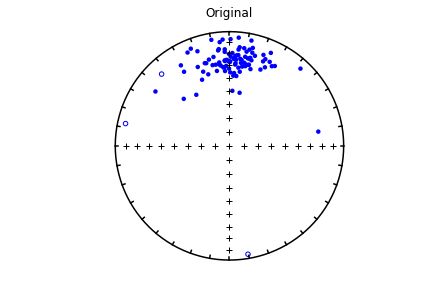

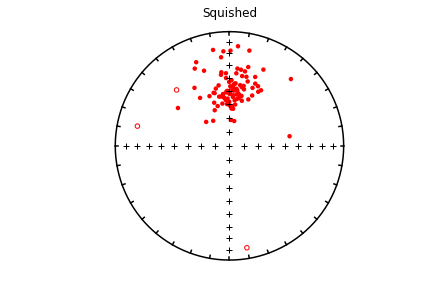

In [428]:
ipmag.plot_net(1)
ipmag.plot_di(dec=decs,inc=incs,title='Original',color='blue')
ipmag.plot_net(2)
ipmag.plot_di(dec=decs,inc=fincs,title='Squished',color='red')

## stats
This program just calculates the N, mean, sum, sigma and sigma % for data.  Obviously, there are numerous ways to do that in **Numpy**, so let's just use those.

In [405]:
data=np.loadtxt('../gaussian/gauss.out')
print (data.shape[0],data.mean(),data.sum(),data.std())

100 9.94986999 994.986999 0.953364486762


## strip_magic
This is program is a dinosaur and can be much more easily done using the wonders of **Pandas** and **matplotlib**.  

In [406]:
# read in the data
data=pd.read_csv('../strip_magic/sites.txt',sep='\t',header=1)
# see what's there
data.columns

Index(['site', 'location', 'age', 'age_unit', 'dir_dec', 'dir_inc',
       'core_depth', 'lat', 'lon', 'geologic_classes', 'geologic_types',
       'lithologies', 'citations', 'vgp_lat', 'vgp_lon', 'paleolatitude',
       'vgp_lat_rev', 'vgp_lon_rev'],
      dtype='object')

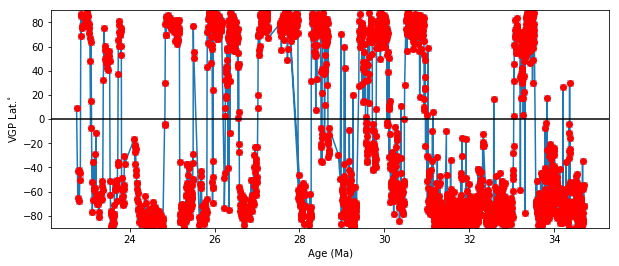

In [407]:
plt.figure(1,(10,4)) # make the figure
plt.plot(data.age,data.vgp_lat,'x-') # plot as blue line
plt.plot(data.age,data.vgp_lat,'ro') # plot as red dots
plt.xlabel('Age (Ma)') # label the time axis
plt.ylabel('VGP Lat.$^{\circ}$')
plt.ylim(-90,90) # set the plot limits
plt.axhline(color='black'); # put on a zero line

## sundec
This just calls the function **pmag.dosundec()**.  

In [408]:
help(pmag.dosundec)

Help on function dosundec in module pmagpy.pmag:

dosundec(sundata)
    returns the declination for a given set of suncompass data
    Parameters
    __________
      sundata : dictionary with these keys:
          date: time string with the format 'yyyy:mm:dd:hr:min'
          delta_u: time to SUBTRACT from local time for Universal time
          lat: latitude of location (negative for south)
          lon: longitude of location (negative for west)
          shadow_angle: shadow angle of the desired direction with respect to the sun.
    Returns
    ________
       sunaz : the declination of the desired direction wrt true north.



We will use the data in ../sundec/sundec_example.dat which was designed for input into the command line program

In [409]:
sundata={'delta_u':3,'lat':35,'lon':33,\
         'date':'1994:05:23:16:9','shadow_angle':68}
print ('%7.1f'%(pmag.dosundec(sundata)))


  154.2


## tk03
This program was implemented as **ipmag.tk03()**.  

In [410]:
help(ipmag.tk03)

Help on function tk03 in module pmagpy.ipmag:

tk03(n=100, dec=0, lat=0, rev='no', G2=0, G3=0)
    Generates vectors drawn from the TK03.gad model of secular
    variation (Tauxe and Kent, 2004) at given latitude and rotated
    about a vertical axis by the given declination. Return a nested list of
    of [dec,inc,intensity].
    
    Parameters
    ----------
    n : number of vectors to determine (default is 100)
    dec : mean declination of data set (default is 0)
    lat : latitude at which secular variation is simulated (default is 0)
    rev : if reversals are to be included this should be 'yes' (default is 'no')
    G2 : specify average g_2^0 fraction (default is 0)
    G3 : specify average g_3^0 fraction (default is 0)
    
    Returns
    ----------
    tk_03_output : a nested list of declination, inclination, and intensity (in nT)
    
    Examples
    --------
    >>> ipmag.tk03(n=5, dec=0, lat=0)
    [[14.752502674158681, -36.189370642603834, 16584.848620957589],
     [9.

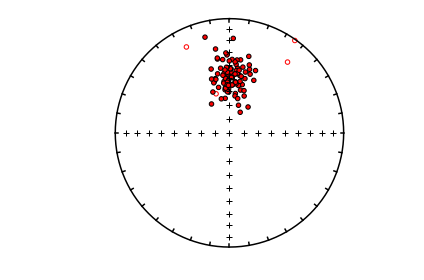

In [411]:
di_block=ipmag.tk03(lat=30)
ipmag.plot_net(1)
ipmag.plot_di(di_block=di_block,color='red',edge='black')

## uniform
This program calls **pmag.get_unf()**.   

In [412]:
help(pmag.get_unf)

Help on function get_unf in module pmagpy.pmag:

get_unf(N=100)
    Generates N uniformly distributed directions
    using the way described in Fisher et al. (1987).
    Parameters
    __________
    N : number of directions, default is 100
    
    Returns 
    ______
    array of nested dec,inc pairs



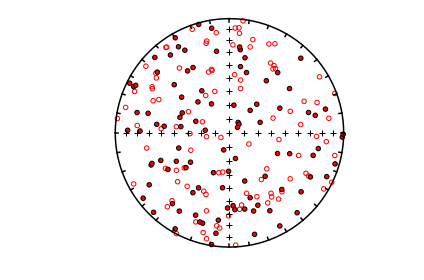

In [413]:
di_block=pmag.get_unf(N=200)
ipmag.plot_net(1)
ipmag.plot_di(di_block=di_block,color='red',edge='black')

## unsquish
This program is just the inverse of **squish.py** in that it takes "squished" data and "unsquishes" them, assuming a King (1955) relationship:  $\tan(I_o)=flat \tan(I_f)$. So, $\tan(I_f) = \tan(I_o)/flat$. 

In [414]:
help(pmag.unsquish)

Help on function unsquish in module pmagpy.pmag:

unsquish(incs, f)
    returns 'unflattened' inclination, assuming factor, f and King (1955) formula:
    tan (I_o) = tan (I_f)/f
    
    Parameters
    __________
    incs : array of inclination (I_f)  data to unflatten
    f : flattening factor 
    
    Returns
    _______
    Io :  inclinations after unflattening



In [415]:
di_block=np.loadtxt('../unsquish/unsquish_example.dat').transpose()
decs=di_block[0]
incs=di_block[1]
flat=.4
fincs=pmag.unsquish(incs,flat)

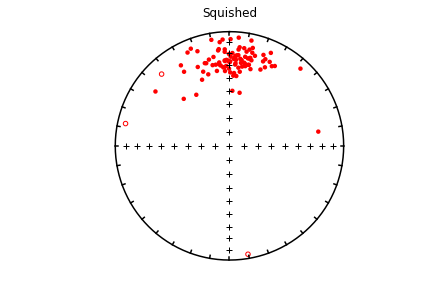

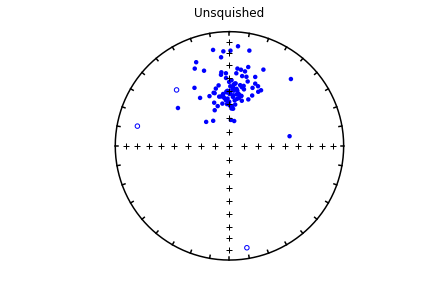

In [429]:
ipmag.plot_net(1)
ipmag.plot_di(dec=decs,inc=incs,title='Squished',color='red')
ipmag.plot_net(2)
ipmag.plot_di(dec=decs,inc=fincs,title='Unsquished',color='blue')

## vdm_b
This program calls **pmag.vdm_b()**.

In [417]:
help(pmag.vdm_b)

Help on function vdm_b in module pmagpy.pmag:

vdm_b(vdm, lat)
    Converts a virtual dipole moment (VDM) or a virtual axial dipole moment
    (VADM; input in units of Am^2) to a local magnetic field value (output in
    units of tesla)
    
    Parameters
    ----------
    vdm : V(A)DM in units of Am^2
    lat: latitude of site in degrees
    
    Returns
    -------
    B: local magnetic field strength in tesla



In [418]:
print ('%7.1f microtesla'%(pmag.vdm_b(7.159e22,22)*1e6))

   33.0 microtesla


## vector_mean
This program calls **pmag.vector_mean()**

In [419]:
help(pmag.vector_mean)

Help on function vector_mean in module pmagpy.pmag:

vector_mean(data)
    calculates the vector mean of a given set of vectors
    Parameters
    __________
    data :  nested array of [dec,inc,M]
    
    Returns
    _______
    dir : array of [dec, inc, 1]
    R : resultant vector length



In [420]:
data=np.loadtxt('../vector_mean/vector_mean_example.dat')
Dir,R=pmag.vector_mean(data)
print (('%i %7.1f %7.1f %f')%(data.shape[0],Dir[0],Dir[1],R))

100     1.3    49.6 2289431.981383


## vgp_di
This program calls **pmag.vgp_di()**.  

In [421]:

help(pmag.vgp_di)

Help on function vgp_di in module pmagpy.pmag:

vgp_di(plat, plong, slat, slong)
    Converts a pole position (pole latitude, pole longitude) to a direction
    (declination, inclination) at a given location (slat, slong) assuming a
    dipolar field.
    
    Parameters
    ----------
    plat : latitude of pole (vgp latitude)
    plong : longitude of pole (vgp longitude)
    slat : latitude of site
    slong : longitude of site
    
    Returns
    ----------
    dec,inc : tuple of declination and inclination



In [422]:
d,i=pmag.vgp_di(68,191,33,243)
print ('%7.1f %7.1f'%(d,i))

  335.6    62.9


## vgpmap_magic
This can be done using **ipmag.plot_vgp()** after reading in a MagIC formatted sites.txt file. NB: you could also use **pmagplotlib.plotMAP()** if more options are desired. 

In [423]:
help(ipmag.plot_vgp)

Help on function plot_vgp in module pmagpy.ipmag:

plot_vgp(mapname, vgp_lon=None, vgp_lat=None, di_block=None, label='', color='k', marker='o', markersize=20, legend='no')
    This function plots a paleomagnetic pole on whatever current map projection
    has been set using the basemap plotting library.
    
    Before this function is called, a plot needs to be initialized with code
    that looks something like:
    >from mpl_toolkits.basemap import Basemap
    >mapname = Basemap(projection='ortho',lat_0=35,lon_0=200)
    >plt.figure(figsize=(6, 6))
    >mapname.drawcoastlines(linewidth=0.25)
    >mapname.fillcontinents(color='bisque',lake_color='white',zorder=1)
    >mapname.drawmapboundary(fill_color='white')
    >mapname.drawmeridians(np.arange(0,360,30))
    >mapname.drawparallels(np.arange(-90,90,30))
    
    Required Parameters
    -----------
    mapname : the name of the current map that has been developed using basemap
    plon : the longitude of the paleomagnetic pole bei

In [424]:
data=pd.read_csv('../vgpmap_magic/sites.txt',sep='\t',header=1)
data.columns

Index(['age', 'age_sigma', 'age_unit', 'citations', 'conglomerate_test',
       'contact_test', 'criteria', 'description', 'dir_alpha95', 'dir_dec',
       'dir_inc', 'dir_k', 'dir_n_samples', 'dir_nrm_origin', 'dir_polarity',
       'dir_r', 'dir_tilt_correction', 'int_abs', 'int_abs_sigma',
       'int_n_samples', 'lat', 'location', 'lon', 'method_codes',
       'result_type', 'site', 'specimens', 'vadm', 'vadm_sigma', 'vgp_dm',
       'vgp_dp', 'vgp_lat', 'vgp_lon', 'vgp_n_samples'],
      dtype='object')

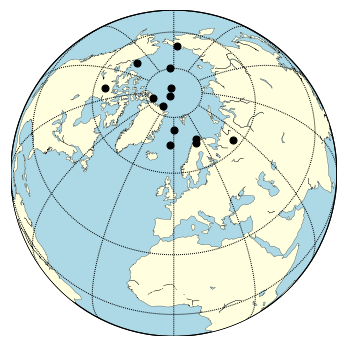

In [425]:
lats=data['vgp_lat'].values
lons=data['vgp_lon'].values
if basemap_present:
    m = Basemap(projection='ortho',lat_0=60,lon_0=0)
    plt.figure(figsize=(6, 6))
    m.drawcoastlines(linewidth=0.25)
    m.fillcontinents(color='lightyellow',lake_color='lightblue',zorder=1)
    m.drawmapboundary(fill_color='lightblue')
    m.drawmeridians(np.arange(0,360,30))
    m.drawparallels(np.arange(-90,90,30))
    ipmag.plot_vgp(m, vgp_lon=lons, vgp_lat=lats, color='k', marker='o', \
                   markersize=50, legend='no')

## watsons_f
We can use **pmag.watsons_f()** for this.

In [426]:
help(pmag.watsons_f)

Help on function watsons_f in module pmagpy.pmag:

watsons_f(DI1, DI2)
    calculates Watson's F statistic (equation 11.16 in Essentials text book.
    
    Parameters
    _________
    DI1 : nested array of [Dec,Inc] pairs
    DI2 : nested array of [Dec,Inc] pairs
    
    Returns
    _______
    F : Watson's F
    Fcrit : critical value from F table



In [431]:
DI1=np.loadtxt('../watsonsF/watsonsF_example_file1.dat')
DI2=np.loadtxt('../watsonsF/watsonsF_example_file2.dat')
F,Fcrit=pmag.watsons_f(DI1,DI2)
print ('%7.2f %7.2f'%(F,Fcrit))

   5.23    3.26


## watsons_v
We can use **ipmag.common_mean_watson()** for this. 


In [432]:
help(ipmag.common_mean_watson)

Help on function common_mean_watson in module pmagpy.ipmag:

common_mean_watson(Data1, Data2, NumSims=5000, print_result=True, plot='no', save=False, save_folder='.', fmt='svg')
    Conduct a Watson V test for a common mean on two directional data sets.
    
    This function calculates Watson's V statistic from input files through
    Monte Carlo simulation in order to test whether two populations of
    directional data could have been drawn from a common mean. The critical
    angle between the two sample mean directions and the corresponding
    McFadden and McElhinny (1990) classification is printed.
    
    Parameters
    ----------
    Data1 : a nested list of directional data [dec,inc] (a di_block)
    Data2 : a nested list of directional data [dec,inc] (a di_block)
    NumSims : number of Monte Carlo simulations (default is 5000)
    print_result : default is to print the test result (True)
    plot : the default is no plot ('no'). Putting 'yes' will the plot the CDF
        

Results of Watson V test: 

Watson's V:           10.5
Critical value of V:  6.3
"Fail": Since V is greater than Vcrit, the two means can
be distinguished at the 95% confidence level.

M&M1990 classification:

Angle between data set means: 21.5
Critical angle for M&M1990:   16.7



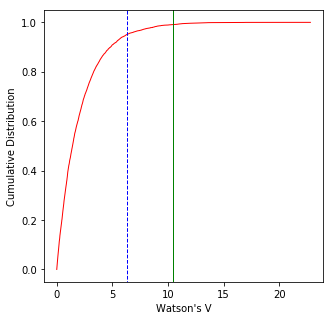

(0, 21.534333502358034, 16.667631026856725)

In [434]:
# use the same data as for watsons_f
plt.figure(1,(5,5))
ipmag.common_mean_watson(DI1,DI2,plot='yes')
